In [ ]:
"""
Kairos Siddhartha Kaizen
https://kaizen.tel
kairos@kaizen.tel
https://wa.me/6587745558
+65 8774 5558

Notes for evaluators:
Whilst this was a group project, I was the incumbent for Machine Learning.
All code below is 100% by me.
"""

In [1]:
"""
BCG Rise 2.0, Wave 9, Group 6.
Capstone Project, CS Tay.
By:
    Joon Seng
    Michelle
    Suzanna
    Kairos
    Chink Eng
    Poh Hong
"""

'\nBCG Rise 2.0, Wave 9, Group 6.\nCapstone Project, CS Tay.\nBy:\n    Joon Seng\n    Michelle\n    Suzanna\n    Kairos\n    Chink Eng\n    Poh Hong\n'

# 1.0 Libraries and Datasets

In [2]:
#!pip install holidays
#!pip install prophet

In [3]:
import numpy as np
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

seed_value = 66  # choose a seed value
random.seed(seed_value)
np.random.seed(seed_value)


In [4]:
path1 = r'./data/SalesData.csv'
df = pd.read_csv(path1)
print(f"Dataset \"df\" loaded successfully from \"{path1}\" .")
print(f"df.shape: {df.shape}")

"""
path1 = r's3://bcg-rise-prod-sagemaker-input-data/wave-4/SalesData.csv'
df = pd.read_csv(path1)
print(f"Dataset \"df\" loaded successfully from \"{path1}\" .")
print(f"df.shape: {df.shape}")
"""

Dataset "df" loaded successfully from "./data/SalesData.csv" .
df.shape: (74935, 9)


'\npath1 = r\'s3://bcg-rise-prod-sagemaker-input-data/wave-4/SalesData.csv\'\ndf = pd.read_csv(path1)\nprint(f"Dataset "df" loaded successfully from "{path1}" .")\nprint(f"df.shape: {df.shape}")\n'

# 2.0 Data Cleaning & EDA

In [5]:
df.head()

Transaction Date Sales Order No. Customer Code Customer Category Desc  \
0         1/7/2022      SO00000001          C033            SUPERMARKET   
1         1/7/2022      SO00000001          C033            SUPERMARKET   
2         1/7/2022      SO00000001          C033            SUPERMARKET   
3         1/7/2022      SO00000001          C033            SUPERMARKET   
4         1/7/2022      SO00000002          C001            SUPERMARKET   

   Inventory Code                 Inventory Desc    Qty  Total Base Amt  Wgt.  
0          1161.0  (4) HAINANESE CHIX THIGH 380G  156.0          811.20  380g  
1          1163.0  (1) CRISPY CHIX ORIGINAL 400G  156.0          811.20  400g  
2          1160.0  (9) SKINLESS CHIX BREAST 345G  156.0          811.20  345g  
3          1162.0    (3) CRISPY CHIX S/WEED 400G  312.0         1622.40  400g  
4          1163.0  (1) CRISPY CHIX ORIGINAL 400G   15.6           83.46  400g

## Parsing Dates

In [6]:
"""
From the above head() and tail() operations, we realize that the dates are in DD/MM/YYYY format.
As such we will parse the dates accordingly, and also make it the index of the dataframe.
"""

df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], dayfirst=True)

print(f"Dates in 'Transaction Date' column have been successfully parsed.")
df.head()


Dates in 'Transaction Date' column have been successfully parsed.


Transaction Date Sales Order No. Customer Code Customer Category Desc  \
0       2022-07-01      SO00000001          C033            SUPERMARKET   
1       2022-07-01      SO00000001          C033            SUPERMARKET   
2       2022-07-01      SO00000001          C033            SUPERMARKET   
3       2022-07-01      SO00000001          C033            SUPERMARKET   
4       2022-07-01      SO00000002          C001            SUPERMARKET   

   Inventory Code                 Inventory Desc    Qty  Total Base Amt  Wgt.  
0          1161.0  (4) HAINANESE CHIX THIGH 380G  156.0          811.20  380g  
1          1163.0  (1) CRISPY CHIX ORIGINAL 400G  156.0          811.20  400g  
2          1160.0  (9) SKINLESS CHIX BREAST 345G  156.0          811.20  345g  
3          1162.0    (3) CRISPY CHIX S/WEED 400G  312.0         1622.40  400g  
4          1163.0  (1) CRISPY CHIX ORIGINAL 400G   15.6           83.46  400g

In [7]:
# Extracting the minimum and maximum dates
min_date = df['Transaction Date'].min()
max_date = df['Transaction Date'].max()

# Ensure that min_date and max_date are in datetime format
min_date = pd.to_datetime(min_date)
max_date = pd.to_datetime(max_date)

# Extracting year and month components of the dates
start_year, start_month = min_date.year, min_date.month
end_year, end_month = max_date.year, max_date.month

# Calculating the difference in terms of months
total_months = (end_year - start_year) * 12 + (end_month - start_month)

print(f"Start Date: {min_date}")
print(f"End Date: {max_date}")
print(f"Number of months: {total_months+1}")
print(f"Number of data points: {df.shape[0]} rows, {df.shape[1]} columns.")


Start Date: 2022-07-01 00:00:00
End Date: 2023-05-31 00:00:00
Number of months: 11
Number of data points: 74935 rows, 9 columns.


## Pandas Profiling

In [8]:
# from ydata_profiling import ProfileReport

# ProfileReport(df)

## Duplicate Rows

In [9]:
"""
Client confirmed that these duplicate rows are indeed INVALID and should be deleted!
"""

'\nClient confirmed that these duplicate rows are indeed INVALID and should be deleted!\n'

In [10]:
# This will show ALL occurrences of duplicated rows, not just the subsequent occurrences
all_duplicates = df[df.duplicated(keep=False)].sort_values(by='Sales Order No.')

print(f'Number of rows that have duplicates = {all_duplicates.shape[0] // 2}\n')  # Because all_duplicates includes all occurrences

# Calculate the count of duplicates for each 'Sales Order No.'
duplicate_counts = all_duplicates.groupby('Sales Order No.').size()

# Map the counts back to the `all_duplicates` DataFrame
all_duplicates['Duplicate Count'] = all_duplicates['Sales Order No.'].map(duplicate_counts)

all_duplicates

Number of rows that have duplicates = 13



Transaction Date Sales Order No. Customer Code Customer Category Desc  \
3453        2022-07-16      SO00001427          S007                 RETAIL   
3454        2022-07-16      SO00001427          S007                 RETAIL   
3946        2022-07-16      SO00001608          C021                 HAWKER   
3947        2022-07-16      SO00001608          C021                 HAWKER   
7863        2022-08-03      SO00003189          A016             WET MARKET   
7864        2022-08-03      SO00003189          A016             WET MARKET   
8720        2022-08-06      SO00003496          P001            SUPERMARKET   
8722        2022-08-06      SO00003496          P001            SUPERMARKET   
9630        2022-08-10      SO00003892          C001            SUPERMARKET   
9631        2022-08-10      SO00003892          C001            SUPERMARKET   
14160       2022-08-30      SO00005798          N002            SUPERMARKET   
14161       2022-08-30      SO00005798          N002            SUPERMARKET   
17875       2022-09-16      SO00007258          U004              MINI MART   
17874       2022-09-16      SO00007258          U004              MINI MART   
27064       2022-10-27      SO00011060          N002            SUPERMARKET   
27065       2022-10-27      SO00011060          N002            SUPERMARKET   
30210       2022-10-27      SO00012340          N002            SUPERMARKET   
30211       2022-10-27      SO00012340          N002            SUPERMARKET   
32345       2022-11-19      SO00013230          S017            SUPERMARKET   
32346       2022-11-19      SO00013230          S017            SUPERMARKET   
34117       2022-11-29      SO00013952          N002            SUPERMARKET   
34118       2022-11-29      SO00013952          N002            SUPERMARKET   
48009       2023-02-03      SO00019493          S007                 RETAIL   
48010       2023-02-03      SO00019493          S007                 RETAIL   
73631       2023-05-25      SO00030118          S017            SUPERMARKET   
73630       2023-05-25      SO00030118          S017            SUPERMARKET   
73632       2023-05-25      SO00030118          S017            SUPERMARKET   

       Inventory Code                 Inventory Desc     Qty  Total Base Amt  \
3453           1332.0           BETAGRO BREAST HERBS    20.8           37.44   
3454           1332.0           BETAGRO BREAST HERBS    20.8           37.44   
3946           1100.0    JPS01 PORK SAUSAGE ORIGINAL     1.3            3.25   
3947           1100.0    JPS01 PORK SAUSAGE ORIGINAL     1.3            3.25   
7863           1185.0    SS03 SHAKE SHAKE CHIX HONEY    13.0           31.20   
7864           1185.0    SS03 SHAKE SHAKE CHIX HONEY    13.0           31.20   
8720           1166.0     (2) SUPER CRISPY CHIX 400G    15.6           90.48   
8722           1166.0     (2) SUPER CRISPY CHIX 400G    15.6           90.48   
9630           1162.0    (3) CRISPY CHIX S/WEED 400G    15.6           83.46   
9631           1162.0    (3) CRISPY CHIX S/WEED 400G    15.6           83.46   
14160             NaN                            NaN   726.7        44692.05   
14161             NaN                            NaN   726.7        44692.05   
17875          1142.0        FS01 FRIED 2 JOINT WING    15.6          148.20   
17874          1142.0        FS01 FRIED 2 JOINT WING    15.6          148.20   
27064             NaN                            NaN  1202.5        13468.00   
27065             NaN                            NaN  1202.5        13468.00   
30210             NaN                            NaN  1202.5        80808.00   
30211             NaN                            NaN  1202.5        80808.00   
32345             NaN                            NaN  5304.0         9016.80   
32346             NaN                            NaN  5304.0         9016.80   
34117             NaN                            NaN  1069.9        71897.28   
34118             NaN            

In [11]:
df.drop_duplicates(inplace=True)
print("All duplicate rows have been dropped.")
print(f'Number of rows with duplicates after removal = {df[df.duplicated()].shape[0]}')

All duplicate rows have been dropped.
Number of rows with duplicates after removal = 0


## Missing Values

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74921 entries, 0 to 74934
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Transaction Date        74921 non-null  datetime64[ns]
 1   Sales Order No.         74921 non-null  object        
 2   Customer Code           74921 non-null  object        
 3   Customer Category Desc  74921 non-null  object        
 4   Inventory Code          74758 non-null  float64       
 5   Inventory Desc          74758 non-null  object        
 6   Qty                     74921 non-null  float64       
 7   Total Base Amt          74921 non-null  float64       
 8   Wgt.                    72799 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 5.7+ MB


In [13]:
"""
Missing values detected from the above operation.
Let us explore, and fix these, in the subsequent steps.
"""

'\nMissing values detected from the above operation.\nLet us explore, and fix these, in the subsequent steps.\n'

### Columns: Ad-Hoc Bulk Sales: "Inventory Code", "Inventory Desc"

In [14]:
print("Inventory Codes:")
print("---")
print(df['Inventory Code'].unique())

Inventory Codes:
---
[1161. 1163. 1160. 1162. 1709. 1707. 1166. 1158. 1190. 1195. 1193. 1141.
 1143. 1154. 1191. 1151. 1171. 1142. 1145. 1126. 1341. 1331. 1333. 1340.
 1332. 1342. 1173. 1486. 1485. 1176. 1177. 1155. 1123. 1124. 1164. 1090.
 1091. 1092. 1103. 1107. 1109. 1100. 1105. 1156. 1144. 1316. 1170. 1157.
 1182. 1184. 1125. 1186. 1615. 1414. 1300. 1403. 1217. 1218. 1605. 1601.
 1460. 1122. 1407. 1033. 1035. 1031. 1034. 1036. 1037. 1032. 1030. 1345.
 1350. 1351. 1490. 1603. 1310. 1706. 1197. 1320. 1422. 1423. 1149. 1400.
 1120. 1418. 1121. 1185. 1620. 1415. 1430. 1063. 1600. 1419. 1010. 1011.
   nan 1346. 1219. 1211. 1110. 1065. 1330. 1013. 1014. 1015. 1150. 1408.
 1066. 1060. 1061. 1064. 1172. 1602. 1152. 1610. 1348. 1347. 1360. 1214.
 1130. 1196. 1062. 1604. 1334. 1070.]


In [15]:
print("Inventory Descriptions:")
print("---")
for i in df['Inventory Desc'].unique():
    print(i)

Inventory Descriptions:
---
(4) HAINANESE CHIX THIGH 380G
(1) CRISPY CHIX ORIGINAL 400G
(9) SKINLESS CHIX BREAST 345G
(3) CRISPY CHIX S/WEED 400G
FS SWEET CORN ON COB
BBQ SWEET CORN ON COB
(2) SUPER CRISPY CHIX 400G
(33) CRISPY CHICKEN SEAWEED 1KG
N1 CHICKEN NUGGET (10PKT)
N3 POP CORN CHIX 750G (10PKT)
N2 HOT & SPICY DRUMMETS 750G
FS07 FRIED CRISPY DRUM
FS04 GOLDEN CRISPY WING
(66) IKEDA CHICKEN CUTLET 1.1KG
TEMPURA CHICKEN NUGGET
(22) SUPER CRISPY CHICKEN 1KG
BAKED CHICKEN BITES
FS01 FRIED 2 JOINT WING
FS03 CRISPY CHICKEN STRIP
A11 POP CORN CHICKEN 1KG
SEA SALT YAKITORI
BETAGRO BREAST GARLIC PEPPER
BETAGRO BREAST PINK SALT
CURRY YAKITORI
BETAGRO BREAST HERBS
MALA YAKITORI
YAKITORI WITH SAUCE
PAITAN SOUP
PORK EMULSION
ROASTED WINGSTICK 1KG
ROASTED MID JT WING
(99) S.LESS CHICKEN BREAST 1.15KG
A05 COOKED 2 JOINT WING
A07 COOKED MID JT WING
(5) CRISPY CHIX W BEANCURD 400G
JCS01 CHIX SAUSAGE ORIGINAL
JCS02 CHIX SAUSAGE B/PEPPER
JCS03 CHIX SAUSAGE CHEESE
JPS03 PORK SAUSAGE ARABIKI
JPS07 PO

Missing Values:
Transaction Date             0
Sales Order No.              0
Customer Code                0
Customer Category Desc       0
Inventory Code             163
Inventory Desc             163
Qty                          0
Total Base Amt               0
Wgt.                      2122
dtype: int64


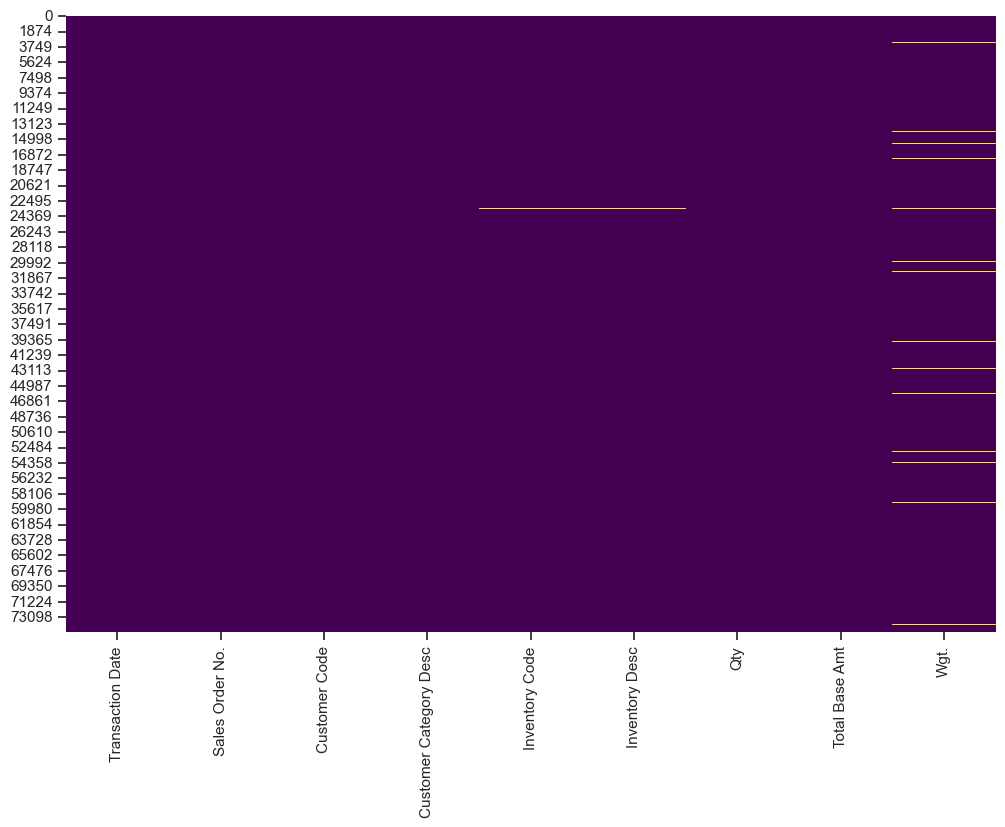

In [16]:
# Display the number of missing values for each column
print("Missing Values:")
missing_values = df.isnull().sum()
print(missing_values)

# Heatmap of missing values
# (Yellow lines indicate missing values.)
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

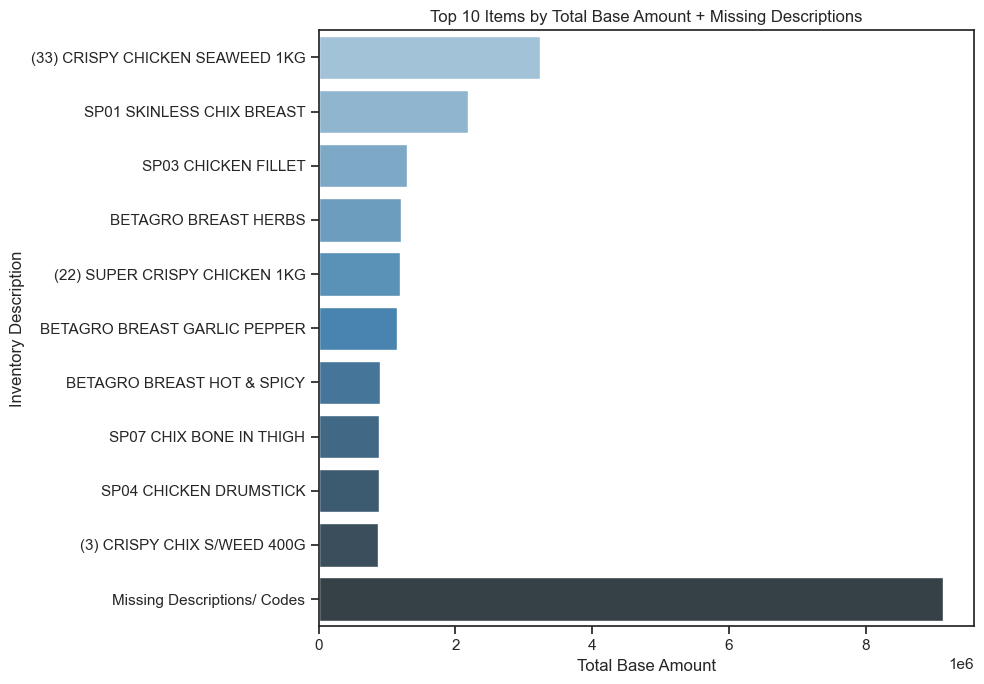

In [17]:
# Group by 'Inventory Desc' and aggregate the 'Total Base Amt'
item_sales = df.groupby('Inventory Desc').agg({'Total Base Amt': 'sum'})

# Sort and get the top 10 items by 'Total Base Amt'
top_items_sales = item_sales.sort_values('Total Base Amt', ascending=False).head(10)

# Get the sum of 'Total Base Amt' for rows with missing 'Inventory Desc'
missing_sales = df[df['Inventory Desc'].isna()]['Total Base Amt'].sum()

# Append the sum of missing values to the top 10 items. The label for missing values is set to 'Missing Description'
top_items_sales.loc['Missing Descriptions/ Codes'] = missing_sales

# Plot the data
plt.figure(figsize=(10, 7))
sns.barplot(x=top_items_sales['Total Base Amt'], y=top_items_sales.index, palette="Blues_d")
plt.title('Top 10 Items by Total Base Amount + Missing Descriptions')
plt.xlabel('Total Base Amount')
plt.ylabel('Inventory Description')
plt.tight_layout()
plt.show()

All missing values have been FILLED:
	- Inventory Code: 9999
	- Inventory Code: AD-HOC BULK SALES


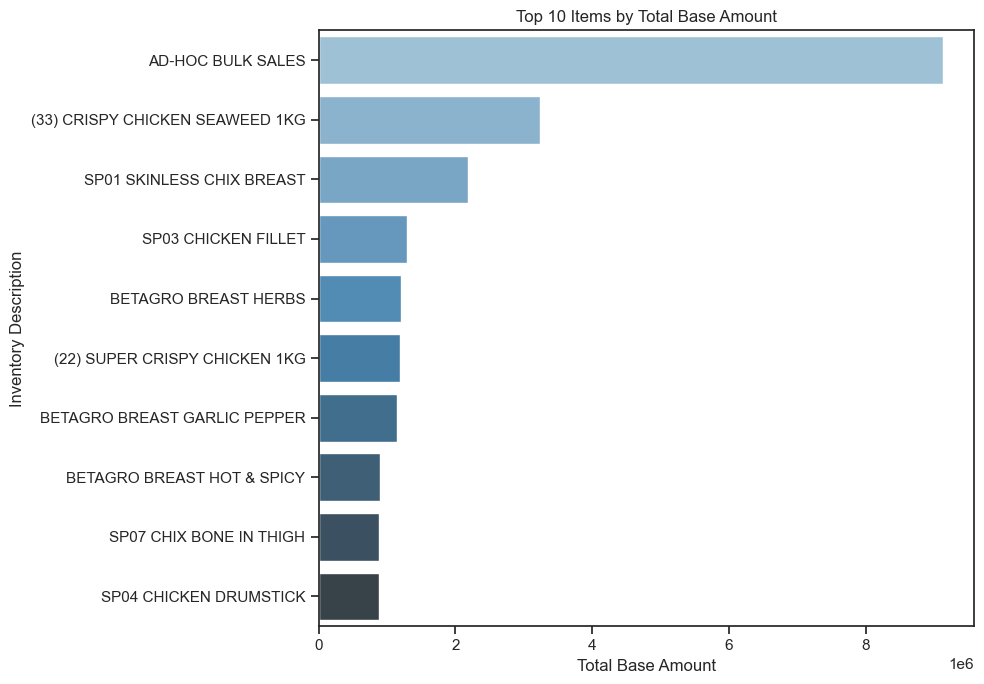

In [18]:
"""
The figures that make up the rows with missing values are pretty significant, and as such, we cannot simply just drop those rows.
Upon further investigations with the Client, these missing values were "Ad-Hoc Bulk Sales" sold in container-loads.
As such, we will be filling the missing values with such.
"""

df['Inventory Desc'].fillna('AD-HOC BULK SALES', inplace=True)
df['Inventory Code'].fillna(9999, inplace=True)
print("All missing values have been FILLED:")
print("\t- Inventory Code: 9999")
print("\t- Inventory Code: AD-HOC BULK SALES")

# Group by 'Inventory Desc' and aggregate the 'Total Base Amt'
top_items_sales = df.groupby('Inventory Desc').agg({'Total Base Amt': 'sum'}).sort_values('Total Base Amt', ascending=False).head(10)

# Plot the data
plt.figure(figsize=(10, 7))
sns.barplot(x=top_items_sales['Total Base Amt'], y=top_items_sales.index, palette="Blues_d")
plt.title('Top 10 Items by Total Base Amount')
plt.xlabel('Total Base Amount')
plt.ylabel('Inventory Description')
plt.tight_layout()
plt.show()

In [19]:
"""
Upon further investigation, the Client has confirmed that rows with "AD-HOC BULK SALES: 9999" are not important in this model.
As such, we will drop the column.
"""

df.drop(df[df['Inventory Code'] == 9999].index, inplace=True)
print('All "9999: AD-HOC BULK SALES" rows have been dropped.')

All "9999: AD-HOC BULK SALES" rows have been dropped.


### Column: "Wgt."

In [20]:
# Display the number of missing values for each column
print("Missing Values:")
print("---")
missing_values = df.isnull().sum()
print(missing_values)

Missing Values:
---
Transaction Date             0
Sales Order No.              0
Customer Code                0
Customer Category Desc       0
Inventory Code               0
Inventory Desc               0
Qty                          0
Total Base Amt               0
Wgt.                      1959
dtype: int64


In [21]:
"""
Upon further investigation with the Client and the Trainers, weight is an unnecessary feature in this model, and can safely be dropped.
"""

# Drop the "Wgt." column
df.drop(columns=['Wgt.'], inplace=True)
print("Column \"Wgt.\" has been dropped.")

# Display the number of missing values for each column
print("\nMissing Values:")
print("---")
missing_values = df.isnull().sum()
print(missing_values)

# Print the total number of missing values in the dataframe
print(f'\nDataset contains {missing_values.sum()} missing values.')

Column "Wgt." has been dropped.

Missing Values:
---
Transaction Date          0
Sales Order No.           0
Customer Code             0
Customer Category Desc    0
Inventory Code            0
Inventory Desc            0
Qty                       0
Total Base Amt            0
dtype: int64

Dataset contains 0 missing values.


## Unwanted Texts

In [22]:
print("Inventory Descriptions:")
print("---")
for i in df['Inventory Desc'].unique():
    print(i)

Inventory Descriptions:
---
(4) HAINANESE CHIX THIGH 380G
(1) CRISPY CHIX ORIGINAL 400G
(9) SKINLESS CHIX BREAST 345G
(3) CRISPY CHIX S/WEED 400G
FS SWEET CORN ON COB
BBQ SWEET CORN ON COB
(2) SUPER CRISPY CHIX 400G
(33) CRISPY CHICKEN SEAWEED 1KG
N1 CHICKEN NUGGET (10PKT)
N3 POP CORN CHIX 750G (10PKT)
N2 HOT & SPICY DRUMMETS 750G
FS07 FRIED CRISPY DRUM
FS04 GOLDEN CRISPY WING
(66) IKEDA CHICKEN CUTLET 1.1KG
TEMPURA CHICKEN NUGGET
(22) SUPER CRISPY CHICKEN 1KG
BAKED CHICKEN BITES
FS01 FRIED 2 JOINT WING
FS03 CRISPY CHICKEN STRIP
A11 POP CORN CHICKEN 1KG
SEA SALT YAKITORI
BETAGRO BREAST GARLIC PEPPER
BETAGRO BREAST PINK SALT
CURRY YAKITORI
BETAGRO BREAST HERBS
MALA YAKITORI
YAKITORI WITH SAUCE
PAITAN SOUP
PORK EMULSION
ROASTED WINGSTICK 1KG
ROASTED MID JT WING
(99) S.LESS CHICKEN BREAST 1.15KG
A05 COOKED 2 JOINT WING
A07 COOKED MID JT WING
(5) CRISPY CHIX W BEANCURD 400G
JCS01 CHIX SAUSAGE ORIGINAL
JCS02 CHIX SAUSAGE B/PEPPER
JCS03 CHIX SAUSAGE CHEESE
JPS03 PORK SAUSAGE ARABIKI
JPS07 PO

In [23]:
"""
Some modifications need to be made to the descriptions.
For example, in "(22) SUPER CRISPY CHICKEN 1KG", what does (22) mean?
Upon further investigation with the Client, we have been informed that it is meaningless, and can be safely removed.
"""

'\nSome modifications need to be made to the descriptions.\nFor example, in "(22) SUPER CRISPY CHICKEN 1KG", what does (22) mean?\nUpon further investigation with the Client, we have been informed that it is meaningless, and can be safely removed.\n'

In [24]:
import re

# Using a lambda function to apply the regex substitution to each row
df['Inventory Desc'] = df['Inventory Desc'].str.replace(r'\(.*?\)\s*', '', regex=True)

print('Unwanted bracketed numbers have been removed.')
print('For example:')
print("\t- Original: \"(22) SUPER CRISPY CHICKEN 1KG\"")
print("\t- Now: \"SUPER CRISPY CHICKEN 1KG\"")

print("\nInventory Descriptions:")
print("---")
for i in df['Inventory Desc'].unique():
    print(i)

Unwanted bracketed numbers have been removed.
For example:
	- Original: "(22) SUPER CRISPY CHICKEN 1KG"
	- Now: "SUPER CRISPY CHICKEN 1KG"

Inventory Descriptions:
---
HAINANESE CHIX THIGH 380G
CRISPY CHIX ORIGINAL 400G
SKINLESS CHIX BREAST 345G
CRISPY CHIX S/WEED 400G
FS SWEET CORN ON COB
BBQ SWEET CORN ON COB
SUPER CRISPY CHIX 400G
CRISPY CHICKEN SEAWEED 1KG
N1 CHICKEN NUGGET 
N3 POP CORN CHIX 750G 
N2 HOT & SPICY DRUMMETS 750G
FS07 FRIED CRISPY DRUM
FS04 GOLDEN CRISPY WING
IKEDA CHICKEN CUTLET 1.1KG
TEMPURA CHICKEN NUGGET
SUPER CRISPY CHICKEN 1KG
BAKED CHICKEN BITES
FS01 FRIED 2 JOINT WING
FS03 CRISPY CHICKEN STRIP
A11 POP CORN CHICKEN 1KG
SEA SALT YAKITORI
BETAGRO BREAST GARLIC PEPPER
BETAGRO BREAST PINK SALT
CURRY YAKITORI
BETAGRO BREAST HERBS
MALA YAKITORI
YAKITORI WITH SAUCE
PAITAN SOUP
PORK EMULSION
ROASTED WINGSTICK 1KG
ROASTED MID JT WING
S.LESS CHICKEN BREAST 1.15KG
A05 COOKED 2 JOINT WING
A07 COOKED MID JT WING
CRISPY CHIX W BEANCURD 400G
JCS01 CHIX SAUSAGE ORIGINAL
JCS02 C

## Inventory Code to INT

In [25]:
# Check for NaN or missing values in 'Inventory Code'
if df['Inventory Code'].isna().sum() == 0:
    
    # Convert from float to int if no NaN or missing values are present
    df['Inventory Code'] = df['Inventory Code'].astype(int)
    print('All values in "Inventory Code" converted to INT, for better readability.')
    
else:
    print(f"Warning: There are {df['Inventory Code'].isna().sum()} missing or NaN values in 'Inventory Code'.")
    print("Operation NOT completed successfully.")

All values in "Inventory Code" converted to INT, for better readability.


## Final Checks

In [26]:
print("Sales Order Nos:")
print("---")
print(df['Sales Order No.'].unique())

Sales Order Nos:
---
['SO00000001' 'SO00000002' 'SO00000003' ... 'SO00030683' 'SO00030684'
 'SO00030685']


In [27]:
"""
All looks well.
"""

'\nAll looks well.\n'

In [28]:
print("Customer Codes:")
print("---")
print(df['Customer Code'].unique())

Customer Codes:
---
['C033' 'C001' 'S017' 'C017' 'S007' 'C030' 'C003' 'L010' 'A023' 'P013'
 'A005' 'P014' 'S041' 'F008' 'M021' 'A011' 'T031' 'R010' 'C016' 'J018'
 'T007' 'F019' 'E018' 'S013' 'E002' 'N006' 'A039' 'A007' 'A008' 'U004'
 'I002' 'L034' 'S033' 'B009' 'J013' 'A001' 'A022' 'D006' 'I011' 'T016'
 'A030' 'M030' 'M040' 'U001' 'F009' 'A029' 'C020' 'J014' 'J001' 'A010'
 'F026' 'T006' 'A048' 'M016' 'G015' 'I010' 'N011' 'N012' 'C024' 'T028'
 'T009' 'F004' 'C006' 'L024' 'H016' 'R001' 'C015' 'J023' 'J020' 'L017'
 'C005' 'E013' 'S035' 'Z004' 'M032' 'J007' 'T004' 'S023' 'A047' 'T032'
 'H003' 'T029' 'J012' 'N009' 'A045' 'K017' 'A004' 'C007' 'K004' 'N005'
 'P010' 'L016' 'S002' 'P006' 'N002' 'F006' 'C008' 'F002' 'A015' 'F023'
 'D002' 'W008' 'I004' 'S037' 'P016' 'S012' 'M046' 'C019' 'J024' 'C022'
 'A020' 'H014' 'T020' 'S010' 'C047' 'J031' 'S038' 'A021' 'B017' 'M041'
 'J032' 'E004' 'M020' 'G011' 'L008' 'B008' 'L031' 'E016' 'S040' 'U003'
 'S021' 'A013' 'T024' 'M004' 'G001' 'C031' 'M026' 'O004' 

In [29]:
"""
All looks well.
"""

'\nAll looks well.\n'

In [30]:
print("Customer Category Descriptions:")
print("---")
for i in df['Customer Category Desc'].unique():
    print(i)

Customer Category Descriptions:
---
SUPERMARKET
CLOUD KITCHEN (TIFFLAB)
RETAIL
CAFE
RESTAURANT
SCHOOL
MINI MART
ABANG (FATTY BOM BOM)
HOTEL
HAWKER
WET MARKET
CATERER
WHOLESALER
FOOD MANUFACTURER
CLUB/ENTERTAINMENT
FAST FOOD
AIRLINE


In [31]:
"""
All looks well.
"""

'\nAll looks well.\n'

## Exploring Customer Categories

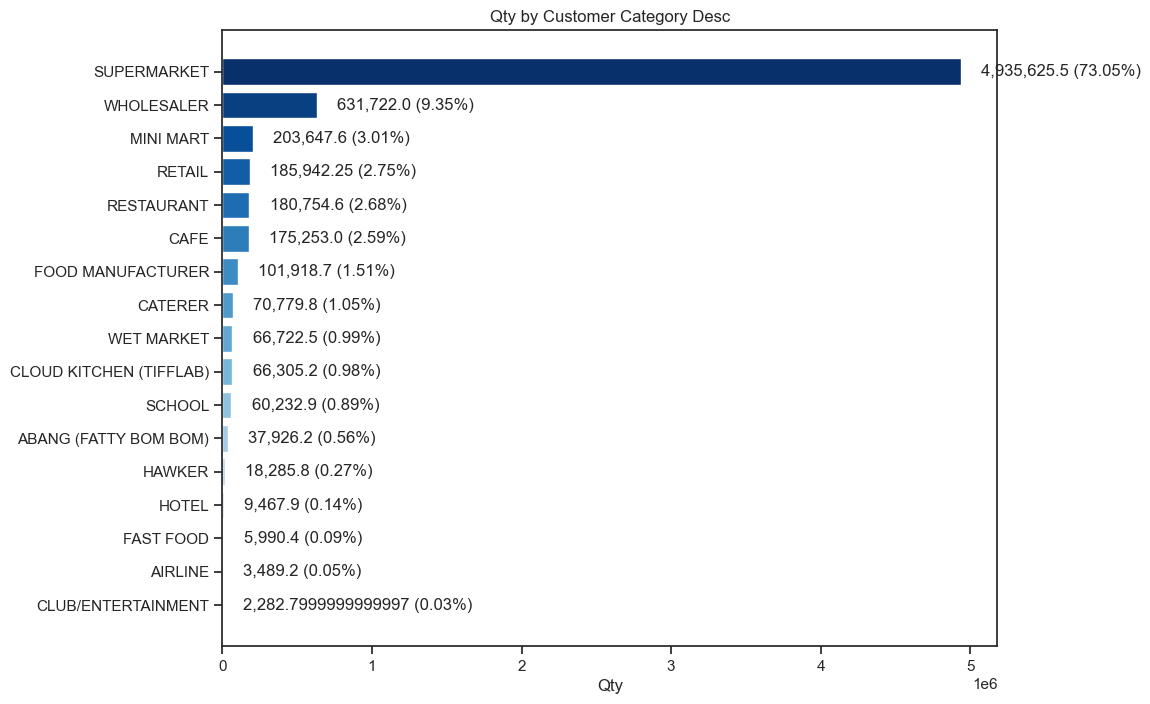

In [32]:
# Step 1: Group by 'Customer Category Desc' and sum the 'Qty'
grouped = df.groupby('Customer Category Desc')['Qty'].sum().reset_index()

# Step 2: Sort by 'Qty'
grouped = grouped.sort_values(by='Qty')

# Step 3: Calculate the percentage of each 'Qty'
total_qty = grouped['Qty'].sum()
grouped['Percentage'] = (grouped['Qty'] / total_qty) * 100

# Step 4: Plotting
fig, ax = plt.subplots(figsize=(10, 8))
y_positions = np.arange(len(grouped['Customer Category Desc']))

# Add descending gradient of blue to each bar
for i, (qty, percent) in enumerate(zip(grouped['Qty'], grouped['Percentage'])):
    gradient_color = plt.cm.Blues((i + 1) / len(grouped['Qty']))
    ax.barh(y_positions[i], qty, color=gradient_color)
    ax.text(qty + 0.02 * total_qty, i, f"{qty:,} ({percent:.2f}%)", va='center')

ax.set_yticks(y_positions)
ax.set_yticklabels(grouped['Customer Category Desc'])
ax.set_xlabel('Qty')
plt.title('Qty by Customer Category Desc')

plt.show()


C:\Users\kskai\AppData\Local\Temp\ipykernel_23024\2058304443.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(grouped['Customer Category Desc'], rotation=45, ha='right')


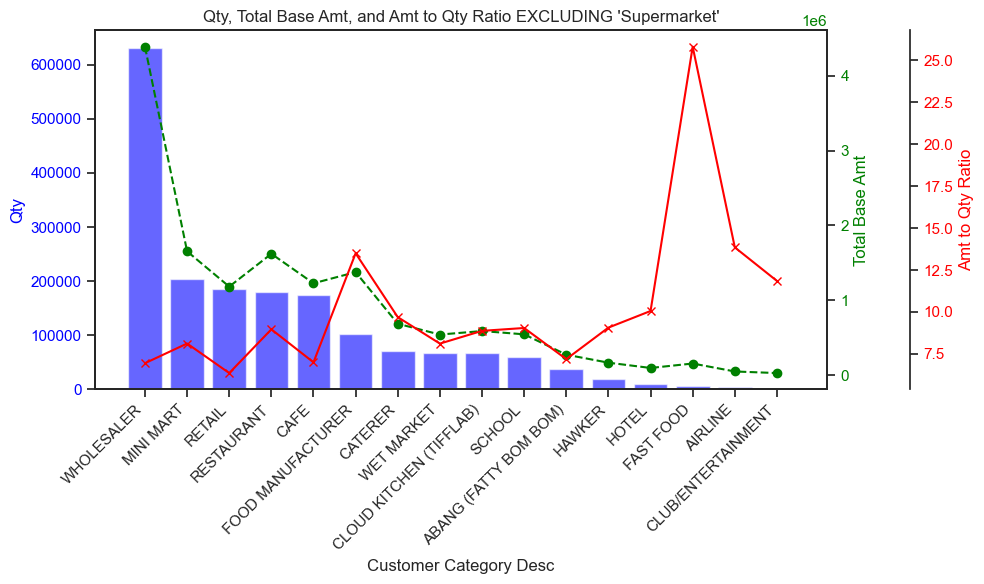

The Customer Category with the highest Amt to Qty Ratio is: FAST FOOD

--- Customer Category Details ---
WHOLESALER
	Current Total Qty: 631722.0
	Current Total Base Amt: 4388199.92
	Amt to Qty Ratio: 6.946409844836811

	So for example, if CS Tay were to move 10% more products in WHOLESALERs,
	New Total Qty: 694894.2000000001
	New Total Base Amt: 4827019.9120000005
	Extra Revenue: $438819.99200000055 .
	Percentage Increase in Revenue: 10.00%
----------------------------------------
MINI MART
	Current Total Qty: 203647.6
	Current Total Base Amt: 1653728.44
	Amt to Qty Ratio: 8.12053979521487

	So for example, if CS Tay were to move 10% more products in MINI MARTs,
	New Total Qty: 224012.36000000002
	New Total Base Amt: 1819101.284
	Extra Revenue: $165372.84400000004 .
	Percentage Increase in Revenue: 10.00%
----------------------------------------
RETAIL
	Current Total Qty: 185942.25
	Current Total Base Amt: 1182414.636
	Amt to Qty Ratio: 6.3590423155576525

	So for example, if CS Tay we

In [33]:
"""
From the above chart, we find out that Supermarket vertical far outweighs/ exceeds all the others.
As such, for the following exploration, we will be leaving 'Supermarket' vertical out.
"""

# Step 1: Filter out rows where 'Customer Category Desc' is 'SUPERMARKET'
df_filtered = df[df['Customer Category Desc'] != 'SUPERMARKET']

# Step 2: Group and aggregate
grouped = df_filtered.groupby('Customer Category Desc').agg({'Qty': 'sum', 'Total Base Amt': 'sum'}).reset_index()

# Step 3: Sort by 'Qty' in descending order
grouped = grouped.sort_values('Qty', ascending=False).reset_index(drop=True)

# Step 4: Calculate the ratio of 'Total Base Amt' to 'Qty'
grouped['Amt_to_Qty_Ratio'] = grouped['Total Base Amt'] / grouped['Qty']

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Step 5: Plot the 'Qty' as bars
ax1.bar(grouped['Customer Category Desc'], grouped['Qty'], color='blue', alpha=0.6, label='Qty')
ax1.set_xlabel('Customer Category Desc')
ax1.set_ylabel('Qty', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Step 6: Add a second y-axis and plot the aggregate sum of 'Total Base Amt'
ax2 = ax1.twinx()
ax2.plot(grouped['Customer Category Desc'], grouped['Total Base Amt'], color='green', linestyle='--', marker='o', label='Total Base Amt')
ax2.set_ylabel('Total Base Amt', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Step 7: Add a third y-axis to plot the ratio
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(grouped['Customer Category Desc'], grouped['Amt_to_Qty_Ratio'], color='red', linestyle='-', marker='x', label='Amt to Qty Ratio')
ax3.set_ylabel('Amt to Qty Ratio', color='red')
ax3.tick_params(axis='y', labelcolor='red')

# Step 8: Adjust the x-axis labels to be at 45 degrees
ax1.set_xticklabels(grouped['Customer Category Desc'], rotation=45, ha='right')

# Step 9: Add title and show plot
plt.title("Qty, Total Base Amt, and Amt to Qty Ratio EXCLUDING 'Supermarket'")
fig.tight_layout()
plt.show()

# Step 10: Find the customer category with the highest Amt to Qty Ratio
highest_ratio_category = grouped[grouped['Amt_to_Qty_Ratio'] == grouped['Amt_to_Qty_Ratio'].max()]['Customer Category Desc'].values[0]
print(f"The Customer Category with the highest Amt to Qty Ratio is: {highest_ratio_category}")

# Step 11: Print out actual figures for each Customer Category Desc
print("\n--- Customer Category Details ---")
for index, row in grouped.iterrows():
    print(f"{row['Customer Category Desc']}")
    print(f"\tCurrent Total Qty: {row['Qty']}")
    print(f"\tCurrent Total Base Amt: {row['Total Base Amt']}")
    print(f"\tAmt to Qty Ratio: {row['Amt_to_Qty_Ratio']}")
    print(f"")
    current_total_qty = row['Qty']
    current_total_base_amt = row['Total Base Amt']
    amt_to_qty_ratio = row['Amt_to_Qty_Ratio']
    increase_percent = 10 / 100
    new_total_qty = current_total_qty * (1 + increase_percent)
    increase_in_qty = new_total_qty - current_total_qty
    new_total_base_amt = current_total_base_amt + (increase_in_qty * amt_to_qty_ratio)
    percentage_increase_in_revenue = ((new_total_base_amt - current_total_base_amt) / current_total_base_amt) * 100
    print(f"\tSo for example, if CS Tay were to move 10% more products in {row['Customer Category Desc']}s,")
    print(f"\tNew Total Qty: {new_total_qty}")
    print(f"\tNew Total Base Amt: {new_total_base_amt}")
    print(f"\tExtra Revenue: ${new_total_base_amt-current_total_base_amt} .")
    print(f"\tPercentage Increase in Revenue: {percentage_increase_in_revenue:.2f}%")    
    print('-' * 40)  # Separate each customer category with lines for better readability



# 3.0 Feature Engineering

## Top 20 SKUs by Qty

In [34]:
"""
The Client has confirmed that they are only interested in the Top 20 SKUs, and only within the SUPERMARKET and RETAIL verticals.
We have chosen to go by Qty, since the Client specifically wants to optimize stocking numbers to prevent overstocking and/ or understocking, in order to maximize revenue, and minimize storage costs.
"""

# Filter dataframe to only include SUPERMARKET and RETAIL
df = df[df['Customer Category Desc'].isin(['SUPERMARKET', 'RETAIL'])].copy()

# Calculate the sum of Qty for each SKU
sku_qty_sum = df.groupby('Inventory Code').agg({'Qty': 'sum'})

# Sort by Qty and get the top 20 SKUs
top_20_products_qty = sku_qty_sum.sort_values(by='Qty', ascending=False).head(20).index.tolist()

print("Top 20 SKUs by Qty:")
print(top_20_products_qty)

# Filter the dataframe to only contain rows corresponding to the top 20 SKUs based on Qty
df = df[df['Inventory Code'].isin(top_20_products_qty)].copy()
print(f'\nDataset "df" now only contains Top 20 SKUs (based on Qty), and within only the SUPERMARKET and RETAIL verticals.')
print(f'Shape of df: {df.shape}')

Top 20 SKUs by Qty:
[1332, 1331, 1330, 1030, 1032, 1345, 1333, 1033, 1162, 1036, 1037, 1348, 1347, 1092, 1158, 1031, 1034, 1090, 1707, 1100]

Dataset "df" now only contains Top 20 SKUs (based on Qty), and within only the SUPERMARKET and RETAIL verticals.
Shape of df: (10402, 8)


## Product Category

New column added: "Product Category" with values: RAW, RTE, or RTC.
	- RAW: 2,611 rows.
	- RTE: 1,678 rows.
	- RTC: 6,113 rows.


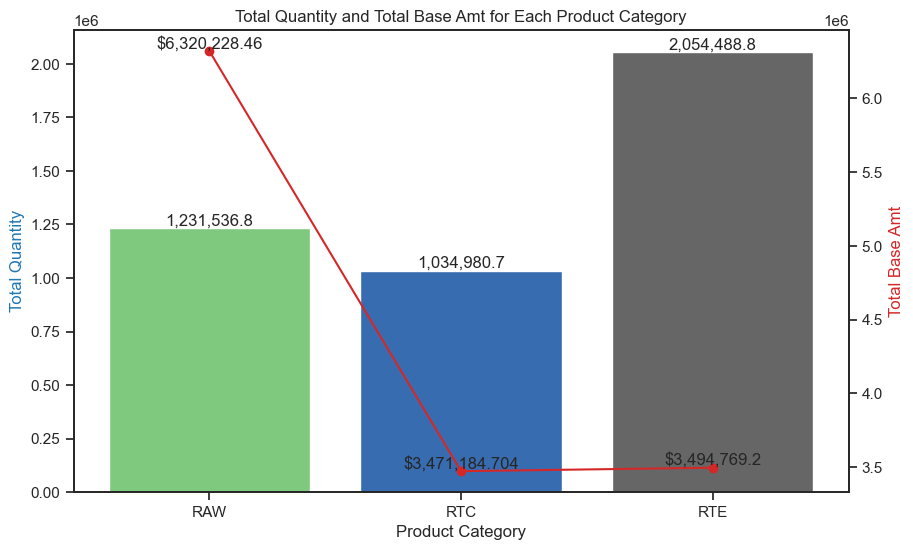

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Your function for categorizing product remains unchanged
def categorize_product(description):
    if "SP0" in str(description):
        return "RAW"
    elif "BETAGRO" in str(description):
        return "RTE"
    else:
        return "RTC"

# Apply the function and create the new column
df['Product Category'] = df['Inventory Desc'].apply(categorize_product)

# Count each category
raw_count = (df['Product Category'] == 'RAW').sum()
rte_count = (df['Product Category'] == 'RTE').sum()
rtc_count = (df['Product Category'] == 'RTC').sum()

# Print the counts
print("New column added: \"Product Category\" with values: RAW, RTE, or RTC.")
print(f'\t- RAW: {raw_count:,} rows.')  # comma as a thousands separator
print(f'\t- RTE: {rte_count:,} rows.')
print(f'\t- RTC: {rtc_count:,} rows.')

# Group by 'Product Category' and sum up 'Qty' and 'Total Base Amt'
category_qty_sum = df.groupby('Product Category')['Qty'].sum().reset_index()
category_amt_sum = df.groupby('Product Category')['Total Base Amt'].sum().reset_index()

# Create the bar chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart
ax1.bar(category_qty_sum['Product Category'], category_qty_sum['Qty'], color=plt.cm.Accent(np.linspace(0, 1, len(category_qty_sum))))
ax1.set_xlabel('Product Category')
ax1.set_ylabel('Total Quantity', color='tab:blue')

# Annotate bars with formatted Qty
for i, val in enumerate(category_qty_sum['Qty']):
    ax1.text(i, val, f"{val:,}", ha='center', va='bottom')  # comma as a thousands separator

# Create second y-axis
ax2 = ax1.twinx()

# Line chart
ax2.plot(category_amt_sum['Product Category'], category_amt_sum['Total Base Amt'], color='tab:red', marker='o')
ax2.set_ylabel('Total Base Amt', color='tab:red')

# Annotate line chart with formatted Total Base Amt
for i, val in enumerate(category_amt_sum['Total Base Amt']):
    ax2.text(i, val, f"${val:,}", ha='center', va='bottom')  # comma as a thousands separator and dollar sign

# Title
plt.title('Total Quantity and Total Base Amt for Each Product Category')

# Show plot
plt.show()

## Unit Price

In [36]:
"""
While the Total Base Amt (Sales), and Qty (Quantity) is available, the actual "Unit Price" isnt available.
As such, we're creating a new column for it, and assigning the appropriate values.
"""

df['Unit Price'] = df['Total Base Amt'] / df['Qty']
print("New column added: \"Unit Price\" (based on \"Total Base Amt / Qty\").")

New column added: "Unit Price" (based on "Total Base Amt / Qty").


## Public Holidays

In [37]:
'''
In order to execute a better Cross-Price-Elasticity (CPE) Analysis, we are coding each row with whether or not it is a public holiday.
'''

# !pip install holidays
import holidays

# Get Singapore holidays for the relevant years
sg_holidays = holidays.Singapore(years=[2022, 2023]) # You can add more years if needed

df_holidays = pd.DataFrame.from_dict(sg_holidays, orient="index").reset_index()
df_holidays.columns = ["ds", "holiday"]
df_holidays['ds'] = pd.to_datetime(df_holidays['ds'])
df_holidays['holiday'].value_counts

# Create an 'Is_Holiday' column, initialized to 0
df['Is_Holiday'] = 0

# Iterate through the DataFrame to set 'Is_Holiday' to 1 where the transaction date is a holiday
for date in sg_holidays.keys():
    df.loc[df['Transaction Date'] == pd.Timestamp(date), 'Is_Holiday'] = 1

In [38]:
# Merge the DataFrame containing your data (df) with the DataFrame containing the holidays (df_holidays)
# This will add a new column to df called 'holiday', which will contain the name of the holiday if the date is a holiday.
df = pd.merge(df, df_holidays, how='left', left_on='Transaction Date', right_on='ds')

# Drop the 'ds' column if needed, as it's a duplicate of 'Transaction Date' after merging
df.drop(columns=['ds'], inplace=True)

# Fill NaNs in the 'holiday' column with a string indicating non-holidays (e.g., 'Not a Holiday')
df['holiday'].fillna(0, inplace=True)

# Rename 'holiday' column to 'Holiday' to meet your specification
df.rename(columns={'holiday': 'Holiday_Name'}, inplace=True)

df[df['Holiday_Name'] != 0].head()

Transaction Date Sales Order No. Customer Code Customer Category Desc  \
439        2022-07-10      SO00001051          C001            SUPERMARKET   
3897       2022-10-24      SO00010769          A001                 RETAIL   
3898       2022-10-24      SO00010773          C001            SUPERMARKET   
3899       2022-10-24      SO00010773          C001            SUPERMARKET   
3900       2022-10-24      SO00010773          C001            SUPERMARKET   

      Inventory Code              Inventory Desc    Qty  Total Base Amt  \
439             1707       BBQ SWEET CORN ON COB   52.0           78.00   
3897            1158  CRISPY CHICKEN SEAWEED 1KG    1.3           14.95   
3898            1034       SP05 CHIX MIDDLE WING  296.4         1363.44   
3899            1031            SP02 CHIX BREAST  374.4         2021.76   
3900            1036     SP07 CHIX BONE IN THIGH  468.0         2714.40   

     Product Category  Unit Price  Is_Holiday    Holiday_Name  
439               RTC         1.5           1  Hari Raya Haji  
3897              RTC        11.5           1       Deepavali  
3898              RAW         4.6           1       Deepavali  
3899              RAW         5.4           1       Deepavali  
3900              RAW         5.8           1       Deepavali

In [39]:
# Total Qty Comparison for Is_Holiday
plt.figure(figsize=(10, 6))
ax1 = sns.barplot(x='Is_Holiday', y='Qty', data=df, estimator=sum)
plt.title('Total Qty of ALL PRODUCTS by Is_Holiday')
plt.xlabel('Is Holiday?')
plt.ylabel('Total Qty')

# Adding labels
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

################

# Avg Qty Comparison for Is_Holiday
plt.figure(figsize=(10, 6))
ax2 = sns.barplot(x='Is_Holiday', y='Qty', data=df)
plt.title('Average Qty of ALL PRODUCTS by Is_Holiday')
plt.xlabel('Is Holiday?')
plt.ylabel('Average Qty')

# Adding labels
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

###################

total_qty_holiday = df[df['Is_Holiday'] == 1]['Qty'].sum()
total_qty_non_holiday = df[df['Is_Holiday'] == 0]['Qty'].sum()

avg_qty_holiday = df[df['Is_Holiday'] == 1]['Qty'].mean()
avg_qty_non_holiday = df[df['Is_Holiday'] == 0]['Qty'].mean()

# Calculating percentage difference for total quantity
perc_diff_total = ((total_qty_holiday - total_qty_non_holiday) / total_qty_non_holiday) * 100

# Calculating percentage difference for average quantity
perc_diff_avg = ((avg_qty_holiday - avg_qty_non_holiday) / avg_qty_non_holiday) * 100

print(f"Percentage difference in total quantity between holiday and non-holiday: {perc_diff_total:.2f}%")
print(f"Percentage difference in average quantity between holiday and non-holiday: {perc_diff_avg:.2f}%")

KeyboardInterrupt: 

<Figure size 1000x600 with 0 Axes>

In [ ]:
'''
From the above charts, we can deduce that:

1.
Overall, there is, by an extremely wide margin, more total sales by Qty, when it is not a Holiday.
This can be explained by the fact that out of X days, there are only really a handful of days where it is a Holiday.
As such, this observation is irrelevant/ not useful.

2.
On average, there is just slightly more sales on days when it is not a holiday.
'''

'\nFrom the above charts, we can deduce that:\n\n1.\nOverall, there is, by an extremely wide margin, more total sales by Qty, when it is not a Holiday.\nThis can be explained by the fact that out of X days, there are only really a handful of days where it is a Holiday.\nAs such, this observation is irrelevant/ not useful.\n\n2.\nOn average, there is just slightly more sales on days when it is not a holiday.\n'

## School Holidays

Below is a summarized list of the Singaporean school holidays:

School Holidays for 2022:
- Between Terms 1 and 2: 12 March 2022 (Sat) to 20 March 2022 (Sun) [3]
- PSLE Marking Days: 17 October 2022 (Mon) to 20 October 2022 (Thu) [5]
- Deepavali Holiday: 24 October 2022 (Mon) [5]
- Year-End Holidays: 19 November 2022 (Sat) to 31 December 2022 (Sat) [5]
The school year for 2022 in Singapore started on 4 January 2022 and ended on 18 November 2022 [2].

School Holidays for 2023:
- Term 1 Holidays: 11 March to 19 March 2023 [4]
- Term 2 Holidays: 27 May to 25 June 2023 [4]
- Term 3 Holidays: 1 September to 10 September 2023 [4]
- Year-End Holidays: Starts from 17 November 2023 (no end date mentioned) [4]

Special School Holidays for 2023:
- Youth Day: 2 July 2023 (Sunday) [5]
- Day After National Day: 10 August 2023 (Thursday) [5]
- Teachers' Day: 1 September 2023 [5]
- Children's Day: 6 October 2023 [6]

In [ ]:
'''
In order to execute a better Cross-Elasticity Price (CEP) Analysis, we are coding each row with whether or not it is a school holiday.
'''

start_date = '2022-07-01'
end_date = '2023-05-31'

import pandas as pd

# Initialize the new column with zeros
df['Is_School_Holiday'] = 0

# Define the date ranges for school holidays in 2022
school_holidays_2022 = [
    ('2022-03-12', '2022-03-20'),
    ('2022-10-17', '2022-10-20'),
    ('2022-10-24', '2022-10-24'),
    ('2022-11-19', '2022-12-31')
]

# Define the date ranges for school holidays in 2023
school_holidays_2023 = [
    ('2023-03-11', '2023-03-19'),
    ('2023-05-27', '2023-06-25'),
    ('2023-09-01', '2023-09-10'),
    ('2023-11-17', '2023-12-31'),  # Assuming the end date is 31st December 2023
    ('2023-07-02', '2023-07-02'),  # Youth Day
    ('2023-08-10', '2023-08-10'),  # Day After National Day
    ('2023-09-01', '2023-09-01'),  # Teachers' Day
    ('2023-10-06', '2023-10-06')   # Children's Day
]

# Combine all the school holiday ranges
all_school_holidays = school_holidays_2022 + school_holidays_2023

# Update the 'Is_School_Holiday' column based on the date ranges
for start_date, end_date in all_school_holidays:
    mask = (df['Transaction Date'] >= pd.Timestamp(start_date)) & (df['Transaction Date'] <= pd.Timestamp(end_date))
    df.loc[mask, 'Is_School_Holiday'] = 1

# Show the first few rows to verify
df[df['Is_School_Holiday'] == 1].head()
# df[df['Is_School_Holiday'] == 0].head()


Transaction Date Sales Order No. Customer Code Customer Category Desc  \
3681       2022-10-17      SO00010155          C001            SUPERMARKET   
3682       2022-10-17      SO00010155          C001            SUPERMARKET   
3683       2022-10-17      SO00010155          C001            SUPERMARKET   
3684       2022-10-17      SO00010155          C001            SUPERMARKET   
3685       2022-10-17      SO00010155          C001            SUPERMARKET   

      Inventory Code           Inventory Desc    Qty  Total Base Amt  \
3681            1034    SP05 CHIX MIDDLE WING  296.4         1363.44   
3682            1031         SP02 CHIX BREAST  390.0         2106.00   
3683            1036  SP07 CHIX BONE IN THIGH  468.0         2714.40   
3684            1033   SP04 CHICKEN DRUMSTICK  624.0         2870.40   
3685            1037    SP08 CHIX BONLESS LEG  514.8         2985.84   

     Product Category  Unit Price  Is_Holiday Holiday_Name  Is_School_Holiday  
3681              RAW         4.6           0            0                  1  
3682              RAW         5.4           0            0                  1  
3683              RAW         5.8           0            0                  1  
3684              RAW         4.6           0            0                  1  
3685              RAW         5.8           0            0                  1

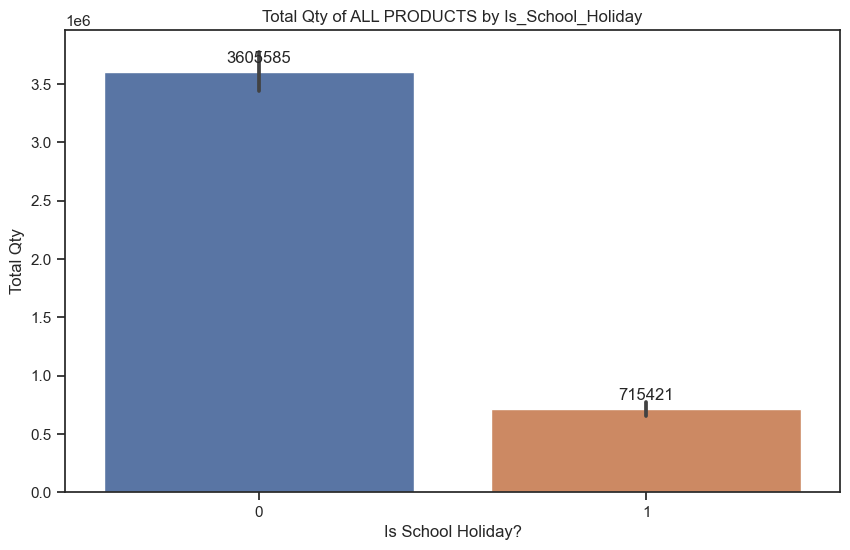

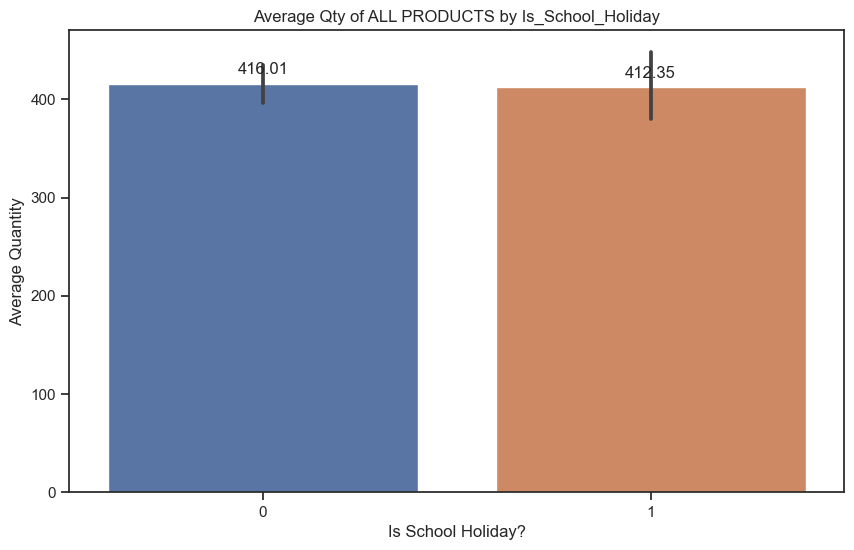

Percentage difference in total quantity between school holiday and non-school holiday: -80.16%
Percentage difference in average quantity between school holiday and non-school holiday: -0.88%


In [ ]:
# Bar chart for total quantities sold on school holidays vs. non-school holidays
plt.figure(figsize=(10, 6))
ax1 = sns.barplot(x='Is_School_Holiday', y='Qty', data=df, estimator=sum)
plt.title('Total Qty of ALL PRODUCTS by Is_School_Holiday')
plt.xlabel('Is School Holiday?')
plt.ylabel('Total Qty')

# Adding labels for total quantities
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.show()

################################

# Bar chart for average quantities sold on school holidays vs. non-school holidays
plt.figure(figsize=(10,6))
ax2 = sns.barplot(x='Is_School_Holiday', y='Qty', data=df)
plt.title('Average Qty of ALL PRODUCTS by Is_School_Holiday')
plt.xlabel('Is School Holiday?')
plt.ylabel('Average Quantity')
plt.xticks(ticks=[0, 1])

# Adding labels for average quantities
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

#################################

# Calculate percentage difference
total_qty_school_holiday = df[df['Is_School_Holiday'] == 1]['Qty'].sum()
total_qty_non_school_holiday = df[df['Is_School_Holiday'] == 0]['Qty'].sum()

avg_qty_school_holiday = df[df['Is_School_Holiday'] == 1]['Qty'].mean()
avg_qty_non_school_holiday = df[df['Is_School_Holiday'] == 0]['Qty'].mean()

perc_diff_total = ((total_qty_school_holiday - total_qty_non_school_holiday) / total_qty_non_school_holiday) * 100
perc_diff_avg = ((avg_qty_school_holiday - avg_qty_non_school_holiday) / avg_qty_non_school_holiday) * 100

print(f"Percentage difference in total quantity between school holiday and non-school holiday: {perc_diff_total:.2f}%")
print(f"Percentage difference in average quantity between school holiday and non-school holiday: {perc_diff_avg:.2f}%")

In [ ]:
'''
From the above charts, we can deduce that:

1.
Overall, there is, by a very wide margin, more total sales by Qty, when it is not a School Holiday.
This can be explained by the fact that out of X days, there are only really a handful of days where it is a School Holiday.
As such, this observation is irrelevant/ not useful.

2.
On average, there is just slightly more sales on days when it is a School Holiday.
'''

'\nFrom the above charts, we can deduce that:\n\n1.\nOverall, there is, by a very wide margin, more total sales by Qty, when it is not a School Holiday.\nThis can be explained by the fact that out of X days, there are only really a handful of days where it is a School Holiday.\nAs such, this observation is irrelevant/ not useful.\n\n2.\nOn average, there is just slightly more sales on days when it is a School Holiday.\n'

## Qty by Day of Week

Total quantities sold on each day of the week:


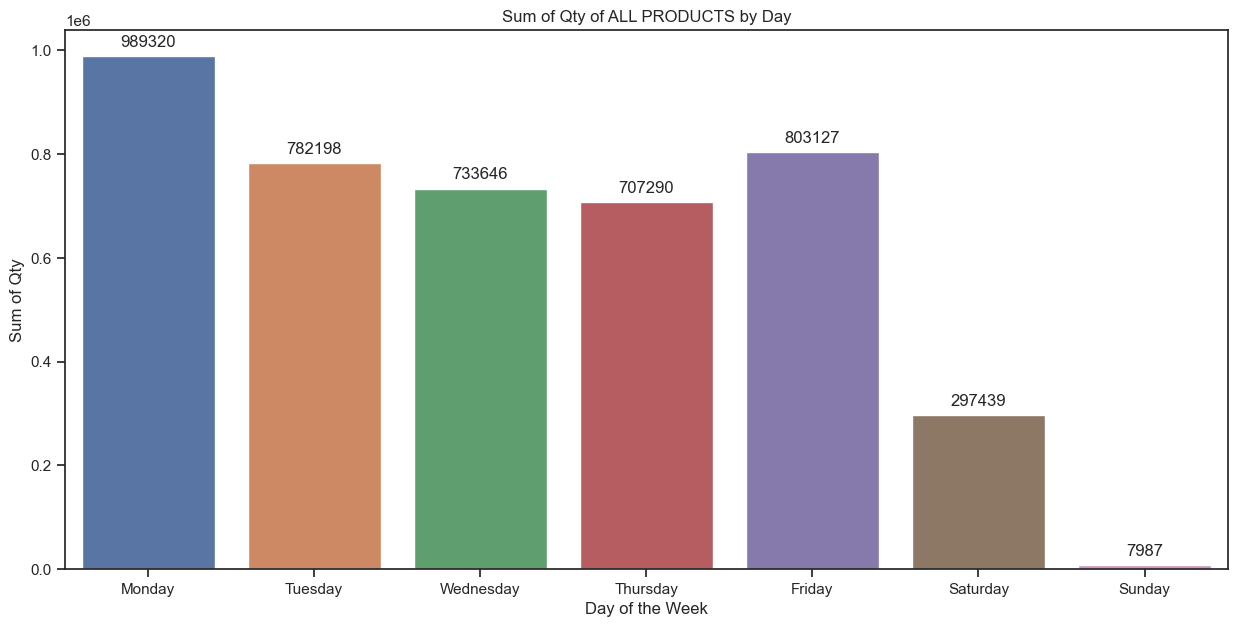

True average quantities sold on each day of the week:


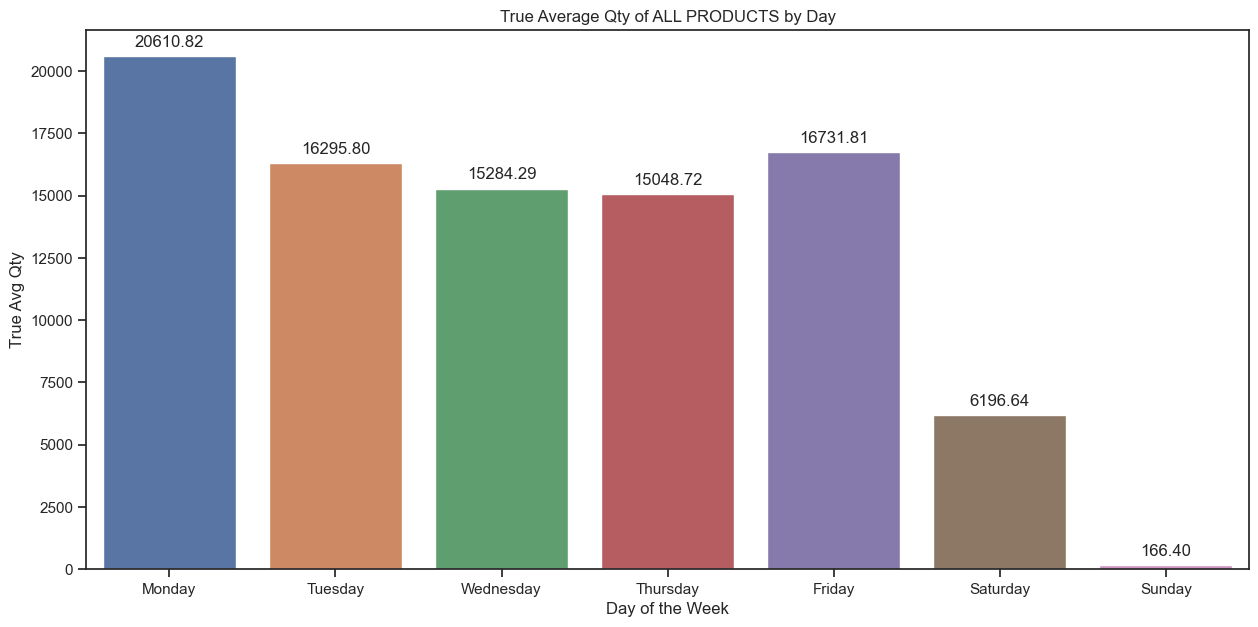

In [ ]:
# Get the day of the week
df['day_of_week'] = df['Transaction Date'].dt.day_name()

# Order of days for the plots
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group by day_of_week and calculate sum and mean
df_grouped_sum = df.groupby('day_of_week')['Qty'].sum().reset_index()
df_grouped_mean = df.groupby('day_of_week')['Qty'].mean().reset_index()

# Bar chart for sum of quantities
plt.figure(figsize=(15,7))
ax1 = sns.barplot(x='day_of_week', y='Qty', data=df_grouped_sum, order=order)
plt.title('Sum of Qty of ALL PRODUCTS by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Sum of Qty')

# Adding labels for total quantities and print in text
print("Total quantities sold on each day of the week:")
for p, day in zip(ax1.patches, order):
    value = p.get_height()
    ax1.annotate(f'{value:.0f}', (p.get_x() + p.get_width() / 2., value),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

####################################

# Get the first and last date in the DataFrame to calculate the total number of each weekday between these dates
first_date = df['Transaction Date'].min()
last_date = df['Transaction Date'].max()
total_days = pd.date_range(start=first_date, end=last_date, freq='D')

# Count the total number of each weekday in the time range
total_each_weekday = total_days.to_series().dt.day_name().value_counts()

# Group by day_of_week and calculate sum
df_grouped_sum = df.groupby('day_of_week')['Qty'].sum().reset_index()

# Calculate the true mean
true_mean = {}
for index, row in df_grouped_sum.iterrows():
    day = row['day_of_week']
    true_mean[day] = row['Qty'] / total_each_weekday[day]

true_mean_df = pd.DataFrame(list(true_mean.items()), columns=['day_of_week', 'True_Avg_Qty'])

# Order of days for the plots
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Bar chart for true average quantities
plt.figure(figsize=(15, 7))
ax2 = sns.barplot(x='day_of_week', y='True_Avg_Qty', data=true_mean_df, order=order)
plt.title('True Average Qty of ALL PRODUCTS by Day')
plt.xlabel('Day of the Week')
plt.ylabel('True Avg Qty')

# Adding labels for true average quantities
print("True average quantities sold on each day of the week:")
for p, day in zip(ax2.patches, order):
    value = p.get_height()
    ax2.annotate(f'{value:.2f}', (p.get_x() + p.get_width() / 2., value),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()



In [ ]:
'''
From the above charts, we can deduce that:

1.
There is extremely little Total Sales by Qty on all the Sundays combined.
The second lowest is Saturday.
The highest sales occur on Mondays.

2.
The "True Average" sales by Qty also reflects the same sentiment as the above.

3.
This will be marked as regressors using Prophet's built-in seasonality module.
Furthermore, we would be using a "custom_weekly" so that we will be able to tune the "fourier order" values.
'''

'\nFrom the above charts, we can deduce that:\n\n1.\nThere is extremely little Total Sales by Qty on all the Sundays combined.\nThe second lowest is Saturday.\nThe highest sales occur on Mondays.\n\n2.\nThe "True Average" sales by Qty also reflects the same sentiment as the above.\n\n3.\nThis will be marked as regressors using Prophet\'s built-in seasonality module.\nFurthermore, we would be using a "custom_weekly" so that we will be able to tune the "fourier order" values.\n'

In [ ]:
"""
Since clear and definite patterns can be observed on distinct days, we will be adding one-hot-encoded columns with a "Day" prefix.
(Consequently, we will also be dropping the 'day_of_week' column due to redundancy.)
"""

# Perform one-hot encoding
df_onehot = pd.get_dummies(df['day_of_week'], prefix="Day")

# Concatenate the original DataFrame with the one-hot encoded DataFrame
df = pd.concat([df, df_onehot], axis=1)
df.drop('Day_Friday', axis=1, inplace=True)

# Show the first few rows of the updated DataFrame
print("Days have been one-hot encoded successfully:")
df.head()


Days have been one-hot encoded successfully:


Transaction Date Sales Order No. Customer Code Customer Category Desc  \
0       2022-07-01      SO00000001          C033            SUPERMARKET   
1       2022-07-01      SO00000003          C001            SUPERMARKET   
2       2022-07-01      SO00000005          C001            SUPERMARKET   
3       2022-07-01      SO00000007          C001            SUPERMARKET   
4       2022-07-01      SO00000009          C001            SUPERMARKET   

   Inventory Code              Inventory Desc    Qty  Total Base Amt  \
0            1162     CRISPY CHIX S/WEED 400G  312.0         1622.40   
1            1707       BBQ SWEET CORN ON COB   26.0           35.10   
2            1162     CRISPY CHIX S/WEED 400G   15.6           83.46   
3            1158  CRISPY CHICKEN SEAWEED 1KG   26.0          294.58   
4            1162     CRISPY CHIX S/WEED 400G   15.6           83.46   

  Product Category  Unit Price  Is_Holiday Holiday_Name  Is_School_Holiday  \
0              RTC        5.20           0            0                  0   
1              RTC        1.35           0            0                  0   
2              RTC        5.35           0            0                  0   
3              RTC       11.33           0            0                  0   
4              RTC        5.35           0            0                  0   

  day_of_week  Day_Monday  Day_Saturday  Day_Sunday  Day_Thursday  \
0      Friday           0             0           0             0   
1      Friday           0             0           0             0   
2      Friday           0             0           0             0   
3      Friday           0             0           0             0   
4      Friday           0             0           0             0   

   Day_Tuesday  Day_Wednesday  
0            0              0  
1            0              0  
2            0              0  
3            0              0  
4            0              0

## Rolling Averages

In [ ]:
'''
For cross-price elasticity analysis, you typically want to understand how the price change in one product affects the quantity demanded for another product. The main variables you'll be dealing with are the price and quantity of multiple products. Given that your data spans 11 months and represents daily transactions, here are some things you might consider:

Rolling Averages:
Adding a "rolling average" for both price and quantity might help you smooth out short-term fluctuations and reveal the underlying trend over time. This can be particularly useful if the data is noisy. You can use pandas' rolling function to calculate this.

For example, to get a 7-day rolling average of the Unit Price and Qty:
'''

'''
You are correct. If each row represents a single day's worth of data for various products, then the rolling averages should be calculated for each specific product (Inventory Code) rather than for all products together. This is because calculating a rolling average over all products mixed together would introduce noise into your elasticity calculations.

You can calculate rolling averages for each product using groupby along with rolling. Here's how to do it:

This code will calculate 7-day rolling averages for the 'Unit Price' and 'Qty' columns, based on the 'Inventory Code'. That is, it will only calculate the average for each product individually. It uses min_periods=1 to ensure that you get an average even if there are fewer than 7 days of data for the product.

After running this code, the DataFrame will have two new columns 'Rolling_Avg_Price' and 'Rolling_Avg_Qty', with the rolling averages for each product.
'''

# Calculate rolling averages based on 'Inventory Code' for 30 days
df['Rolling_Avg_Price'] = df.groupby('Inventory Code')['Unit Price'].transform(lambda x: x.rolling(window=30, min_periods=1).mean())
df['Rolling_Avg_Qty'] = df.groupby('Inventory Code')['Qty'].transform(lambda x: x.rolling(window=30, min_periods=1).mean())

# Quickly look at 1162 (randomly picked) to see what Rolling Averages look like.
cols = ['Rolling_Avg_Price', 'Rolling_Avg_Qty'] + [col for col in df.columns if col not in ['Rolling_Avg_Price', 'Rolling_Avg_Qty']]
df_1162 = df[df['Inventory Code'] == 1162][cols].head()
print("(We've moved the 2 new columns right up to the front temporarily, for easier viewing purposes.)")
print('Quickly look at df_1162 (randomly picked) to see what Rolling Averages look like:')

df_1162

(We've moved the 2 new columns right up to the front temporarily, for easier viewing purposes.)
Quickly look at df_1162 (randomly picked) to see what Rolling Averages look like:


Rolling_Avg_Price  Rolling_Avg_Qty Transaction Date Sales Order No.  \
0              5.2000           312.00       2022-07-01      SO00000001   
2              5.2750           163.80       2022-07-01      SO00000005   
4              5.3000           114.40       2022-07-01      SO00000009   
6              5.3125            89.70       2022-07-01      SO00000010   
13             5.3200            74.88       2022-07-01      SO00000019   

   Customer Code Customer Category Desc  Inventory Code  \
0           C033            SUPERMARKET            1162   
2           C001            SUPERMARKET            1162   
4           C001            SUPERMARKET            1162   
6           C001            SUPERMARKET            1162   
13          C001            SUPERMARKET            1162   

             Inventory Desc    Qty  Total Base Amt  ... Is_Holiday  \
0   CRISPY CHIX S/WEED 400G  312.0         1622.40  ...          0   
2   CRISPY CHIX S/WEED 400G   15.6           83.46  ...          0   
4   CRISPY CHIX S/WEED 400G   15.6           83.46  ...          0   
6   CRISPY CHIX S/WEED 400G   15.6           83.46  ...          0   
13  CRISPY CHIX S/WEED 400G   15.6           83.46  ...          0   

    Holiday_Name  Is_School_Holiday day_of_week  Day_Monday Day_Saturday  \
0              0                  0      Friday           0            0   
2              0                  0      Friday           0            0   
4              0                  0      Friday           0            0   
6              0                  0      Friday           0            0   
13             0                  0      Friday           0            0   

    Day_Sunday  Day_Thursday  Day_Tuesday  Day_Wednesday  
0            0             0            0              0  
2            0             0            0              0  
4            0             0            0              0  
6            0             0            0              0  
13           0             0            0              0  

[5 rows x 22 columns]

## Sort by ['Transaction Date', 'Sales Order No.']

In [ ]:
# Sort the DataFrame by 'Transaction Date' and 'Sales Order No.'
df.sort_values(by=['Transaction Date', 'Sales Order No.'], inplace=True)

# Reset the index of the sorted DataFrame
df.reset_index(inplace=True, drop=True)

In [ ]:
'''
sns.pairplot(df,
             hue='Product Category')
plt.show()
'''

"\nsns.pairplot(df,\n             hue='Product Category')\nplt.show()\n"

"\nsns.pairplot(df,\n             hue='Product Category')\nplt.show()\n"

# 4.0 Final Dataframe

Split up into 3 groups from here:
1. Prophet modelling
2. Price-Elasticity Price Analysis
3. Power BI

In [ ]:
df.head()

Transaction Date Sales Order No. Customer Code Customer Category Desc  \
0       2022-07-01      SO00000001          C033            SUPERMARKET   
1       2022-07-01      SO00000003          C001            SUPERMARKET   
2       2022-07-01      SO00000005          C001            SUPERMARKET   
3       2022-07-01      SO00000007          C001            SUPERMARKET   
4       2022-07-01      SO00000009          C001            SUPERMARKET   

   Inventory Code              Inventory Desc    Qty  Total Base Amt  \
0            1162     CRISPY CHIX S/WEED 400G  312.0         1622.40   
1            1707       BBQ SWEET CORN ON COB   26.0           35.10   
2            1162     CRISPY CHIX S/WEED 400G   15.6           83.46   
3            1158  CRISPY CHICKEN SEAWEED 1KG   26.0          294.58   
4            1162     CRISPY CHIX S/WEED 400G   15.6           83.46   

  Product Category  Unit Price  ...  Is_School_Holiday day_of_week  \
0              RTC        5.20  ...                  0      Friday   
1              RTC        1.35  ...                  0      Friday   
2              RTC        5.35  ...                  0      Friday   
3              RTC       11.33  ...                  0      Friday   
4              RTC        5.35  ...                  0      Friday   

   Day_Monday Day_Saturday  Day_Sunday  Day_Thursday  Day_Tuesday  \
0           0            0           0             0            0   
1           0            0           0             0            0   
2           0            0           0             0            0   
3           0            0           0             0            0   
4           0            0           0             0            0   

   Day_Wednesday  Rolling_Avg_Price  Rolling_Avg_Qty  
0              0              5.200            312.0  
1              0              1.350             26.0  
2              0              5.275            163.8  
3              0             11.330             26.0  
4              0              5.300            114.4  

[5 rows x 22 columns]

In [ ]:
# export df to new csv './data/SalesData-cleaned-2.csv'
filename1 = r'SalesData-cleaned-4.csv'
output_path1 = r'./data/'
df.to_csv(output_path1+filename1, index=False)
print(f'Successfully exported new CSV File to \n\t"{output_path1+filename1}".')
print(f'Filename: {filename1}')


"""
# export df to new csv
filename1 = r'SalesData-cleaned-4.csv'
output_path1 = r's3://bcg-rise-prod-sagemaker-input-data/output-data/wave-5-group-6/'
df.to_csv(output_path1+filename1, index=False)
print(f'Successfully exported new CSV File to \n\t"{output_path1+filename1}".')
print(f'Filename: {filename1}')
"""

Successfully exported new CSV File to 
	"./data/SalesData-cleaned-4.csv".
Filename: SalesData-cleaned-4.csv


'\n# export df to new csv\nfilename1 = r\'SalesData-cleaned-4.csv\'\noutput_path1 = r\'s3://bcg-rise-prod-sagemaker-input-data/output-data/wave-5-group-6/\'\ndf.to_csv(output_path1+filename1, index=False)\nprint(f\'Successfully exported new CSV File to \n\t"{output_path1+filename1}".\')\nprint(f\'Filename: {filename1}\')\n'

# 5.0 Pre-Fitting Steps and Checks

## Product Category

In [ ]:
"""
Since clear and definite patterns can be observed on distinct days, we will be adding one-hot-encoded columns with a "Day" prefix.
(Consequently, we will also be dropping the 'day_of_week' column due to redundancy.)
"""

# Perform one-hot encoding
df_onehot = pd.get_dummies(df['Product Category'], prefix="ProdCat")

# Concatenate the original DataFrame with the one-hot encoded DataFrame
df = pd.concat([df, df_onehot], axis=1)

# Drop the 'day_of_week' column if it's no longer needed
df.drop('ProdCat_RAW', axis=1, inplace=True)

# Show the first few rows of the updated DataFrame
print("\"Product Category\" has been one-hot encoded successfully.")


"Product Category" has been one-hot encoded successfully.


## Dropping Columns

In [ ]:
# ID Columns

"""
The following are columns that are IDs, unnecessary for the model and thus should be dropped from the dataframe:
- Sales Order No.
- Customer Code
"""

df.drop(['Sales Order No.','Customer Code'], axis=1, inplace=True)
print("Columns 'Sales Order No.','Customer Code', successfully dropped.")

# Inventory Desc

"""
Since there is already "Inventory Code", we will also drop "Inventory Desc".
- Inventory Desc

(The reason why we've chosen to go with Code is because charting and visualizations will be too messy with 20 SKUs, so too many words everywhere.)
"""

# Calculate the number of unique values for each column
unique_inventory_code = df['Inventory Code'].nunique()
unique_inventory_desc = df['Inventory Desc'].nunique()

# Check if the counts are equal
if unique_inventory_code == unique_inventory_desc:
    df.drop('Inventory Desc', axis=1, inplace=True)
    print('Column "Inventory Desc" successfully dropped.')
else:
    print(f"ERROR! 'Inventory Code' has {unique_inventory_code} unique values while 'Inventory Desc' has {unique_inventory_desc} unique values.")
    print("As such, either columns were NOT dropped. PLEASE REVIEW YOUR CODE!")

# Total Base Amt
# Since Unit Price has already been calculated, we're dropping Total Base Amt
df.drop(['Total Base Amt'], axis=1, inplace=True)
print("Column 'Total Base Amt' successfully dropped.")

# Rolling Averages
# We will not be using Rolling Averages in the Prophet model
df.drop(['Rolling_Avg_Price', 'Rolling_Avg_Qty'], axis=1, inplace=True)
print("Columns 'Rolling_Avg_Price', 'Rolling_Avg_Qty', successfully dropped.")

print("\n", df.dtypes)

Columns 'Sales Order No.','Customer Code', successfully dropped.
Column "Inventory Desc" successfully dropped.
Column 'Total Base Amt' successfully dropped.
Columns 'Rolling_Avg_Price', 'Rolling_Avg_Qty', successfully dropped.

 Transaction Date          datetime64[ns]
Customer Category Desc            object
Inventory Code                     int32
Qty                              float64
Product Category                  object
Unit Price                       float64
Is_Holiday                         int64
Holiday_Name                      object
Is_School_Holiday                  int64
day_of_week                       object
Day_Monday                         uint8
Day_Saturday                       uint8
Day_Sunday                         uint8
Day_Thursday                       uint8
Day_Tuesday                        uint8
Day_Wednesday                      uint8
ProdCat_RTC                        uint8
ProdCat_RTE                        uint8
dtype: object


## Multi-Collinearity Checks

C:\Users\kskai\AppData\Local\Temp\ipykernel_16776\2027767144.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


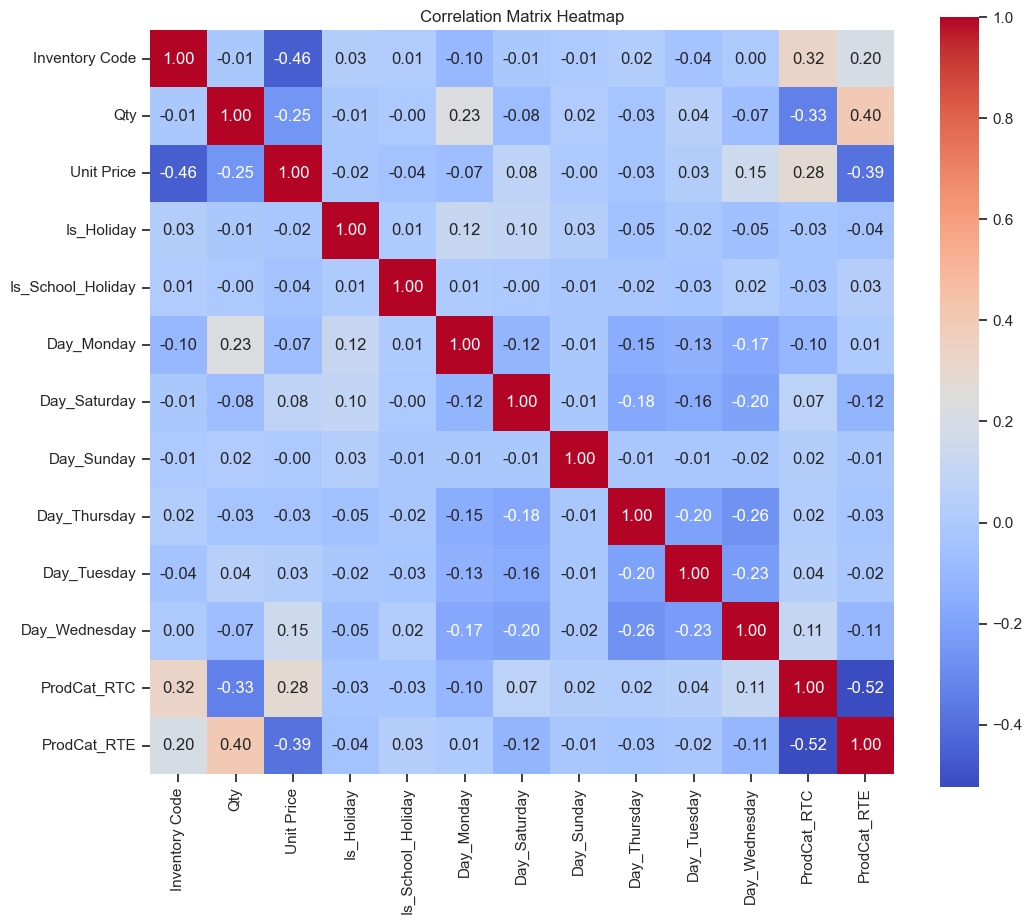

In [ ]:
# Calculate the correlation matrix
df_corr = df.corr()

# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
"""
No collinearity issues detected.
"""

'\nNo collinearity issues detected.\n'

## SKU-specific dataframes

In [ ]:
# Identify the top 20 SKUs by total Qty
top_20_skus_by_qty = df.groupby('Inventory Code')['Qty'].sum().sort_values(ascending=False).head(20)
top_20_skus = top_20_skus_by_qty.index.tolist()

# Create 20 new dataframes, each for one of the top 20 SKUs
for i, sku in enumerate(top_20_skus, 1):
    globals()[f'df_sku{i}'] = df[df['Inventory Code'] == sku]
    print(f'Iteration {i}: df_sku{i} (SKU {sku}) created, sorted by Qty.')

#print("(To save on computation-power, we have restricted ourselves to creating dataframes for only the top3 SKUs.)")

Iteration 1: df_sku1 (SKU 1332) created, sorted by Qty.
Iteration 2: df_sku2 (SKU 1331) created, sorted by Qty.
Iteration 3: df_sku3 (SKU 1330) created, sorted by Qty.
Iteration 4: df_sku4 (SKU 1030) created, sorted by Qty.
Iteration 5: df_sku5 (SKU 1032) created, sorted by Qty.
Iteration 6: df_sku6 (SKU 1345) created, sorted by Qty.
Iteration 7: df_sku7 (SKU 1333) created, sorted by Qty.
Iteration 8: df_sku8 (SKU 1033) created, sorted by Qty.
Iteration 9: df_sku9 (SKU 1162) created, sorted by Qty.
Iteration 10: df_sku10 (SKU 1036) created, sorted by Qty.
Iteration 11: df_sku11 (SKU 1037) created, sorted by Qty.
Iteration 12: df_sku12 (SKU 1348) created, sorted by Qty.
Iteration 13: df_sku13 (SKU 1347) created, sorted by Qty.
Iteration 14: df_sku14 (SKU 1092) created, sorted by Qty.
Iteration 15: df_sku15 (SKU 1158) created, sorted by Qty.
Iteration 16: df_sku16 (SKU 1031) created, sorted by Qty.
Iteration 17: df_sku17 (SKU 1034) created, sorted by Qty.
Iteration 18: df_sku18 (SKU 1090

In [ ]:
df_prophet = df_sku1.copy() # To run model for other SKUs, please update code accordingly.

sku_num = df_prophet['Inventory Code'].iloc[0]
df_prophet.sort_values(by='Transaction Date', inplace=True)
df_prophet.reset_index(drop=True, inplace=True)
# NOT dropping "Inventory Code" column for visual/ info purposes.

print(f'"df_prophet" set to SKU {sku_num}.\nIndex resetted.')
print('Subsequently, to run model for other SKUs, please update code accordingly.')
print('Example: ')
print('\t- df_prophet = df_sku2.copy()')
print('\t- df_prophet = df_sku3.copy()')
print('\t- df_prophet = df_sku4.copy()')
print('\t...and so on.')

df_prophet.head()

"df_prophet" set to SKU 1332.
Index resetted.
Subsequently, to run model for other SKUs, please update code accordingly.
Example: 
	- df_prophet = df_sku2.copy()
	- df_prophet = df_sku3.copy()
	- df_prophet = df_sku4.copy()
	...and so on.


Transaction Date Customer Category Desc  Inventory Code   Qty  \
0       2022-07-01                 RETAIL            1332  20.8   
1       2022-07-01                 RETAIL            1332  20.8   
2       2022-07-01                 RETAIL            1332  31.2   
3       2022-07-01                 RETAIL            1332  10.4   
4       2022-07-01                 RETAIL            1332  20.8   

  Product Category  Unit Price  Is_Holiday Holiday_Name  Is_School_Holiday  \
0              RTE         1.8           0            0                  0   
1              RTE         1.8           0            0                  0   
2              RTE         1.8           0            0                  0   
3              RTE         1.8           0            0                  0   
4              RTE         1.8           0            0                  0   

  day_of_week  Day_Monday  Day_Saturday  Day_Sunday  Day_Thursday  \
0      Friday           0             0           0             0   
1      Friday           0             0           0             0   
2      Friday           0             0           0             0   
3      Friday           0             0           0             0   
4      Friday           0             0           0             0   

   Day_Tuesday  Day_Wednesday  ProdCat_RTC  ProdCat_RTE  
0            0              0            0            1  
1            0              0            0            1  
2            0              0            0            1  
3            0              0            0            1  
4            0              0            0            1

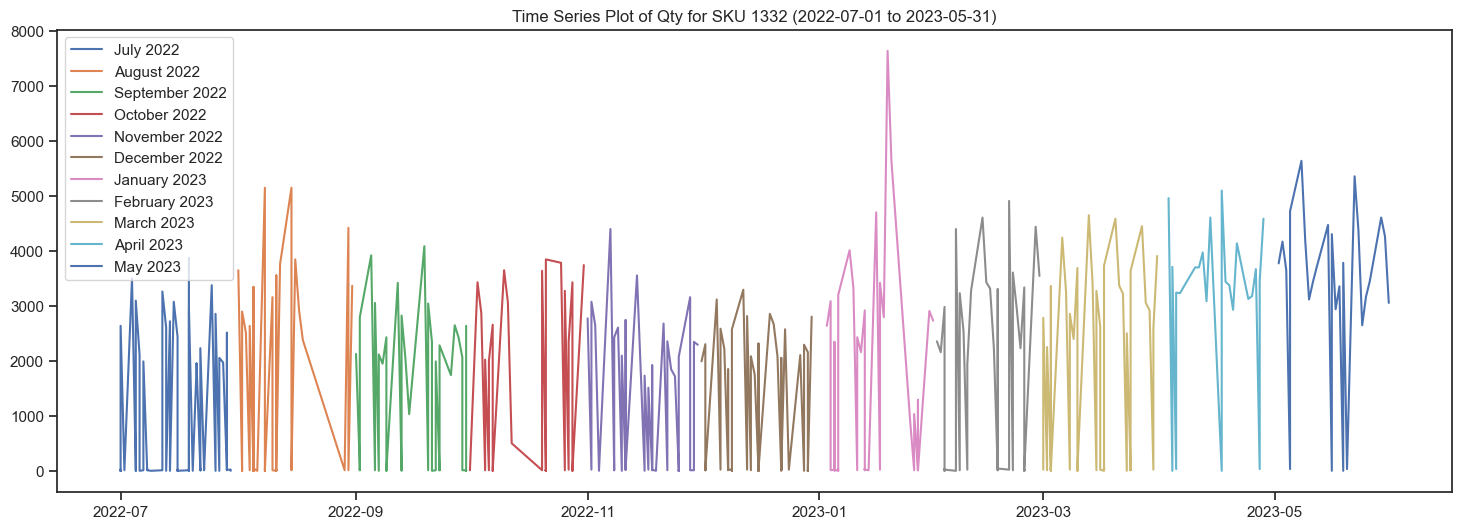

In [ ]:
start_date = '2022-07-01'
end_date = '2023-05-31'

# Get the list of months between the start and end dates
date_range = pd.date_range(start_date, end_date, freq='MS')  # MS: Month start frequency

fig, ax = plt.subplots(figsize=(18,6))

# Iterate over the date_range and plot each month's data
for date in date_range:
    month_start = date.strftime('%Y-%m-%d')
    month_end = (date + pd.DateOffset(months=1) - pd.Timedelta(days=1)).strftime('%Y-%m-%d')
    
    monthly_data = df_prophet[(df_prophet['Transaction Date'] >= month_start) & (df_prophet['Transaction Date'] <= month_end)]
    
    ax.plot(monthly_data['Transaction Date'], monthly_data['Qty'], label=date.strftime('%B %Y'))

ax.legend(loc='upper left')
ax.set_title(f'Time Series Plot of Qty for SKU {sku_num} ({start_date} to {end_date})')
plt.show()


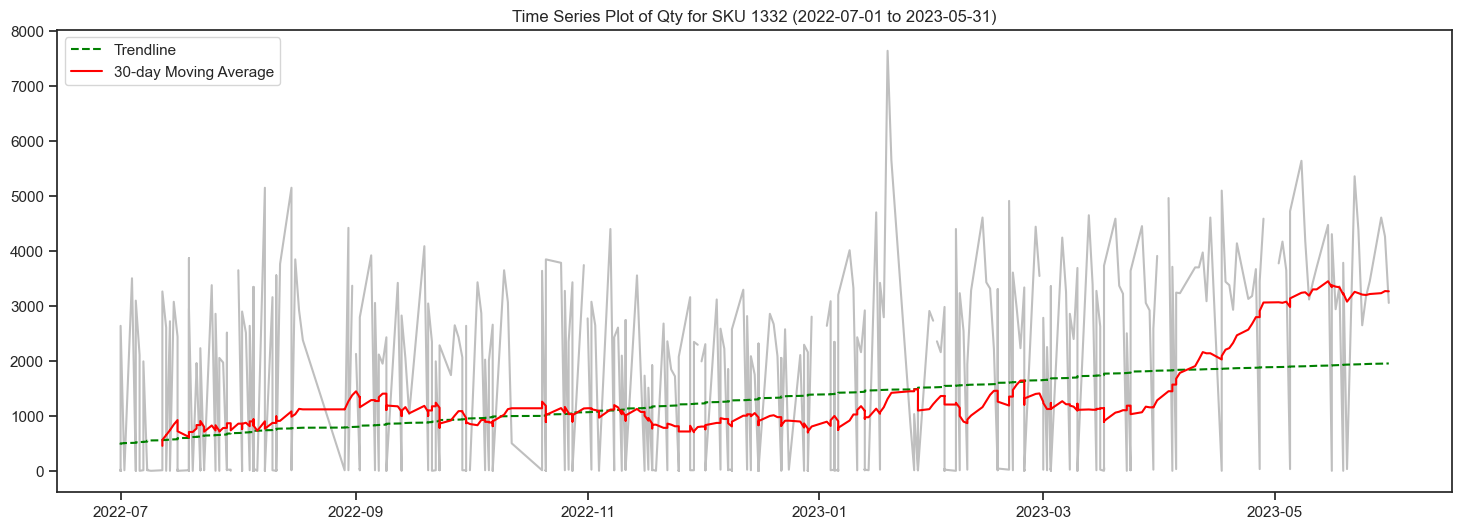

In [ ]:
start_date = '2022-07-01'
end_date = '2023-05-31'

# Get the list of months between the start and end dates
date_range = pd.date_range(start_date, end_date, freq='MS')  # MS: Month start frequency

fig, ax = plt.subplots(figsize=(18, 6))

# For the trendline
all_dates = []
all_Qtys = []

# For the moving average
window = 30
moving_averages = []

# Iterate over the date_range and plot each month's data
for date in date_range:
    month_start = date.strftime('%Y-%m-%d')
    month_end = (date + pd.DateOffset(months=1) - pd.Timedelta(days=1)).strftime('%Y-%m-%d')
    
    monthly_data = df_prophet[(df_prophet['Transaction Date'] >= month_start) & (df_prophet['Transaction Date'] <= month_end)]
    
    ax.plot(monthly_data['Transaction Date'], monthly_data['Qty'], color="0.75")
    
    # For the trendline
    all_dates.extend(list(monthly_data['Transaction Date']))
    all_Qtys.extend(list(monthly_data['Qty']))

# Adding a trendline
x_values = np.arange(len(all_dates))  # Generating x values (equally spaced)
coefficients = np.polyfit(x_values, all_Qtys, 1)
linear_trend = np.polyval(coefficients, x_values)
ax.plot(all_dates, linear_trend, label="Trendline", linestyle='--', color='green')

# Adding a moving average
df_prophet_sorted = df_prophet.sort_values('Transaction Date')  # Ensure data is sorted by date
df_prophet_sorted['moving_avg'] = df_prophet_sorted['Qty'].rolling(window=window).mean()
ax.plot(df_prophet_sorted['Transaction Date'], df_prophet_sorted['moving_avg'], label=f'{window}-day Moving Average', color='red')

ax.legend(loc='upper left')
ax.set_title(f'Time Series Plot of Qty for SKU {sku_num} ({start_date} to {end_date})')
plt.show()


In [ ]:
"""
Above charts shows a optimistic rising trend in Qty over time.
"""

'\nAbove charts shows a optimistic rising trend in Qty over time.\n'

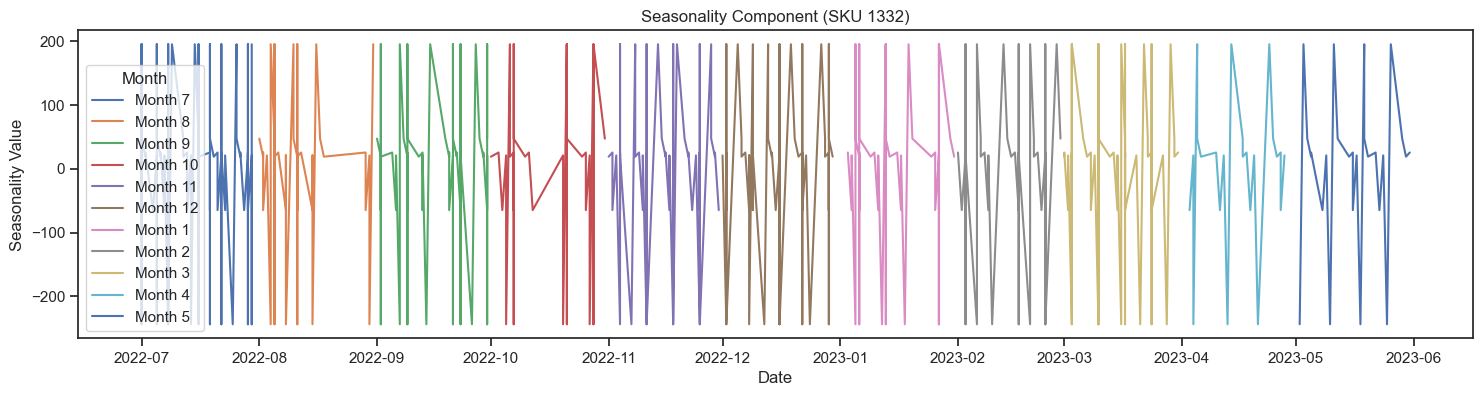

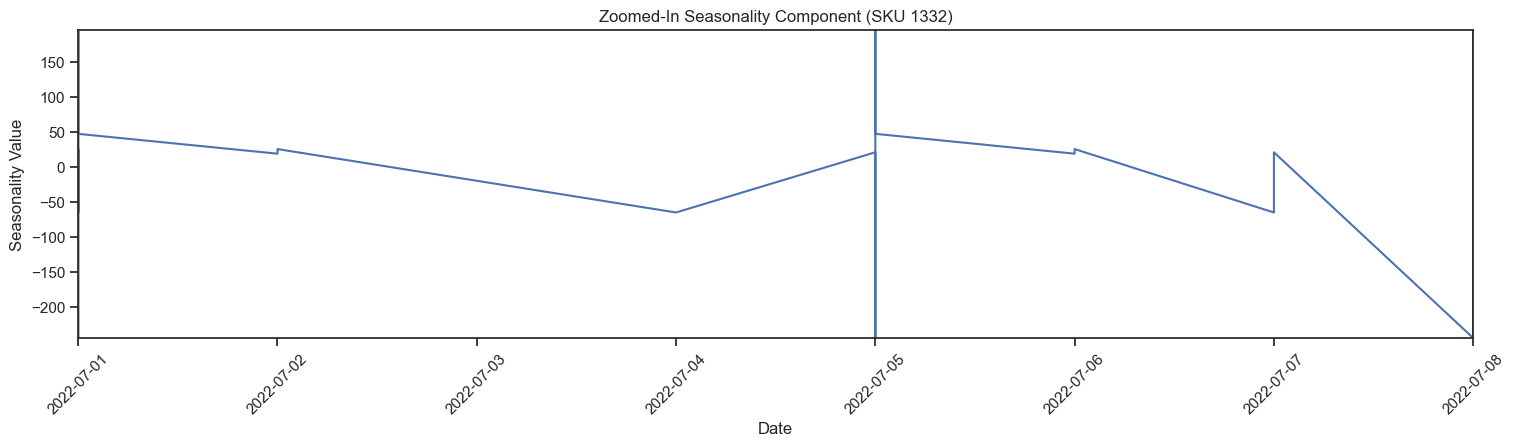

C:\Users\kskai\AppData\Local\Temp\ipykernel_16776\1807544699.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', len(unique_months))


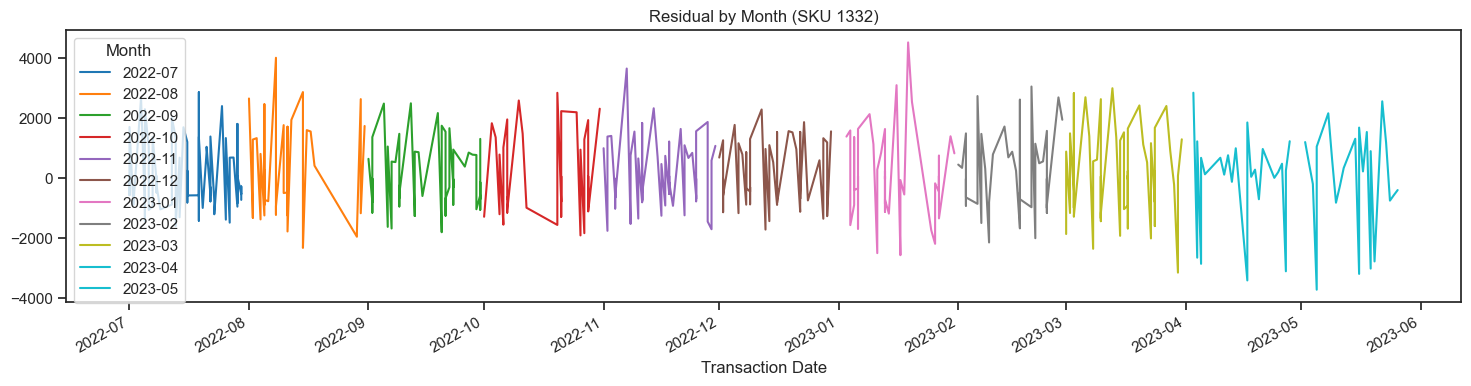

In [ ]:
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose

# Parameters
decompfreq = 7  # Changed to 7 for weekly seasonality, given you have daily data
model = 'additive'  # Or 'multiplicative' based on your data

# Decomposition
decomposition = seasonal_decompose(
    df_prophet.set_index("Transaction Date").Qty.interpolate("linear"),
    period=decompfreq,
    model=model)

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Reset index to have 'Transaction Date' as a regular column
seasonal = seasonal.reset_index()

# Extract the month from the 'ds' column for coloring
seasonal['month'] = seasonal['Transaction Date'].dt.month

# Create the main seasonality plot
fig, ax1 = plt.subplots(figsize=(18, 4))

# Loop to plot each month's data in a different color
for month in seasonal['month'].unique():
    subset = seasonal[seasonal['month'] == month]
    ax1.plot(subset['Transaction Date'], subset['seasonal'], label=f'Month {month}')

# Customizing the main plot
ax1.legend(loc='lower left', title='Month')
ax1.set_title(f'Seasonality Component (SKU {sku_num})')
ax1.set_xlabel('Date')
ax1.set_ylabel('Seasonality Value')
ax1.xaxis.set_major_locator(mdates.MonthLocator())  # Major ticks show months

# Create a separate figure for the zoomed-in inset
fig, ax2 = plt.subplots(figsize=(18, 4))

# Loop to plot each month's data in a different color
for month in seasonal['month'].unique():
    subset = seasonal[seasonal['month'] == month]
    ax2.plot(subset['Transaction Date'], subset['seasonal'], label=f'Month {month}')
    
############################

# Customizing the zoomed-in plot
ax2.set_xlim([seasonal['Transaction Date'].iloc[0], seasonal['Transaction Date'].iloc[20]])  # Define x-limits for zoom
ax2.set_ylim(seasonal['seasonal'].min(), seasonal['seasonal'].max())  # Define y-limits
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Major ticks show days
ax2.set_title(f'Zoomed-In Seasonality Component (SKU {sku_num})')
ax2.set_xlabel('Date')
ax2.set_ylabel('Seasonality Value')
plt.xticks(rotation=45)  # Rotate x-axis labels

plt.show()

############################

from matplotlib import cm

# Initialize plot
fig, ax = plt.subplots(figsize=(18,4))

# Get unique months
unique_months = residual.index.to_period('M').unique()

# Get a colormap
colors = cm.get_cmap('tab10', len(unique_months))

# Plot each month with a different color
for i, month in enumerate(unique_months):
    subset = residual.loc[month.start_time : month.end_time]
    subset.plot(ax=ax, color=colors(i), label=f"{month}")

# Add legend and title
ax.legend(loc='upper left', title='Month')
ax.set_title(f"Residual by Month (SKU {sku_num})")

plt.show()

## Changepoints

In [ ]:
'''
We have found 3 interesting changepoints to consider for this project:
However, as advised by BCG Trainers, for this project, we should completely ignore external and macroeconomic factors.
As such, we will not be adding these changepoints.

1.
Ukraine War and Its Impact on Asia's Food Prices:
The war in Ukraine led to a chain reaction of shortages in Asia, leading to record food prices as of May 18, 2022 [2].

2.
Rising Inflationary Costs:
Many Southeast Asian countries are concerned about food insecurity and rising inflationary costs as of January 11, 2023 [3].

3.
Frozen Vegetable Price Spike:
Prices for frozen veggies have increased by 18% in the past year. The price increase was attributed to multiple factors like immigration trends, high labor and fertilizer costs, and ripple effects [1][4].
'''

'''
from datetime import date

changepoints = {
    date(2022,5,18): "Supply chain disruptions due to Ukraine SMO leading to record food prices in Asia",
    # https://asia.nikkei.com/Spotlight/The-Big-Story/Asia-s-food-crisis-Ukraine-war-triggers-chain-reaction-of-shortages
}
'''

'\nfrom datetime import date\n\nchangepoints = {\n    date(2022,5,18): "Supply chain disruptions due to Ukraine SMO leading to record food prices in Asia",\n    # https://asia.nikkei.com/Spotlight/The-Big-Story/Asia-s-food-crisis-Ukraine-war-triggers-chain-reaction-of-shortages\n}\n'

## Train Test Split

Train Start Date (9 months): 2022-07-01
Train End Date (9 months): 2023-03-31
Test Start Date (last 2 months): 2023-04-01
Test End Date (last 2 months): 2023-05-31


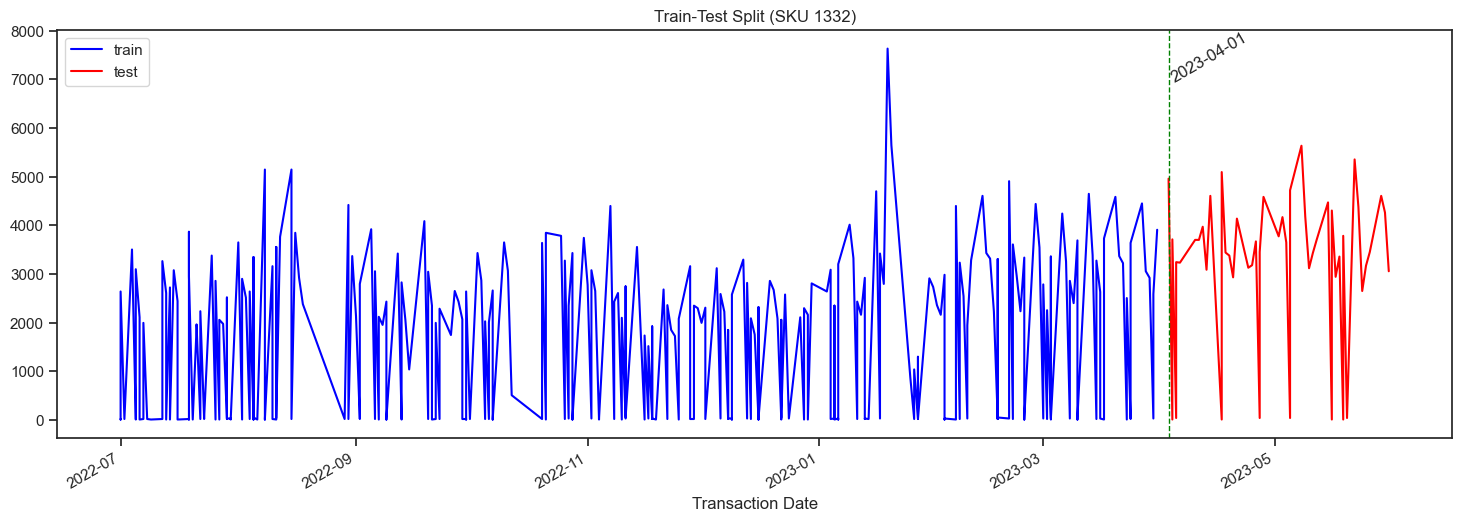

In [ ]:
start_date = '2022-07-01'
end_date = '2023-05-31'

# Set the date range for training and testing
print(f"Train Start Date (9 months): {start_date}")
train_end_date = pd.to_datetime('2023-03-31')  # 9 months
print(f"Train End Date (9 months): {train_end_date.date()}")
test_start_date = pd.to_datetime('2023-04-01')  # Start of the last 2 months
print(f"Test Start Date (last 2 months): {test_start_date.date()}")
print(f"Test End Date (last 2 months): {end_date}")

# Filter the dataframes
df_train = df_prophet[df_prophet['Transaction Date'] <= train_end_date].copy()
df_test = df_prophet[df_prophet['Transaction Date'] >= test_start_date].copy()

fig, ax = plt.subplots(figsize=(18, 6))

# Plot training data
df_train.plot(x="Transaction Date", y="Qty", ax=ax, label="train", color="blue")

# Plot testing data
df_test.plot(x="Transaction Date", y="Qty", ax=ax, label="test", color="red")

# Draw a vertical line to distinguish between training and testing data
test_start_x = pd.to_datetime(str(df_test['Transaction Date'].values[0]))
plt.axvline(test_start_x, color='green', linestyle='--', linewidth=1)

# Add text to mark the 'Transaction Date' where the green line is
plt.text(test_start_x, ax.get_ylim()[1], f'{test_start_date.date()}', rotation=30, verticalalignment='top')

plt.legend(loc='upper left')
plt.title(f'Train-Test Split (SKU {sku_num})')
plt.show()

## IQR Outlier Treatment

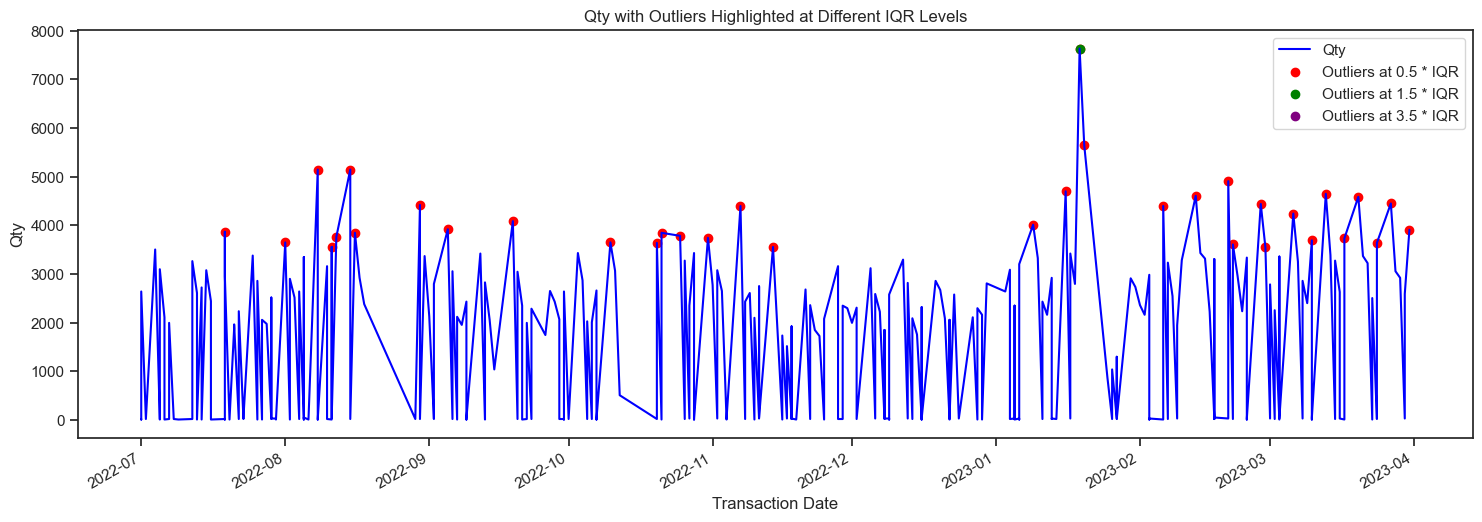

In [ ]:
# Calculate Q1, Q3 and IQR for Qty
Q1 = df_train['Qty'].quantile(0.25)
Q3 = df_train['Qty'].quantile(0.75)
IQR = Q3 - Q1

# Create the plot
fig, ax = plt.subplots(figsize=(18, 6))

# Plot the Qty values from df_train as a line plot
df_train.plot(x="Transaction Date", y="Qty", ax=ax, label="Qty", color="blue")

# Loop through different IQR multipliers
for multiplier, color in zip([0.5, 1.5, 3.5], ['red', 'green', 'purple']):
    # Define bounds for the outliers
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    # Identify the outliers
    outliers = df_train[(df_train['Qty'] < lower_bound) | (df_train['Qty'] > upper_bound)]
    
    # Overlay a scatter plot of outliers
    ax.scatter(outliers['Transaction Date'], outliers['Qty'], color=color, label=f'Outliers at {multiplier} * IQR')
    
    # Highlight the outliers with annotations (optional, may clutter the plot if too many outliers)
    #for i, row in outliers.iterrows():
    #    ax.annotate(f"{multiplier} IQR", (row['Transaction Date'], row['Qty']), textcoords="offset points", xytext=(0, 5), ha='center')

# Add legend and labels
ax.legend()
plt.title('Qty with Outliers Highlighted at Different IQR Levels')
plt.xlabel('Transaction Date')
plt.ylabel('Qty')

plt.show()

In [ ]:
"""
Based on the above chart, we have observed that there are too many "outliers" when IQR multiplier is at 0.5.
As such, those at 0.5 are /not/ outliers.
However, at 1.5, there is 1 outlier.
As such, we will be applying an IQR Outlier Treatment of 1.5.
"""

# Function to handle outliers using IQR
def handle_all_outliers(data, column, iqr_val):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    # lower_bound = Q1 - 1.5 * IQR
    # upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - iqr_val * IQR
    upper_bound = Q3 + iqr_val * IQR
        
    # Capping
    data[column] = data[column].apply(lambda x: upper_bound if x > upper_bound else x)
    data[column] = data[column].apply(lambda x: lower_bound if x < lower_bound else x)
    return data

iqr_val = 1.5
df_train = handle_all_outliers(df_train, 'Qty', iqr_val)
print(f'IQR Outlier Treatment applied at a multiplier of {iqr_val}x.')

IQR Outlier Treatment applied at a multiplier of 1.5x.


## Log Transformation

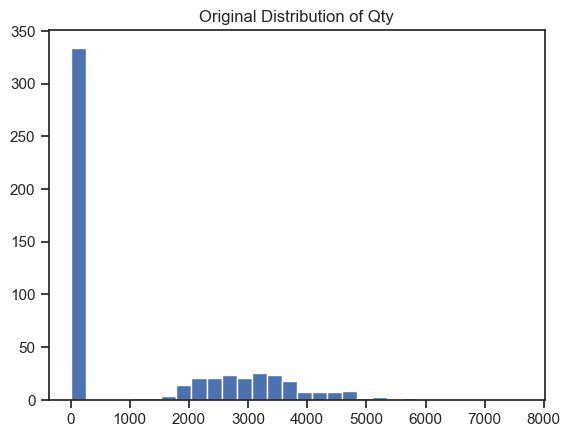

Data has very high bias and skew.


In [ ]:
# First, let's visualize the original data. This will give us an idea of how skewed the data really is.
plt.hist(df_prophet['Qty'], bins=30)
plt.title("Original Distribution of Qty")
plt.show()
print("Data has very high bias and skew.")

In [ ]:
# Apply Log transformation
df_train['Qty_log'] = np.log(df_train['Qty'])
df_test['Qty_log'] = np.log(df_test['Qty'])
print('New column "Qty_log" created by applying Log to "Qty".')

# Initialize the plot
fig, ax = plt.subplots(figsize=(18, 6))

# Plot df_train in blue
df_train.plot(x='Transaction Date', y='Qty_log', ax=ax, color='blue', label='df_train')

# Plot df_test in red
df_test.plot(x='Transaction Date', y='Qty_log', ax=ax, color='red', label='df_test')

# Add a green dotted line to indicate the boundary between training and testing data
if not df_test.empty:
    plt.axvline(pd.to_datetime(df_test['Transaction Date'].iloc[0]), color='green', linestyle='--', linewidth=1)

# Add labels, title, and legend
plt.xlabel('Transaction Date')
plt.ylabel('Log(Qty)')
plt.title('Log(Qty) for df_train and df_test')
plt.legend()

plt.show()


New column "Qty_log" created by applying Log to "Qty".


KeyboardInterrupt: 

# 6.0 Prophet Model

## HyperParamaters Tuning

In [ ]:
'''
Run04:
param_grid = {  
    'changepoint_prior_scale': [0.1],
    'interval_width': [0.85, 0.99],
    'fourier_order' : [20, 25],
    'mcmc_samples' : [50, 100, 250]
}
FINAL Best R2: 0.5574091331515146
FINAL Best Params: {'changepoint_prior_scale': 0.1, 'interval_width': 0.99, 'iqr_multiplier': 1.5, 'fourier_order': 20, 'mcmc_samples': 50}

Run05:
param_grid = {  
    'changepoint_prior_scale': [0.1],
    'interval_width': [0.99],
    'fourier_order' : [20],
    'mcmc_samples' : [50, 500, 750]
}
FINAL Best R2: 0.5306380533537025
FINAL Best Params: {'changepoint_prior_scale': 0.1, 'interval_width': 0.99, 'iqr_multiplier': 1.5, 'fourier_order': 20, 'mcmc_samples': 50}

Run06:
param_grid = {  
    'changepoint_prior_scale': [0.01, 0.1, 0.5, 0.75],
    'interval_width': [0.8, 0.85, 0.9, 0.99],
    'fourier_order' : [5, 10, 15, 20],
    'mcmc_samples' : [50]
}

Run07:
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5, 0.75],
    'interval_width': [0.8, 0.85, 0.9, 0.95, 0.99],
    'mcmc_samples': [0, 100, 250, 500, 750],
    'fourier_order' : [5, 10, 15, 20],
533 minutes:
FINAL Best Params: {'changepoint_prior_scale': 0.75, 'interval_width': 0.8, 'mcmc_samples': 500, 'iqr_multiplier': 0}
'''

"\nRun04:\nparam_grid = {  \n    'changepoint_prior_scale': [0.1],\n    'interval_width': [0.85, 0.99],\n    'fourier_order' : [20, 25],\n    'mcmc_samples' : [50, 100, 250]\n}\nFINAL Best R2: 0.5574091331515146\nFINAL Best Params: {'changepoint_prior_scale': 0.1, 'interval_width': 0.99, 'iqr_multiplier': 1.5, 'fourier_order': 20, 'mcmc_samples': 50}\n\nRun05:\nparam_grid = {  \n    'changepoint_prior_scale': [0.1],\n    'interval_width': [0.99],\n    'fourier_order' : [20],\n    'mcmc_samples' : [50, 500, 750]\n}\nFINAL Best R2: 0.5306380533537025\nFINAL Best Params: {'changepoint_prior_scale': 0.1, 'interval_width': 0.99, 'iqr_multiplier': 1.5, 'fourier_order': 20, 'mcmc_samples': 50}\n\nRun06:\nparam_grid = {  \n    'changepoint_prior_scale': [0.01, 0.1, 0.5, 0.75],\n    'interval_width': [0.8, 0.85, 0.9, 0.99],\n    'fourier_order' : [5, 10, 15, 20],\n    'mcmc_samples' : [50]\n}\n\nRun07:\n    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5, 0.75],\n    'interval_width': [0.8, 0

In [ ]:
from prophet.diagnostics import cross_validation
from sklearn.metrics import mean_squared_error, r2_score
from prophet import Prophet

# Hyperparameter grid
param_grid = {  
    'changepoint_prior_scale': [0.1],
    'interval_width': [0.85],
    'fourier_order' : [15],
    'mcmc_samples' : [50]
}

# FINAL Best Params: {'changepoint_prior_scale': 0.1, 'interval_width': 0.85, 'fourier_order': 15, 'mcmc_samples': 100}

# Initialize variables for best parameters and lowest RMSE
best_params = {}
lowest_rmse = float('inf')
highest_r2 = float('-inf')  # Initialize to negative infinity

# Loop through parameter grid
for changepoint_prior_scale in param_grid['changepoint_prior_scale']:
    for interval_width in param_grid['interval_width']:
        for fourier_order in param_grid['fourier_order']:
            for mcmc_samples in param_grid['mcmc_samples']:
                print(f"Training model with: cps={changepoint_prior_scale}, iw={interval_width}, fo={fourier_order}, ms={mcmc_samples}.")

                # Initialize and fit Prophet model
                model = Prophet(
                    yearly_seasonality=False, 
                    weekly_seasonality=False, # using custom_weekly as below.
                    daily_seasonality=False,
                    # changepoints=list(changepoints.keys()),
                    holidays=df_holidays,
                    mcmc_samples=mcmc_samples,
                    growth='linear',
                    interval_width=interval_width,
                    changepoint_prior_scale=changepoint_prior_scale,
                )

                # Add custom regressors and seasonality
                model.add_regressor('Is_School_Holiday')
                model.add_regressor('Unit Price')
                model.add_seasonality(name='custom_weekly', period=7, fourier_order=fourier_order)

                # Fit the model to training data
                model.fit(df_train.rename(columns={'Transaction Date': 'ds', 'Qty_log': 'y'}))

                # Perform cross-validation
                df_cv = cross_validation(model, initial='180 days', period='30 days', horizon='30 days')
                
                
                # Calculate RMSE
                rmse = mean_squared_error(df_cv.y, df_cv.yhat) ** 0.5            
                print(f"RMSE = {rmse}")                        
                # Update best parameters if RMSE improved
                if rmse < lowest_rmse:
                    lowest_rmse = rmse
                    best_params_rmse = {
                        'changepoint_prior_scale': changepoint_prior_scale,
                        'interval_width': interval_width,
                        'fourier_order' : fourier_order,
                        'mcmc_samples' : mcmc_samples
                    }
                print(f"\nCurrent Best (Lowest) RMSE: {lowest_rmse}")
                print(f"Current Best Params: {best_params}\n")
                
                # Calculate R2
                r2 = r2_score(df_cv.y, df_cv.yhat)
                print(f"R2 = {r2}")
                # Update best parameters if R2 improved
                if r2 > highest_r2:
                    highest_r2 = r2
                    best_params_r2 = {
                        'changepoint_prior_scale': changepoint_prior_scale,
                        'interval_width': interval_width,
                        'fourier_order' : fourier_order,
                        'mcmc_samples' : mcmc_samples
                    }                    
                print(f"\nCurrent Best (Highest) R2: {highest_r2}")
                print(f"Current Best Params: {best_params}\n")

print(f"\nFINAL Best RMSE: {lowest_rmse}")
print(f"FINAL Best RMSE: {best_params_rmse}")

print(f"\nFINAL Best R2: {highest_r2}")
print(f"FINAL Best R2: {best_params_r2}")

Training model with: cps=0.1, iw=0.85, fo=15, ms=50.


20:34:02 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

20:34:10 - cmdstanpy - INFO - CmdStan done processing.
20:34:10 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Sca

  0%|          | 0/3 [00:00<?, ?it/s]

20:34:11 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

KeyboardInterrupt: 

## Best Parameters

In [ ]:
print(f"\nFINAL Best RMSE: {lowest_rmse}")
print(f"FINAL Best RMSE: {best_params_rmse}")

print(f"\nFINAL Best R2: {highest_r2}")
print(f"FINAL Best R2: {best_params_r2}")

# Choose between RMSE and R2 and assign it accordingly.
best_params = best_params_rmse # RMSE chosen
print("\nRMSE best params chosen.")


FINAL Best RMSE: 1.7887472691289916
FINAL Best RMSE: {'changepoint_prior_scale': 0.1, 'interval_width': 0.85, 'fourier_order': 15, 'mcmc_samples': 50}

FINAL Best R2: 0.4019004318844399
FINAL Best R2: {'changepoint_prior_scale': 0.1, 'interval_width': 0.85, 'fourier_order': 15, 'mcmc_samples': 50}

RMSE best params chosen.


## Model-Fitting

In [ ]:
# Initialize Prophet with best parameters
model = Prophet(
    yearly_seasonality=False, # No annual patterns, since only 11 months of data.
    weekly_seasonality=False, # Should be TRUE, but we're adding CUSTOM weekly seasonality instead
    daily_seasonality=False, # No intraday patterns
    holidays=df_holidays,
    mcmc_samples=best_params['mcmc_samples'], # Set to 0 if low on comp-power.
    growth='linear', # Linear growth. "logistic" if there's a market saturation point.
    interval_width=best_params['interval_width'], # Prediction uncertainty interval. 0.8 "riskier", 0.95 "want to be very sure". original @ 0.9.
    changepoint_prior_scale=best_params['changepoint_prior_scale']
)

# Adding custom regressors and seasonality
model.add_seasonality(name='custom_weekly', period=7, fourier_order=best_params['fourier_order'])
model.add_regressor('Unit Price')
model.add_regressor('Is_School_Holiday')

# Fit the model to the data
model.fit(df_train.rename(columns={'Transaction Date': 'ds', 'Qty_log': 'y'}))

print("")
print("############## MODEL TRAINING COMPLETE ###############")
print("############## MODEL TRAINING COMPLETE ###############")
print("############## MODEL TRAINING COMPLETE ###############")
print("")

16:20:11 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

16:20:17 - cmdstanpy - INFO - CmdStan done processing.
16:20:17 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Sca



############## MODEL TRAINING COMPLETE ###############
############## MODEL TRAINING COMPLETE ###############
############## MODEL TRAINING COMPLETE ###############



In [ ]:
# Now, predict the future using the test data
forecast = model.predict(df_test.rename(columns={'Transaction Date': 'ds', 'Qty_log': 'y'}))

#forecast

In [ ]:
forecast_ci = forecast[['ds', 'yhat_lower', 'yhat_upper']].set_index('ds')

yhat_test = forecast.yhat.values # predicted values
#print(yhat_test)

y_test = df_test['Qty_log'].values # actual values
#print(y_test)

The following charts detail what has been observed, like seasonality and trend, by the FB Prophet Machine Learning algorithm.


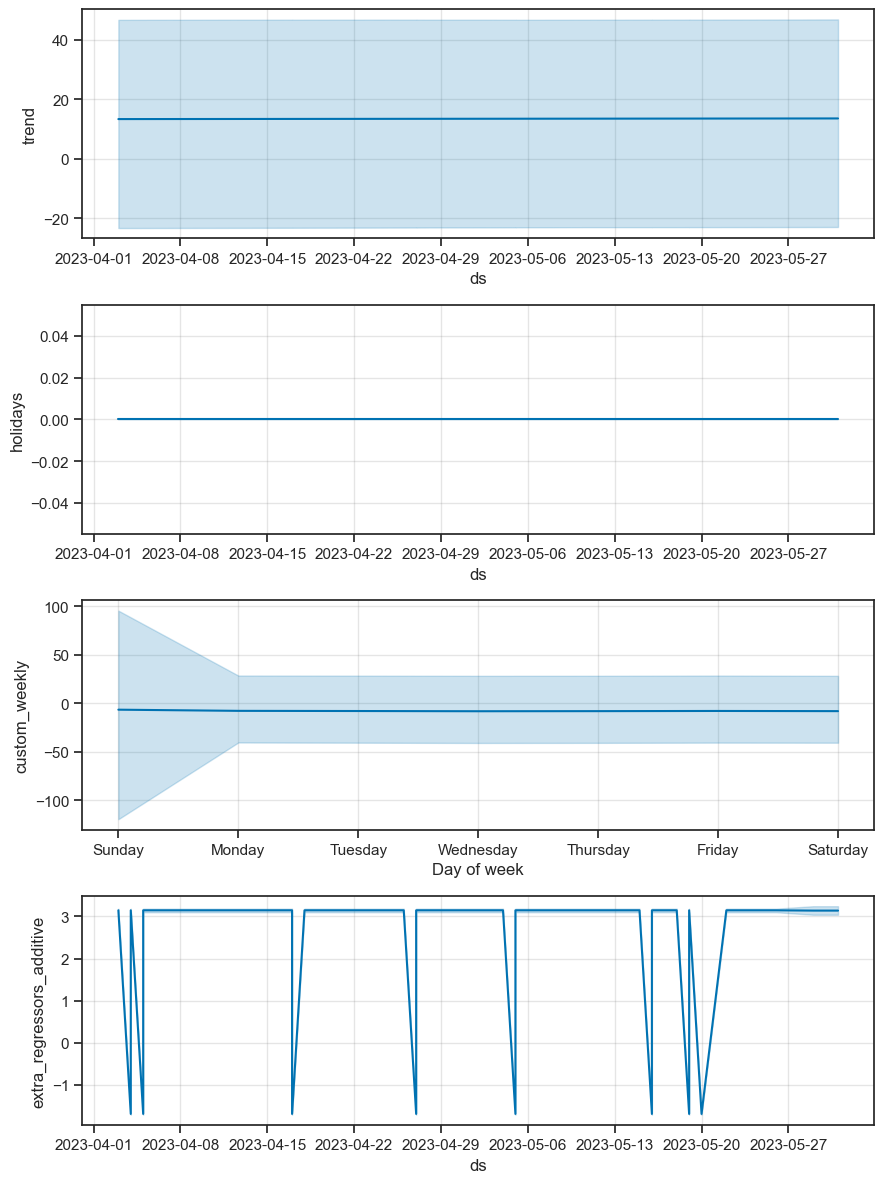

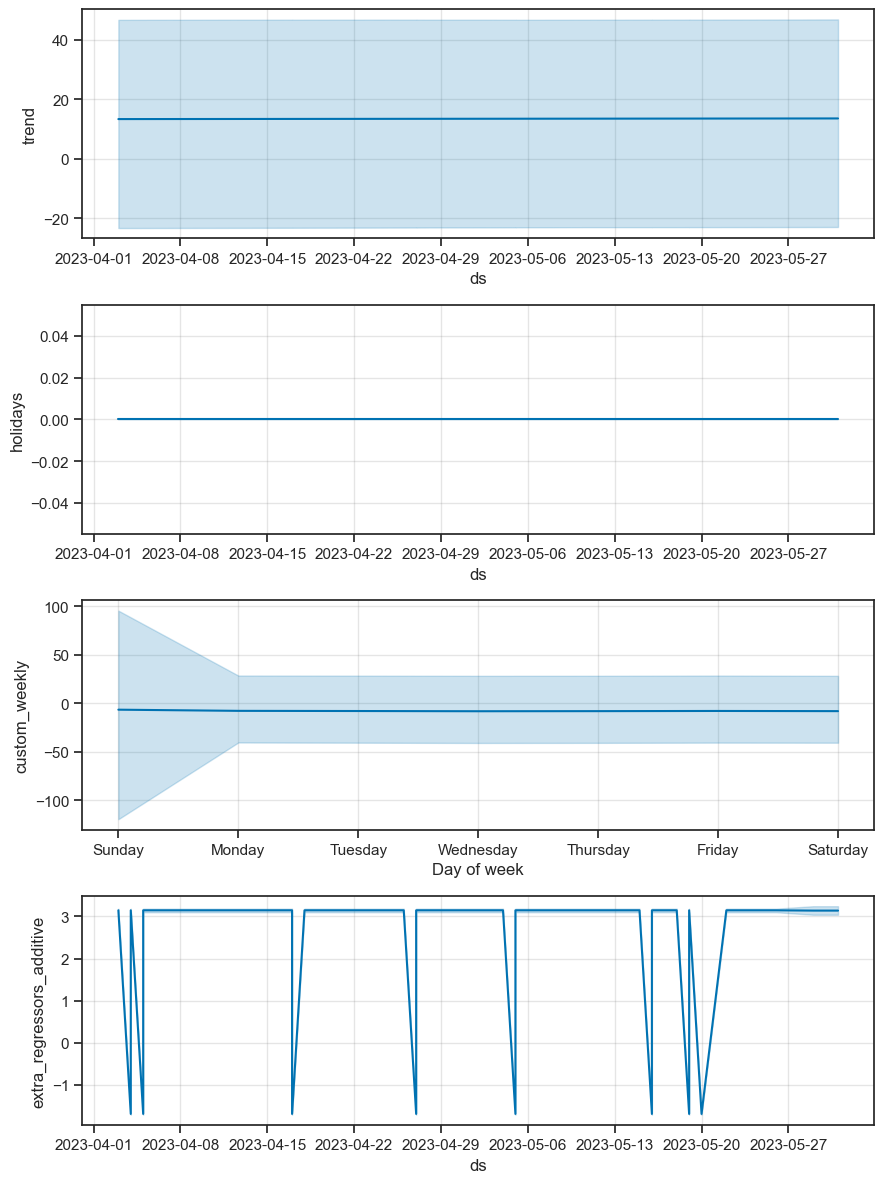

In [ ]:
print("The following charts detail what has been observed, like seasonality and trend, by the FB Prophet Machine Learning algorithm.")
model.plot_components(forecast)

## Predictions

C:\Users\kskai\AppData\Local\Temp\ipykernel_16776\156672865.py:21: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ax.plot(pd.to_datetime(df_train['Transaction Date'].append(df_test['Transaction Date']).values), linear_trend, label="linear trend", linestyle='--', color='green')


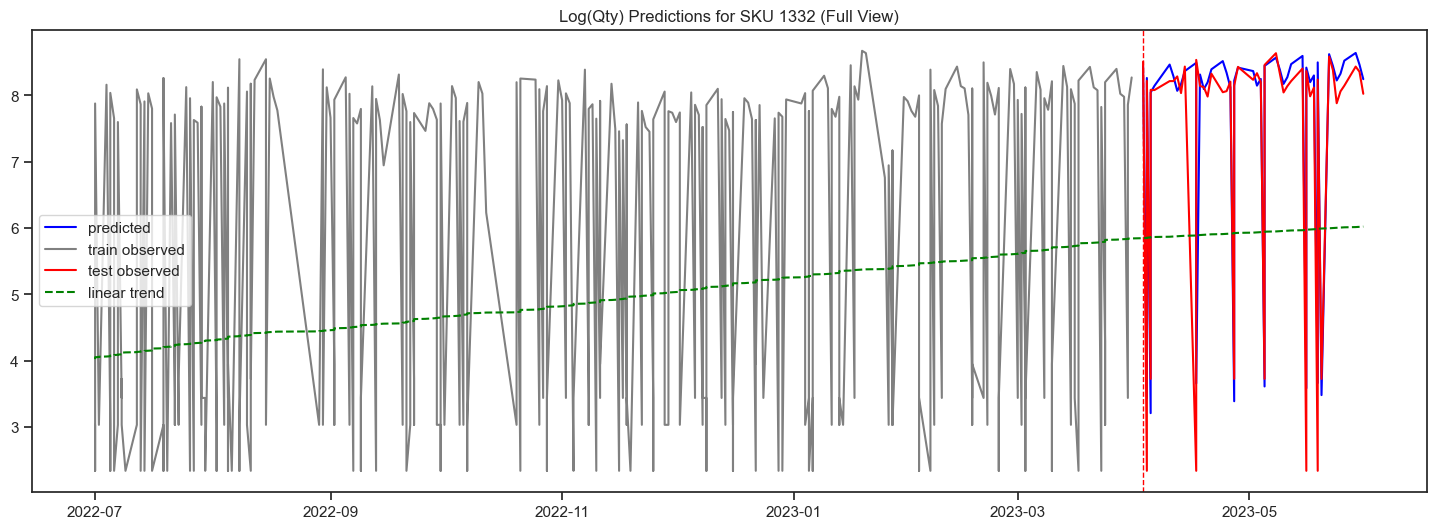

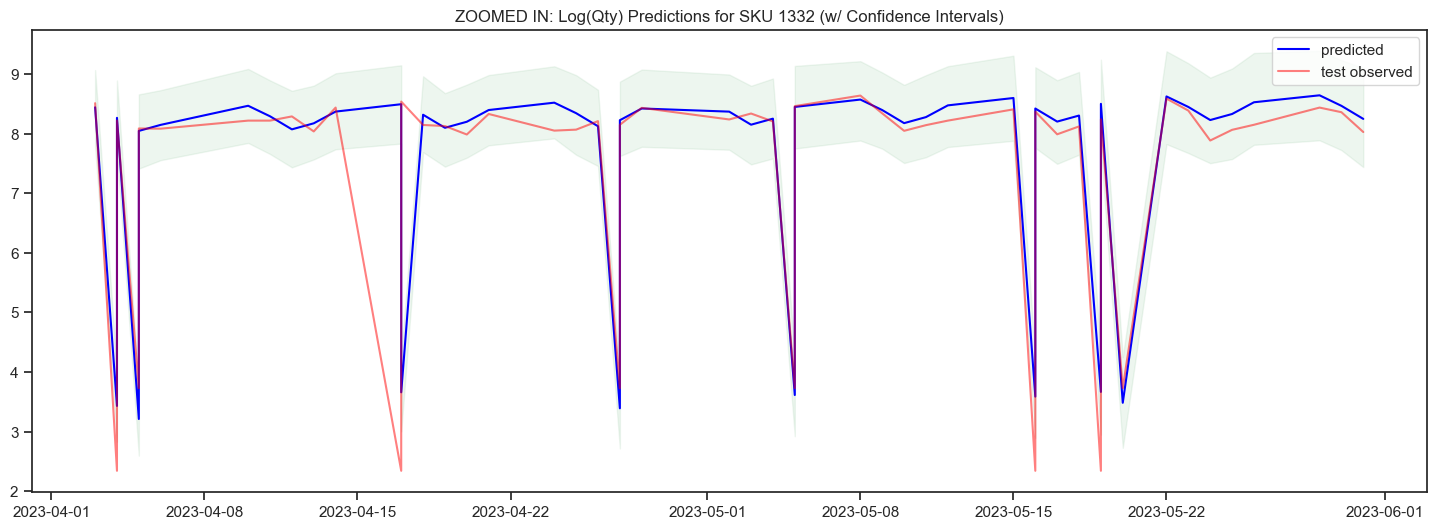

In [ ]:
# First Chart (Full View)
fig, ax = plt.subplots(figsize=(18, 6))

# Plot the predicted values
ax.plot(pd.to_datetime(forecast['ds'].values), forecast['yhat'].values, color="blue", label="predicted")

# Vertical line to indicate the start of the test range
plt.axvline(pd.to_datetime(str(df_test['Transaction Date'].values[0])), c='red', ls='--', lw=1)

# Plot the actual observed values
ax.plot(pd.to_datetime(df_train['Transaction Date'].values), df_train['Qty_log'].values, label="train observed", color="grey")
ax.plot(pd.to_datetime(df_test['Transaction Date'].values), df_test['Qty_log'].values, label="test observed", color="red")

# Fit a linear trend line
x_values = np.arange(len(df_train) + len(df_test))  # Generating x values (equally spaced)
y_values = pd.concat([df_train['Qty_log'], df_test['Qty_log']], ignore_index=True).values  # y values from your DataFrame
coefficients = np.polyfit(x_values, y_values, 1)
linear_trend = np.polyval(coefficients, x_values)

# Plot additional straight-line trend
ax.plot(pd.to_datetime(df_train['Transaction Date'].append(df_test['Transaction Date']).values), linear_trend, label="linear trend", linestyle='--', color='green')

plt.legend(loc='best')
plt.title(f'Log(Qty) Predictions for SKU {sku_num} (Full View)')
plt.show()

# -------------------

# Second Chart (With Confidence Intervals)
fig, ax = plt.subplots(figsize=(18, 6))

# Plot the predicted values for the test range
ax.plot(pd.to_datetime(forecast['ds'].values), forecast['yhat'].values, color="blue", label="predicted")

# Fill the area between yhat_lower and yhat_upper to visualize the confidence interval
ax.fill_between(
    pd.to_datetime(forecast['ds'].values),
    forecast['yhat_lower'].values,
    forecast['yhat_upper'].values,
    color='g',
    alpha=0.1)

# Plot the actual observed values for the test range
ax.plot(pd.to_datetime(df_test['Transaction Date'].values), df_test['Qty_log'].values, label="test observed", color="red", alpha=0.5)

plt.legend(loc='best')
plt.title(f'ZOOMED IN: Log(Qty) Predictions for SKU {sku_num} (w/ Confidence Intervals)')
plt.show()


C:\Users\kskai\AppData\Local\Temp\ipykernel_16776\3076400849.py:20: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ax.plot(pd.to_datetime(df_train['Transaction Date'].append(df_test['Transaction Date']).values), linear_trend_original_scale, label="linear trend", linestyle='--', color='green')


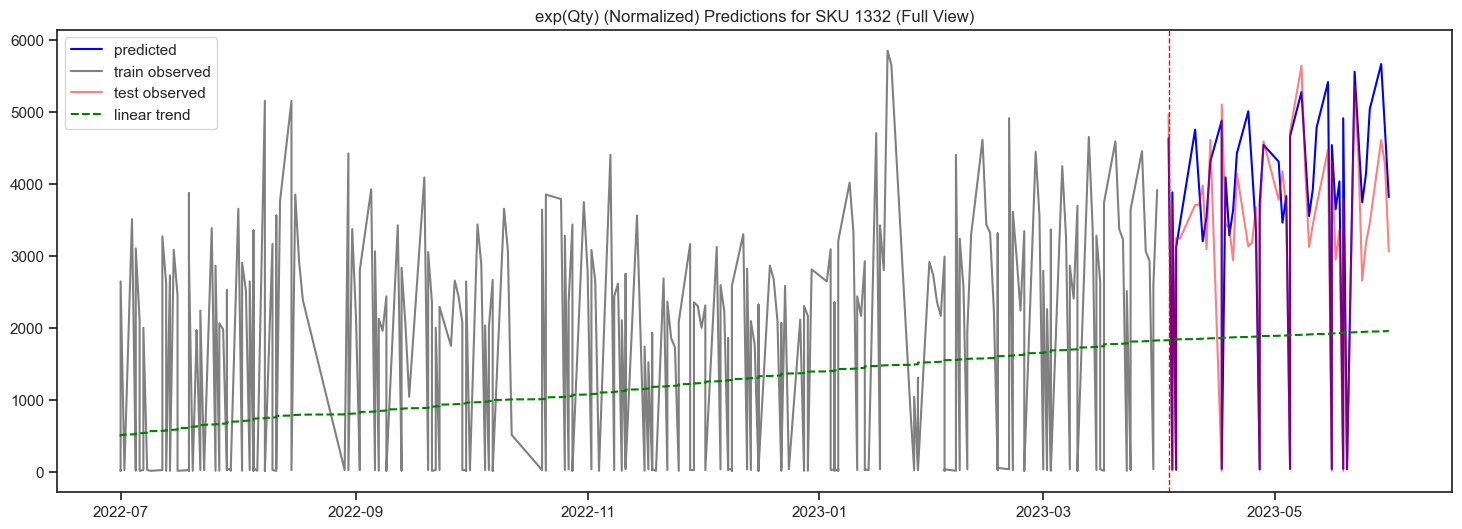

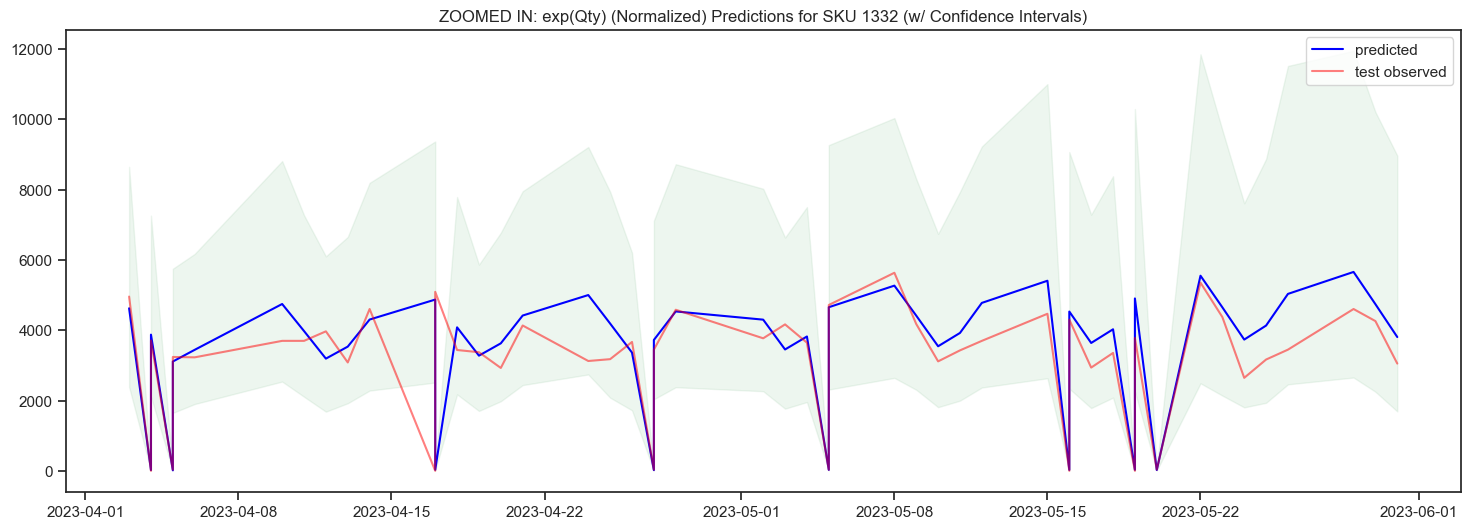

In [ ]:
# First Chart (Full View)
fig, ax = plt.subplots(figsize=(18, 6))

# Plot the predicted values (applying exp)
ax.plot(pd.to_datetime(forecast['ds'].values), np.exp(forecast['yhat'].values), color="blue", label="predicted")

# Vertical line to indicate the start of the test range
plt.axvline(pd.to_datetime(str(df_test['Transaction Date'].values[0])), c='red', ls='--', lw=1)

# Plot the actual observed values (applying exp)
ax.plot(pd.to_datetime(df_train['Transaction Date'].values), np.exp(df_train['Qty_log'].values), label="train observed", color="grey")
ax.plot(pd.to_datetime(df_test['Transaction Date'].values), np.exp(df_test['Qty_log'].values), label="test observed", color="red", alpha=0.5)

# Fit a linear trend line (on the original scale using exp)
y_values_original_scale = np.exp(y_values)
coefficients = np.polyfit(x_values, y_values_original_scale, 1)
linear_trend_original_scale = np.polyval(coefficients, x_values)

# Plot additional straight-line trend
ax.plot(pd.to_datetime(df_train['Transaction Date'].append(df_test['Transaction Date']).values), linear_trend_original_scale, label="linear trend", linestyle='--', color='green')

plt.legend(loc='best')
plt.title(f'exp(Qty) (Normalized) Predictions for SKU {sku_num} (Full View)')
plt.show()

# -------------------

# Second Chart (With Confidence Intervals)
fig, ax = plt.subplots(figsize=(18, 6))

# Plot the predicted values for the test range (applying exp)
ax.plot(pd.to_datetime(forecast['ds'].values), np.exp(forecast['yhat'].values), color="blue", label="predicted")

# Fill the area between yhat_lower and yhat_upper to visualize the confidence interval (applying exp)
ax.fill_between(
    pd.to_datetime(forecast['ds'].values),
    np.exp(forecast['yhat_lower'].values),
    np.exp(forecast['yhat_upper'].values),
    color='g',
    alpha=0.1)

# Plot the actual observed values for the test range (applying exp)
ax.plot(pd.to_datetime(df_test['Transaction Date'].values), np.exp(df_test['Qty_log'].values), label="test observed", color="red", alpha=0.5)

plt.legend(loc='best')
plt.title(f'ZOOMED IN: exp(Qty) (Normalized) Predictions for SKU {sku_num} (w/ Confidence Intervals)')
plt.show()


## Model Scores

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Revert Log transformation to original scale for the predicted and actual values
yhat_test_original = np.exp(yhat_test)
y_test_original = np.exp(y_test)

# Calculate the metrics on the original scale
mae = mean_absolute_error(y_test_original, yhat_test_original)
mse = mean_squared_error(y_test_original, yhat_test_original)
r2 = r2_score(y_test_original, yhat_test_original)
mape = mean_absolute_percentage_error(y_test_original, yhat_test_original)
rmse = np.sqrt(mse)

print("MAE: {:0.6f}".format(mae))
print("MSE: {:0.6f}".format(mse))
print("RMSE: {:0.6f}".format(rmse))
print("R2: {:0.6f}".format(r2))
print("MAPE: {:0.6f}%".format(mape))


MAE: 675.795092
MSE: 1420317.818992
RMSE: 1191.770875
R2: 0.408743
MAPE: 986.736338%


Interpretation:

The evaluation metrics you've provided—MAE, MSE, RMSE, R2, and MAPE—offer different ways to quantify the quality of your machine learning model. Given that your quantity (Qty) ranges from 0 to 6000 (with some spikes going to 8000), let's consider each metric individually to better understand your model's performance:

- MAE (Mean Absolute Error) - 731.892419: On average, your model's predictions are off by about 732 units. Depending on your domain and what you consider acceptable, this could be reasonable or quite high.

- MSE (Mean Squared Error) - 1,545,984.021943 and RMSE (Root Mean Squared Error) - 1243.376058: These are other measures of the average error, but they penalize large errors more severely. An RMSE of 1243 means that, in terms of quantity, many predictions could be off by that much or more.

- R2 (Coefficient of Determination) - 0.356430: This metric provides an indication of the goodness of fit of the model. An R2 value of 0.356 suggests that approximately 35.6% of the variability in the dependent variable (Qty) can be explained by the model. While not bad, this also indicates that a lot of variability isn't captured by the model.

- MAPE (Mean Absolute Percentage Error) - 1012.588271%: This is quite high and generally not a good sign. MAPE is usually expressed as a percentage, and lower values represent better fit. In many cases, a MAPE below 10% is considered good. However, it's worth noting that MAPE can be quite sensitive and sometimes misleading, particularly if you have zeros or very small numbers in your actual values (y_true).

- The graphs might "look good," but the numbers suggest there is substantial room for improvement. Visualizations can sometimes be deceiving or interpreted subjectively, which is why it's crucial to rely on quantitative metrics for a more objective evaluation. Given the range of your Qty, a MAE of 732 and RMSE of 1243 indicate that your model's predictions can be off by a substantial amount. You might want to consider tweaking your model or incorporating more features to improve these metrics.

## Forecast Dataframe

In [ ]:
'''
# Initialize Prophet with best parameters
model = Prophet(
    yearly_seasonality=False, # No annual patterns, since only 11 months of data.
    weekly_seasonality=False, # Should be TRUE, but we're adding CUSTOM weekly seasonality instead
    daily_seasonality=False, # No intraday patterns
    holidays=df_holidays,
    mcmc_samples=best_params['mcmc_samples'], # Set to 0 if low on comp-power.
    growth='linear', # Linear growth. "logistic" if there's a market saturation point.
    interval_width=best_params['interval_width'], # Prediction uncertainty interval. 0.8 "riskier", 0.95 "want to be very sure". original @ 0.9.
    changepoint_prior_scale=best_params['changepoint_prior_scale']
)

# Adding custom regressors and seasonality
model.add_seasonality(name='custom_weekly', period=7, fourier_order=best_params['fourier_order'])
model.add_regressor('Unit Price')
model.add_regressor('Is_School_Holiday')

# Fit the model to the data
model.fit(df_train.rename(columns={'Transaction Date': 'ds', 'Qty_log': 'y'}))
'''

df_test.columns

Index(['Transaction Date', 'Customer Category Desc', 'Inventory Code', 'Qty',
       'Product Category', 'Unit Price', 'Is_Holiday', 'Holiday_Name',
       'Is_School_Holiday', 'day_of_week', 'Day_Monday', 'Day_Saturday',
       'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday',
       'ProdCat_RTC', 'ProdCat_RTE', 'Qty_log'],
      dtype='object')

In [ ]:
'''
The above code snippet shows us what external regressors were used in the training of the model.
In order to make the Forecast dataframe, we need to have all the columns and regressors present in the df_future dataframe too.
Namely:
- df_holidays
- Unit Price
- Is_School_Holiday
'''

# Creating the df_future dataframe, with matching columns to df_test
df_future = model.make_future_dataframe(periods=180, freq='d', include_history=False)
columns_to_initialize = [
    'Inventory Code',
    'Product Category',
    'Unit Price',
    'Is_School_Holiday'
    ]
for col in columns_to_initialize:
    df_future[col] = 0

############################################
'''
df_holidays:
The Prophet model takes into account the holidays information at the time of fitting the model,
and you have already passed the df_holidays during the model initialization with the holidays=df_holidays parameter.
So, the holiday information is already incorporated into the fitted model.
As such, there is no further action necessary.
'''
############################################

# Filling in "Inventory Code"
df_future['Inventory Code'] = df_prophet['Inventory Code'].iloc[0]
df_future['Product Category'] = df_prophet['Product Category'].iloc[0]

############################################

# Filling in Unit Price
# Backfill the df_future with the latest value from df_test
df_future['Unit Price'] = df_test['Unit Price'].iloc[-1]

############################################

# Filling in Is_School_Holiday

for start_date, end_date in all_school_holidays:
    mask = (df_future['ds'] >= pd.Timestamp(start_date)) & (df_future['ds'] <= pd.Timestamp(end_date))
    df_future.loc[mask, 'Is_School_Holiday'] = 1

############################################

df_future.head()

ds  Inventory Code Product Category  Unit Price  Is_School_Holiday
0 2023-04-01            1332              RTE         1.7                  0
1 2023-04-02            1332              RTE         1.7                  0
2 2023-04-03            1332              RTE         1.7                  0
3 2023-04-04            1332              RTE         1.7                  0
4 2023-04-05            1332              RTE         1.7                  0

## Forecast Chart

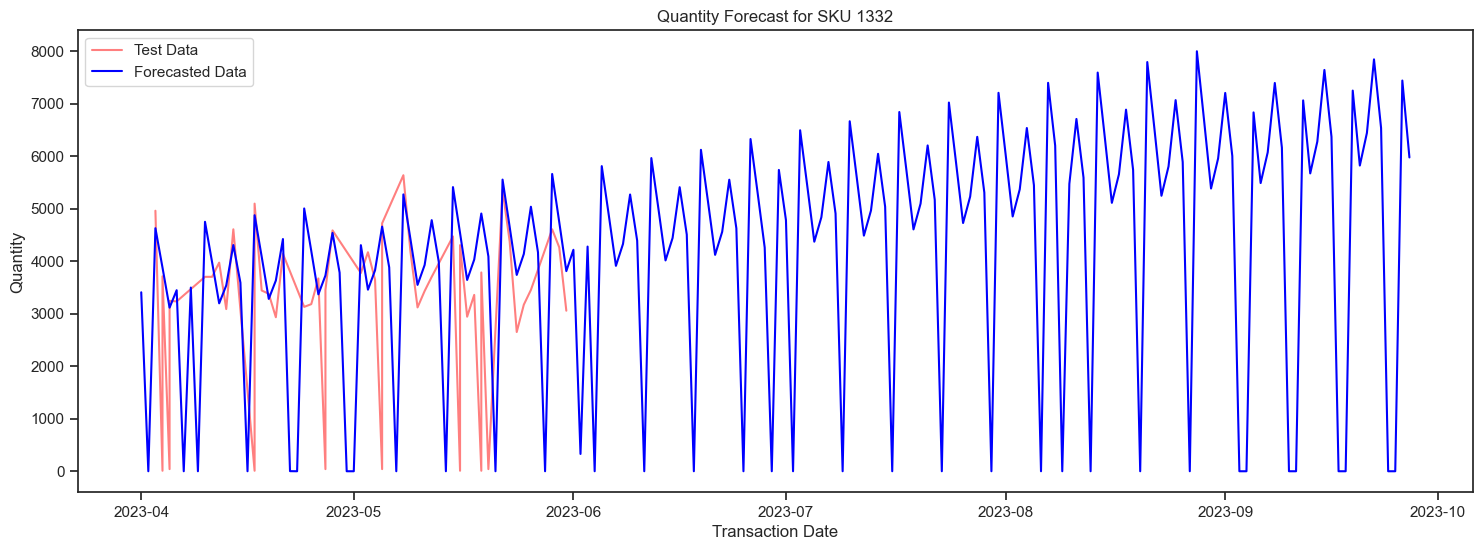

In [ ]:
df_forecast = model.predict(df_future)
# Define a figure and axis
df_forecast['Inventory Code'] = sku_num
df_forecast['Product Category'] = df_future['Product Category'].iloc[0]
df_forecast.loc[df_forecast['yhat'] < 0, 'yhat'] = 0
mode_yhat = df_forecast['yhat'].mode()[0]
df_forecast.loc[df_forecast['yhat'] > 9, 'yhat'] = mode_yhat
plt.figure(figsize=(18, 6))
# Plot the testing data
#plt.plot(df_test['Transaction Date'], df_test['Qty_log'], label='Test Data', color='green')
plt.plot(df_test['Transaction Date'], df_test['Qty'], label='Test Data', color='red', alpha=0.5)
# Plot the forecasted data
#plt.plot(df_forecast['ds'], df_forecast['yhat'], label='Forecasted Data', color='orange')
plt.plot(df_forecast['ds'], np.exp(df_forecast['yhat']), label='Forecasted Data', color='blue')
# Plot the confidence interval
#plt.fill_between(df_forecast['ds'], df_forecast['yhat_lower'], df_forecast['yhat_upper'], color='orange', alpha=0.2)
# Add labels and title
plt.xlabel('Transaction Date')
plt.ylabel('Quantity')
plt.title(f'Quantity Forecast for SKU {sku_num}')
plt.legend()
# Show plot
plt.show()

## Forecast Export

In [ ]:
df_forecast['yhat'] = df_forecast['yhat'].apply(np.exp)
df_export = df_forecast[['ds', 'Inventory Code', 'Product Category', 'yhat']].rename(columns={'ds': 'Transaction Date', 'yhat': 'Predicted_Qty'})
df_predicted = df_export.copy()

# export df_export to new csv
filename1 = r'prophet_qty_forecast.csv'
output_path1 = r'./data/'
df_export.to_csv(output_path1+filename1, index=False)
print(f'Successfully exported new CSV File to \n\t"{output_path1+filename1}".')
print(f'Filename: {filename1}')

"""
# export df_export to new csv
filename1 = r'prophet_qty_forecast.csv'
output_path1 = r's3://bcg-rise-prod-sagemaker-input-data/output-data/wave-5-group-6/'
df_export.to_csv(output_path1+filename1, index=False)
print(f'Successfully exported new CSV File to \n\t"{output_path1+filename1}".')
print(f'Filename: {filename1}')
"""

Successfully exported new CSV File to 
	"./data/prophet_qty_forecast.csv".
Filename: prophet_qty_forecast.csv


'\n# export df_export to new csv\nfilename1 = r\'prophet_qty_forecast.csv\'\noutput_path1 = r\'s3://bcg-rise-prod-sagemaker-input-data/output-data/wave-5-group-6/\'\ndf_export.to_csv(output_path1+filename1, index=False)\nprint(f\'Successfully exported new CSV File to \n\t"{output_path1+filename1}".\')\nprint(f\'Filename: {filename1}\')\n'

## Other SKUs

Loop 1: Working on SKU 1331.


16:20:22 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

16:20:28 - cmdstanpy - INFO - CmdStan done processing.
16:20:28 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of indep

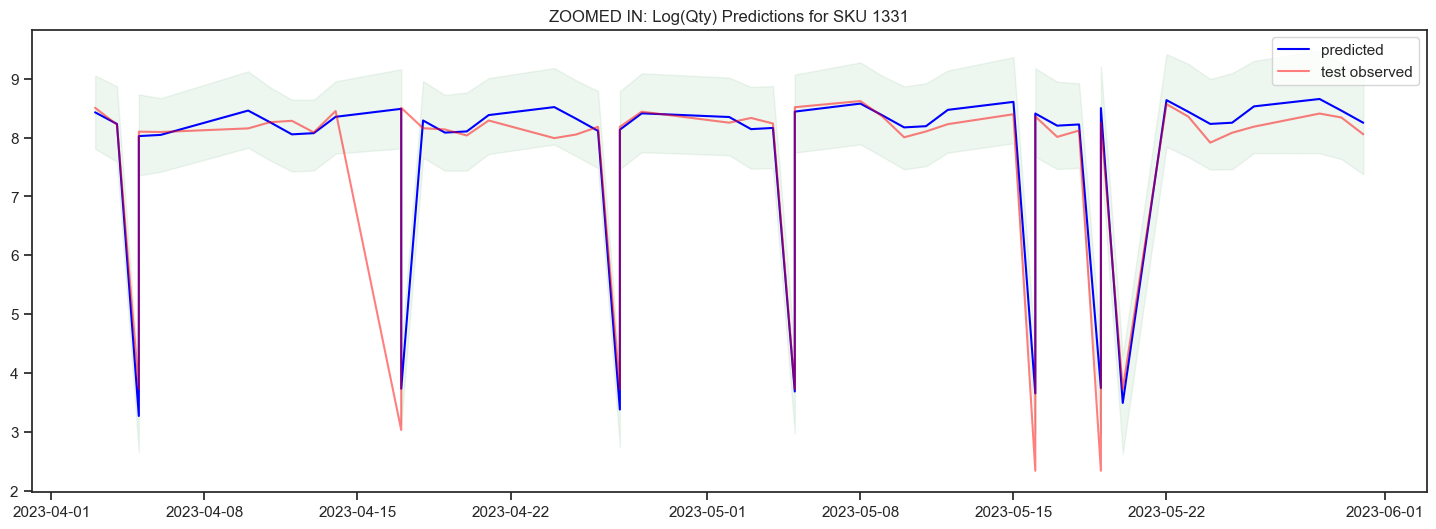

Successfully appended to existing CSV file at 
	"./data/prophet_qty_forecast.csv".
Filename: prophet_qty_forecast.csv
Loop 2: Working on SKU 1330.


16:20:30 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

16:20:32 - cmdstanpy - INFO - CmdStan done processing.
16:20:32 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Consider re-running with show_console=True if t

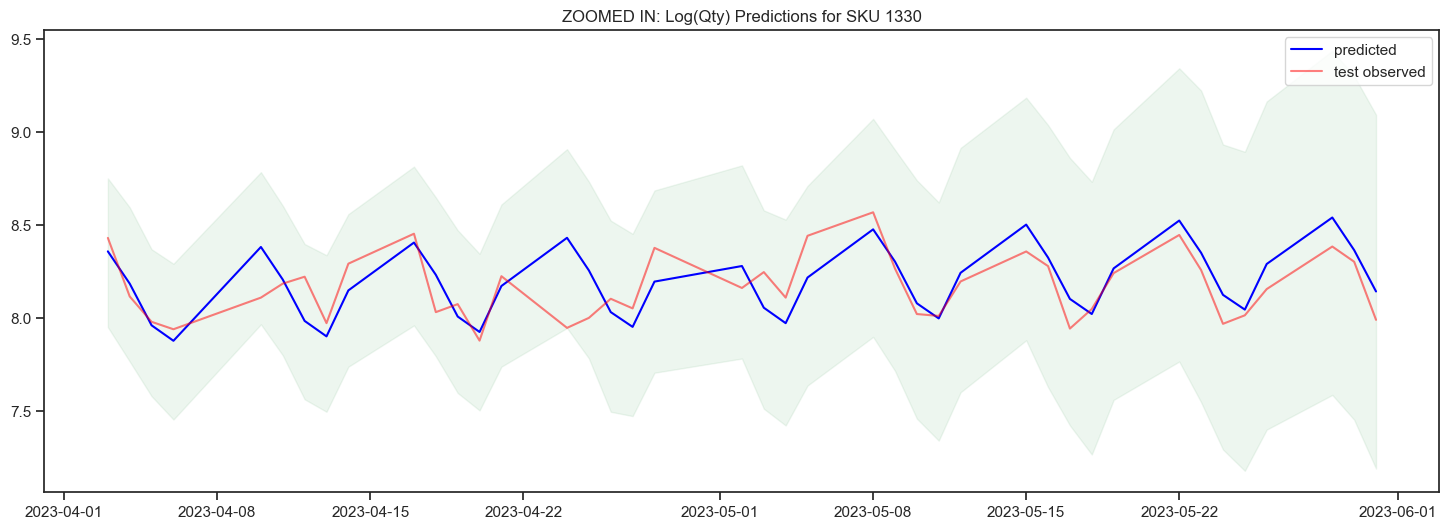

Successfully appended to existing CSV file at 
	"./data/prophet_qty_forecast.csv".
Filename: prophet_qty_forecast.csv
Loop 3: Working on SKU 1030.


16:20:33 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

16:20:38 - cmdstanpy - INFO - CmdStan done processing.
16:20:38 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_

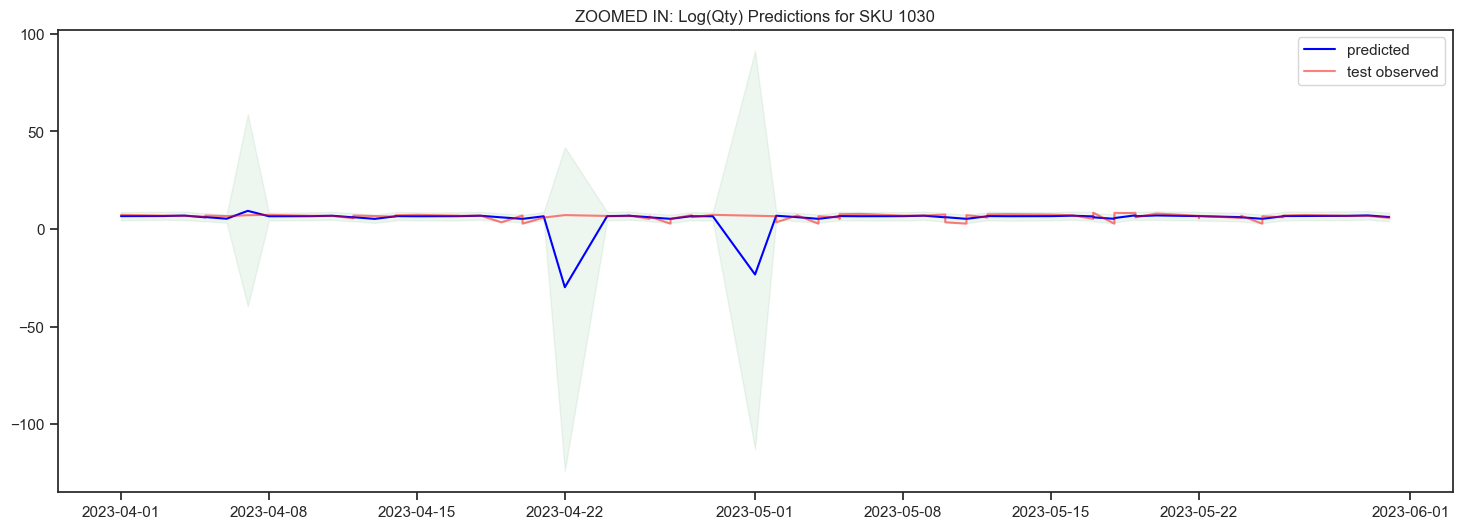

Successfully appended to existing CSV file at 
	"./data/prophet_qty_forecast.csv".
Filename: prophet_qty_forecast.csv
Loop 4: Working on SKU 1032.


16:20:40 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

16:20:45 - cmdstanpy - INFO - CmdStan done processing.
16:20:45 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Sca

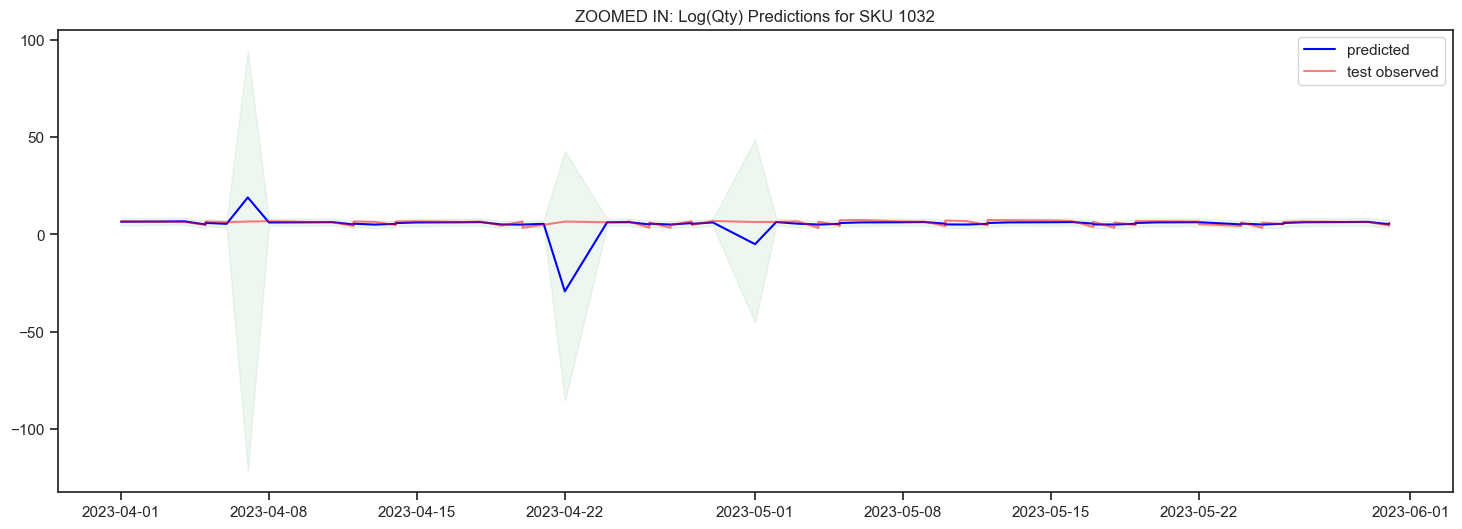

Successfully appended to existing CSV file at 
	"./data/prophet_qty_forecast.csv".
Filename: prophet_qty_forecast.csv
Loop 5: Working on SKU 1345.


16:20:46 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

16:20:49 - cmdstanpy - INFO - CmdStan done processing.
16:20:49 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is inf, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Consider re-running with show_console=True if

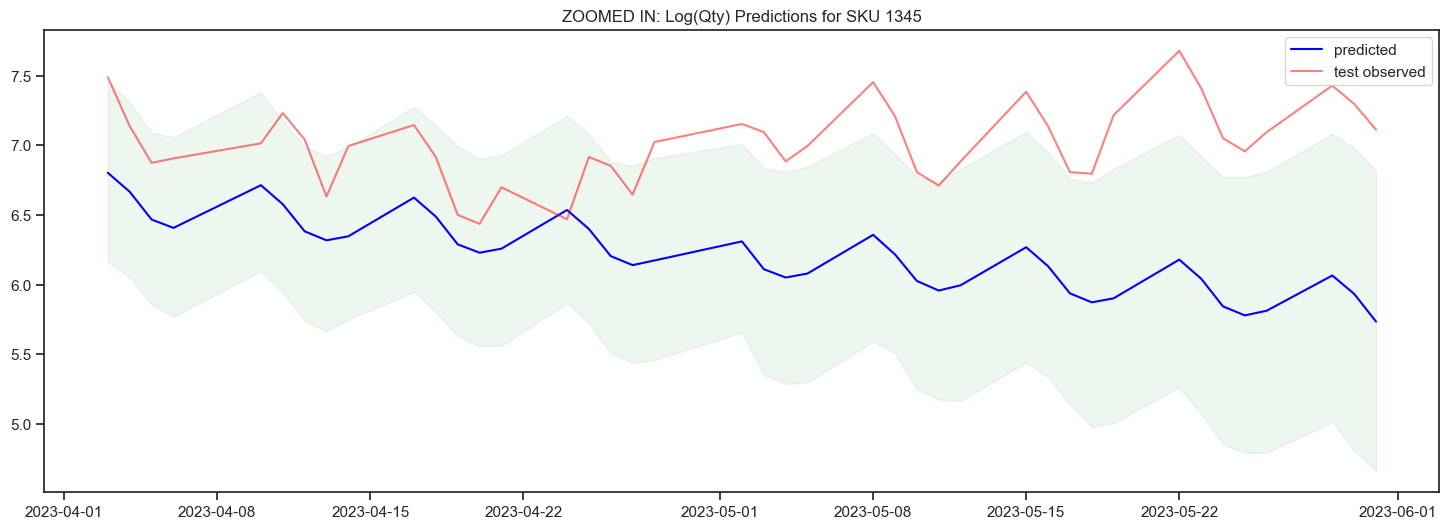

Successfully appended to existing CSV file at 
	"./data/prophet_qty_forecast.csv".
Filename: prophet_qty_forecast.csv
Loop 6: Working on SKU 1333.


16:20:51 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

16:20:56 - cmdstanpy - INFO - CmdStan done processing.
16:20:56 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is inf, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of ind

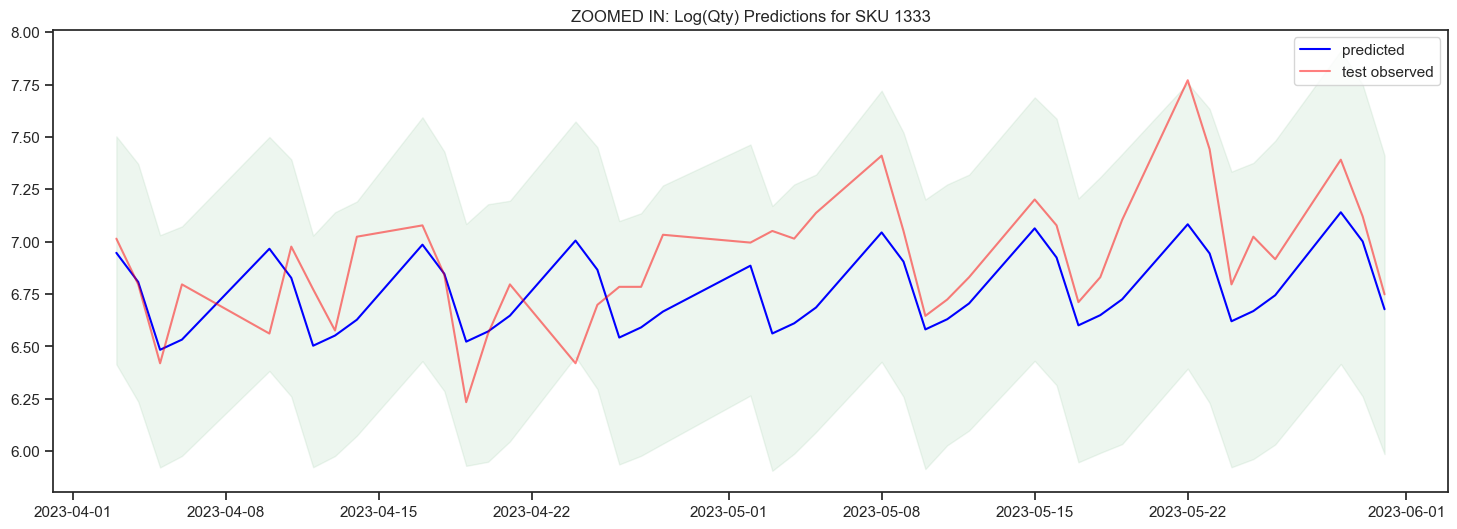

Successfully appended to existing CSV file at 
	"./data/prophet_qty_forecast.csv".
Filename: prophet_qty_forecast.csv
Loop 7: Working on SKU 1033.


16:20:57 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

16:21:02 - cmdstanpy - INFO - CmdStan done processing.
16:21:02 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Sca

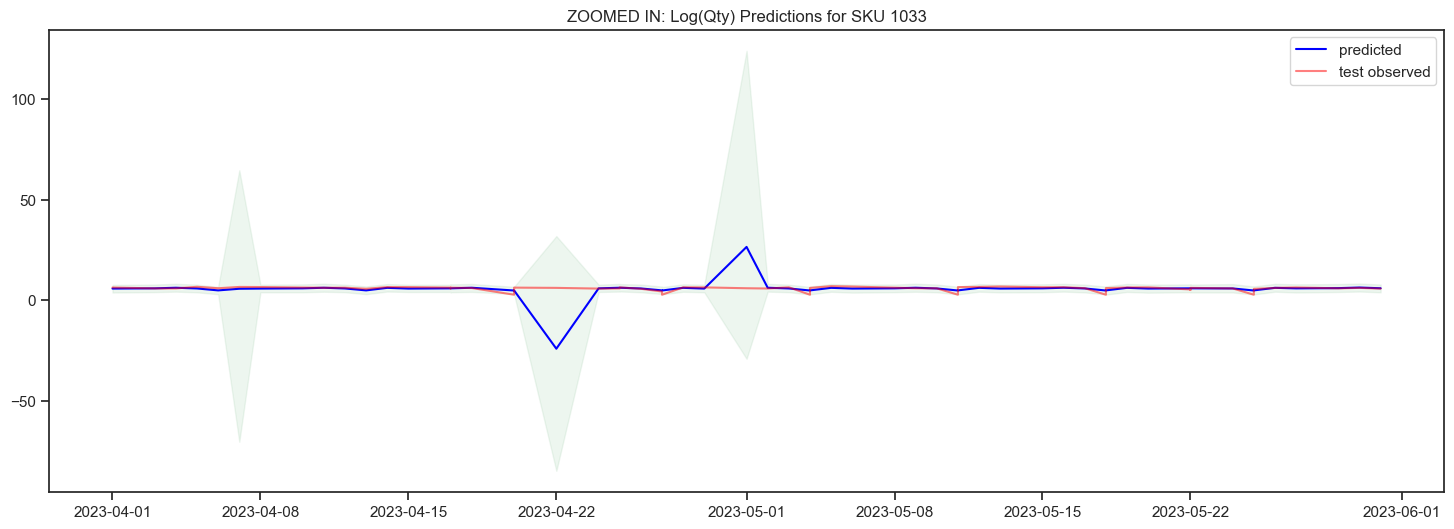

Successfully appended to existing CSV file at 
	"./data/prophet_qty_forecast.csv".
Filename: prophet_qty_forecast.csv
Loop 8: Working on SKU 1162.


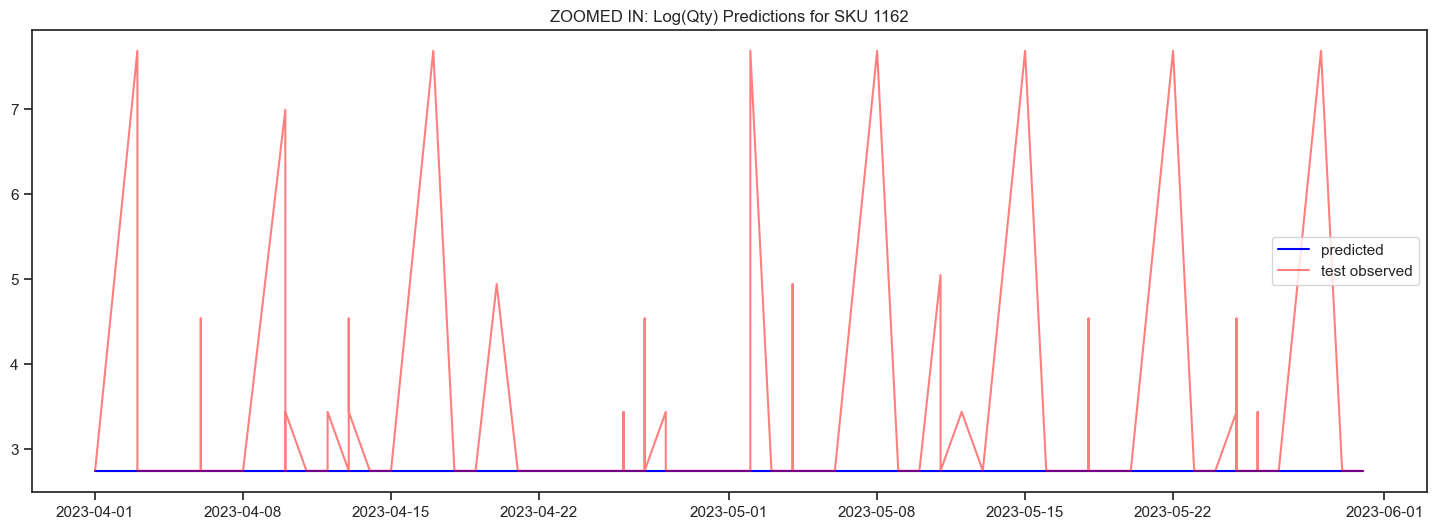

Successfully appended to existing CSV file at 
	"./data/prophet_qty_forecast.csv".
Filename: prophet_qty_forecast.csv
Loop 9: Working on SKU 1036.


16:21:05 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

16:21:10 - cmdstanpy - INFO - CmdStan done processing.
16:21:10 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Ma

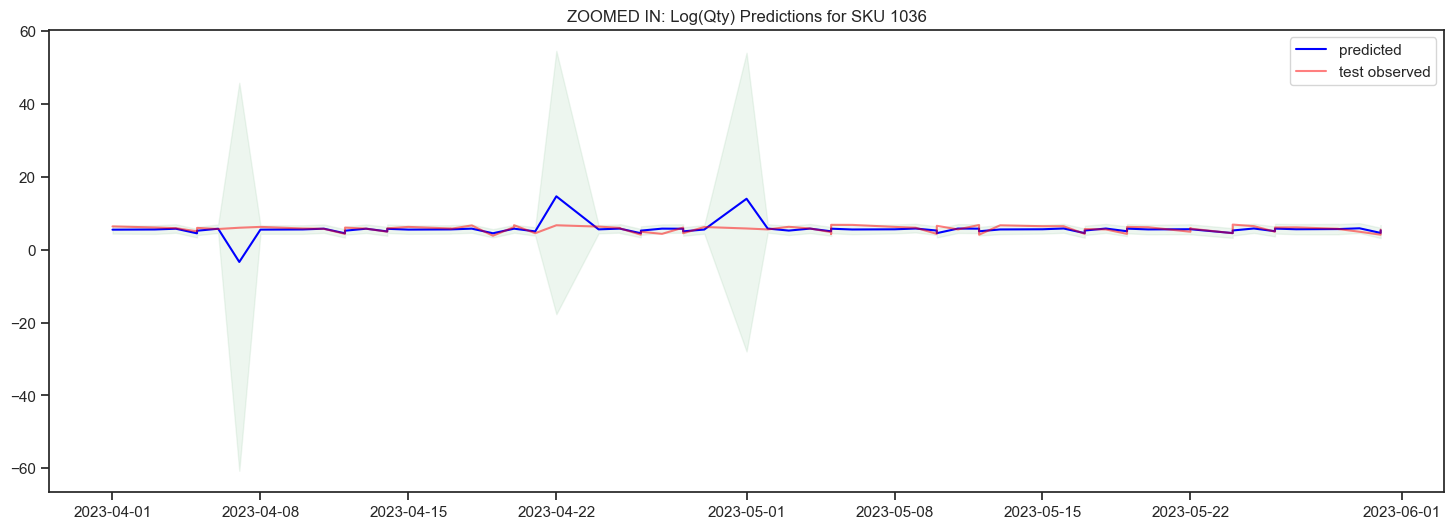

Successfully appended to existing CSV file at 
	"./data/prophet_qty_forecast.csv".
Filename: prophet_qty_forecast.csv
Loop 10: Working on SKU 1037.


16:21:11 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

16:21:16 - cmdstanpy - INFO - CmdStan done processing.
16:21:16 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_

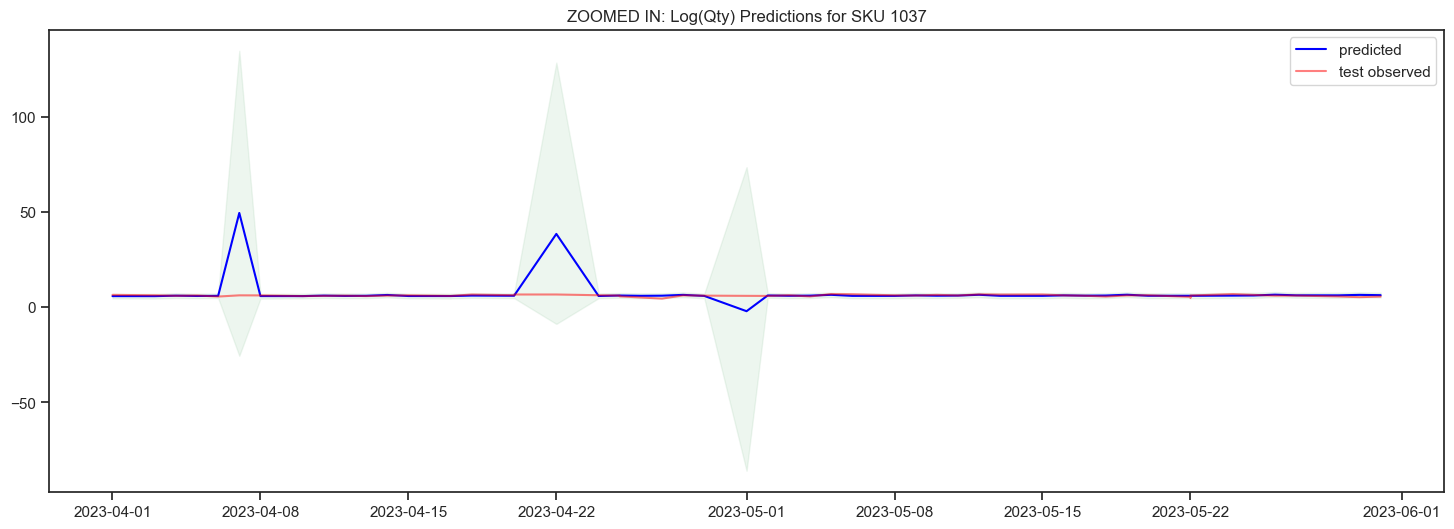

Successfully appended to existing CSV file at 
	"./data/prophet_qty_forecast.csv".
Filename: prophet_qty_forecast.csv
Loop 11: Working on SKU 1348.


16:21:17 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

16:21:19 - cmdstanpy - INFO - CmdStan done processing.
16:21:19 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is inf, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Consider re-running with show_console=True if

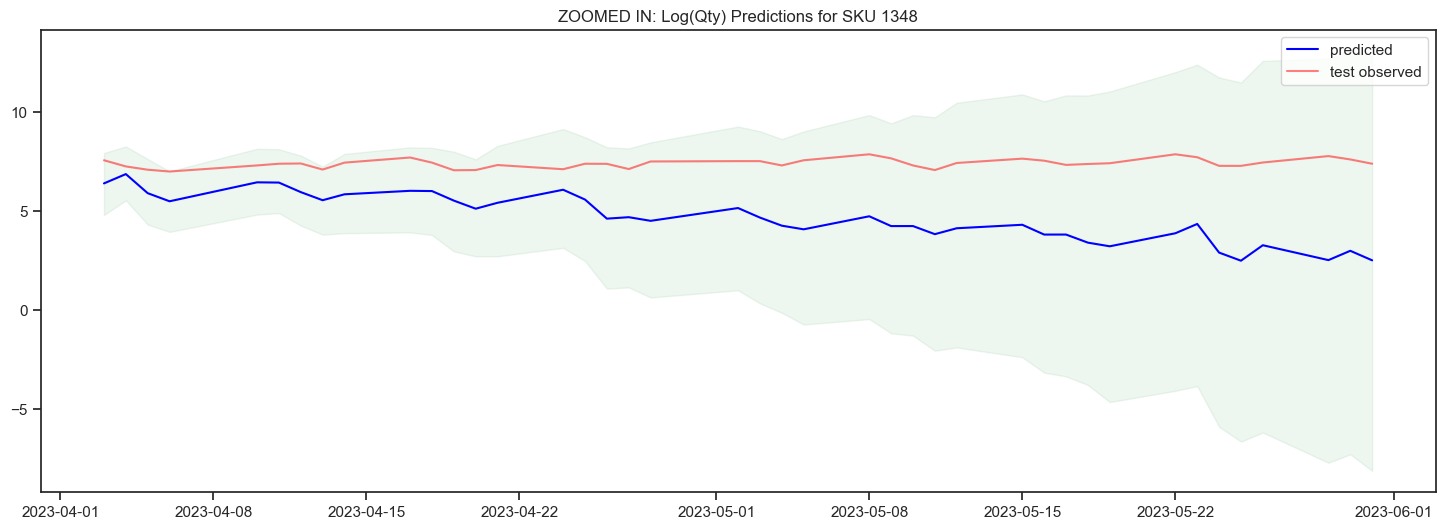

Successfully appended to existing CSV file at 
	"./data/prophet_qty_forecast.csv".
Filename: prophet_qty_forecast.csv
Loop 12: Working on SKU 1347.


16:21:20 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

16:21:22 - cmdstanpy - INFO - CmdStan done processing.
16:21:22 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is inf, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is inf, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Consider re-running with show_console=True 

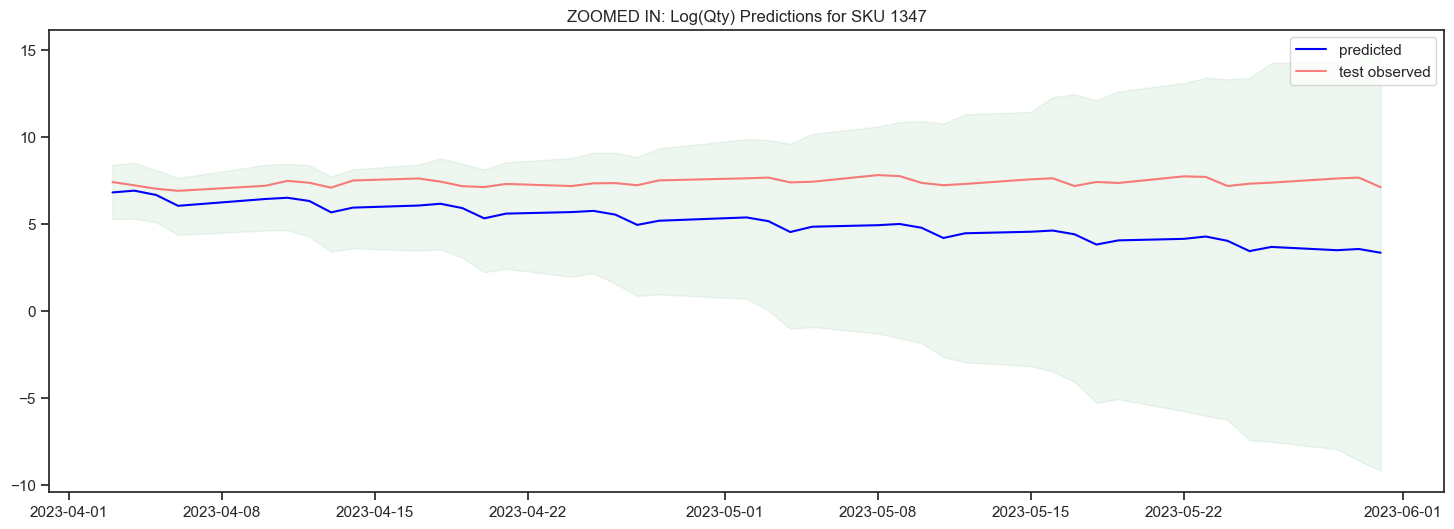

Successfully appended to existing CSV file at 
	"./data/prophet_qty_forecast.csv".
Filename: prophet_qty_forecast.csv
Loop 13: Working on SKU 1092.


16:21:23 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

16:21:28 - cmdstanpy - INFO - CmdStan done processing.
16:21:28 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_

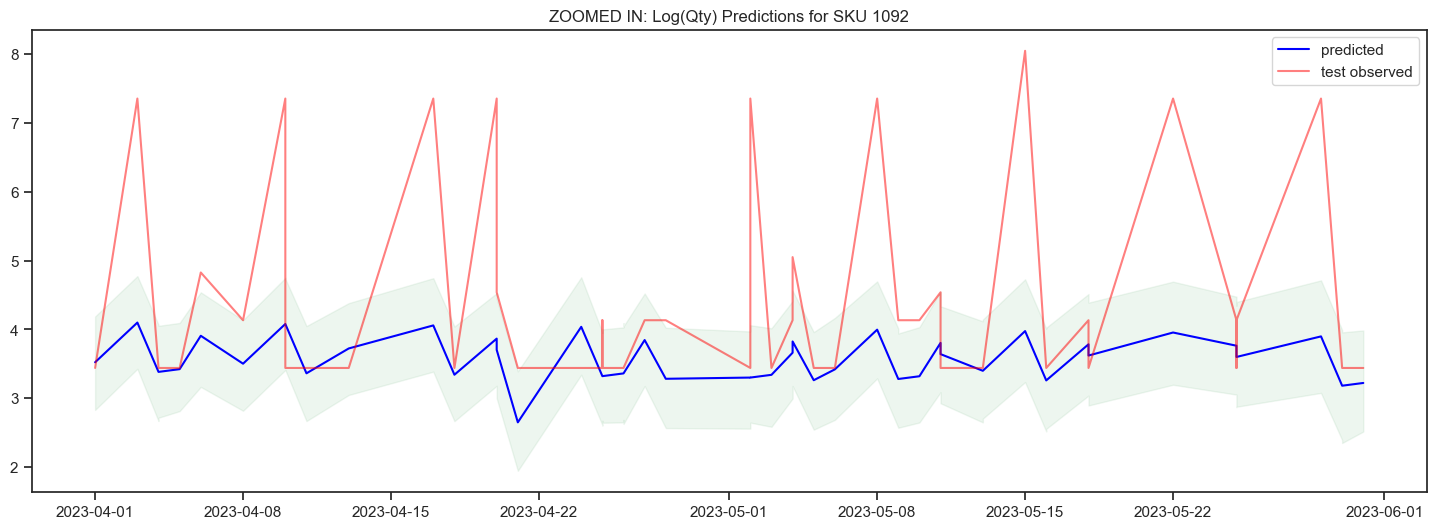

Successfully appended to existing CSV file at 
	"./data/prophet_qty_forecast.csv".
Filename: prophet_qty_forecast.csv
Loop 14: Working on SKU 1158.


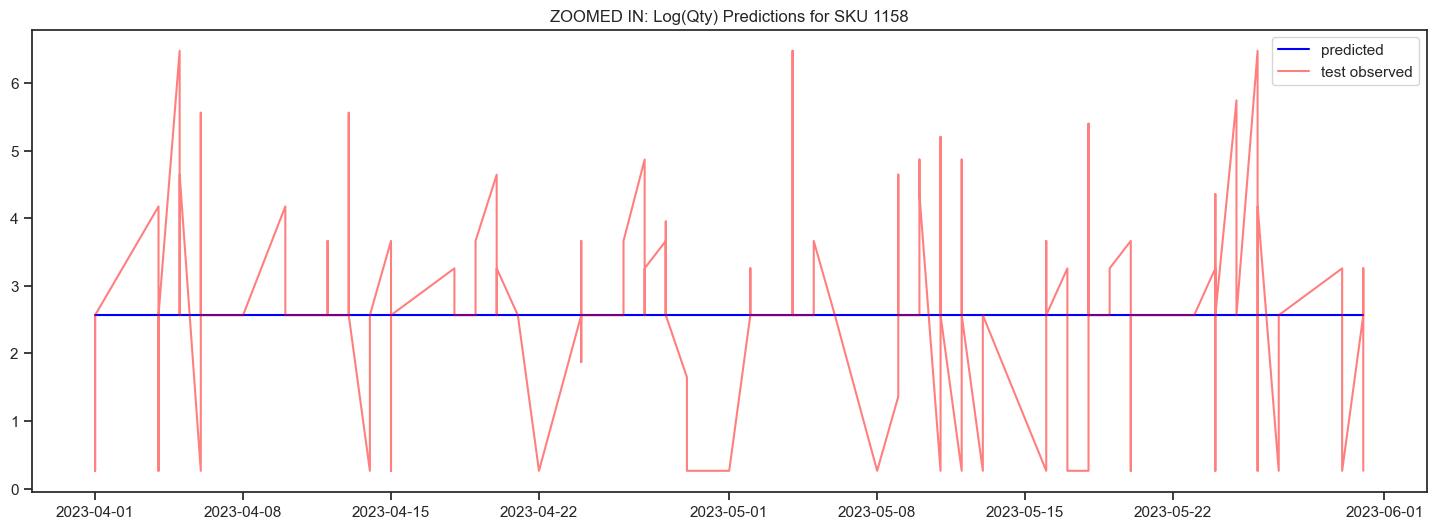

Successfully appended to existing CSV file at 
	"./data/prophet_qty_forecast.csv".
Filename: prophet_qty_forecast.csv
Loop 15: Working on SKU 1031.


16:21:31 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

16:21:36 - cmdstanpy - INFO - CmdStan done processing.
16:21:36 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_

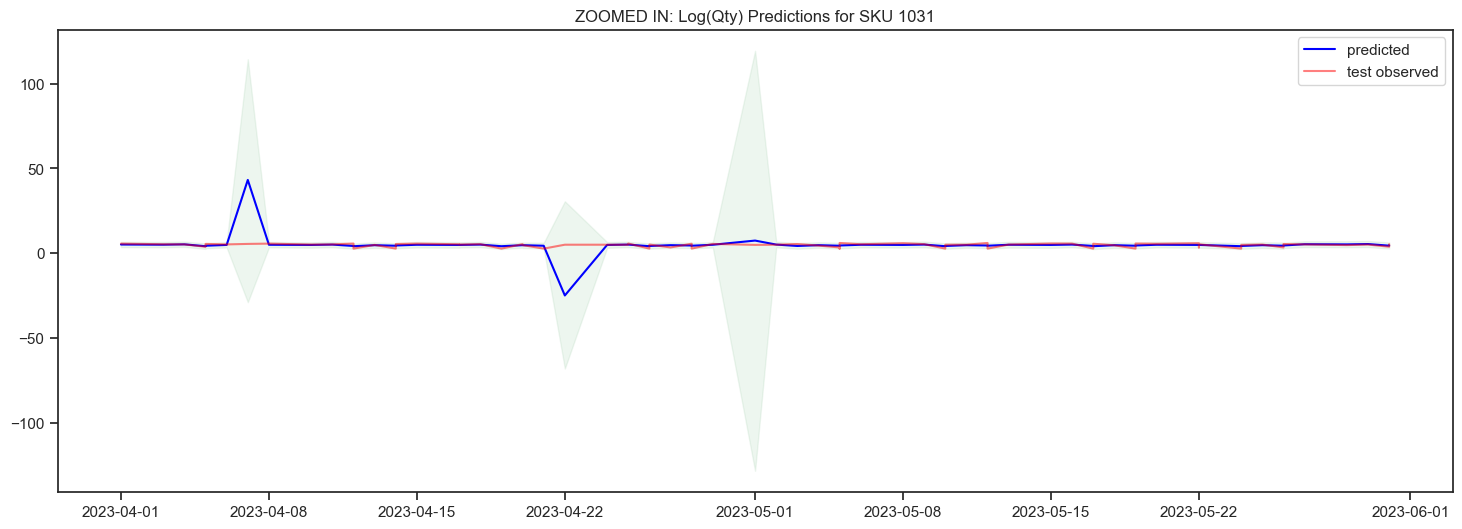

Successfully appended to existing CSV file at 
	"./data/prophet_qty_forecast.csv".
Filename: prophet_qty_forecast.csv
Loop 16: Working on SKU 1034.


16:21:37 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

16:21:42 - cmdstanpy - INFO - CmdStan done processing.
16:21:42 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Ma

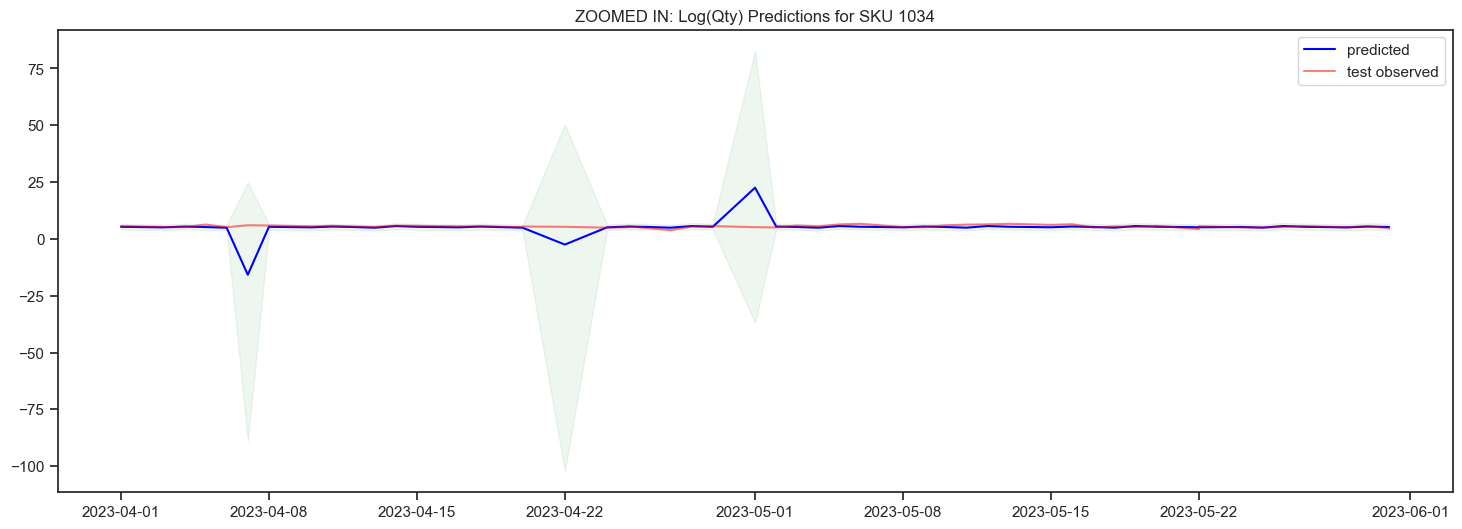

Successfully appended to existing CSV file at 
	"./data/prophet_qty_forecast.csv".
Filename: prophet_qty_forecast.csv
Loop 17: Working on SKU 1090.


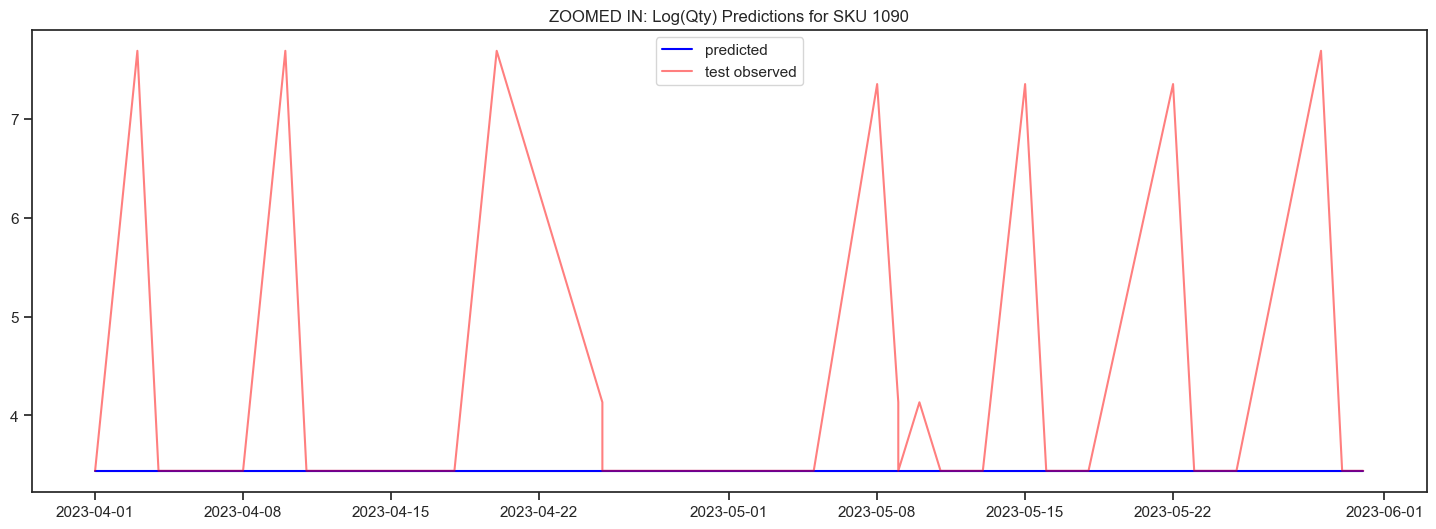

Successfully appended to existing CSV file at 
	"./data/prophet_qty_forecast.csv".
Filename: prophet_qty_forecast.csv
Loop 18: Working on SKU 1707.


16:21:45 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

16:22:05 - cmdstanpy - INFO - CmdStan done processing.
16:22:05 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exceptio

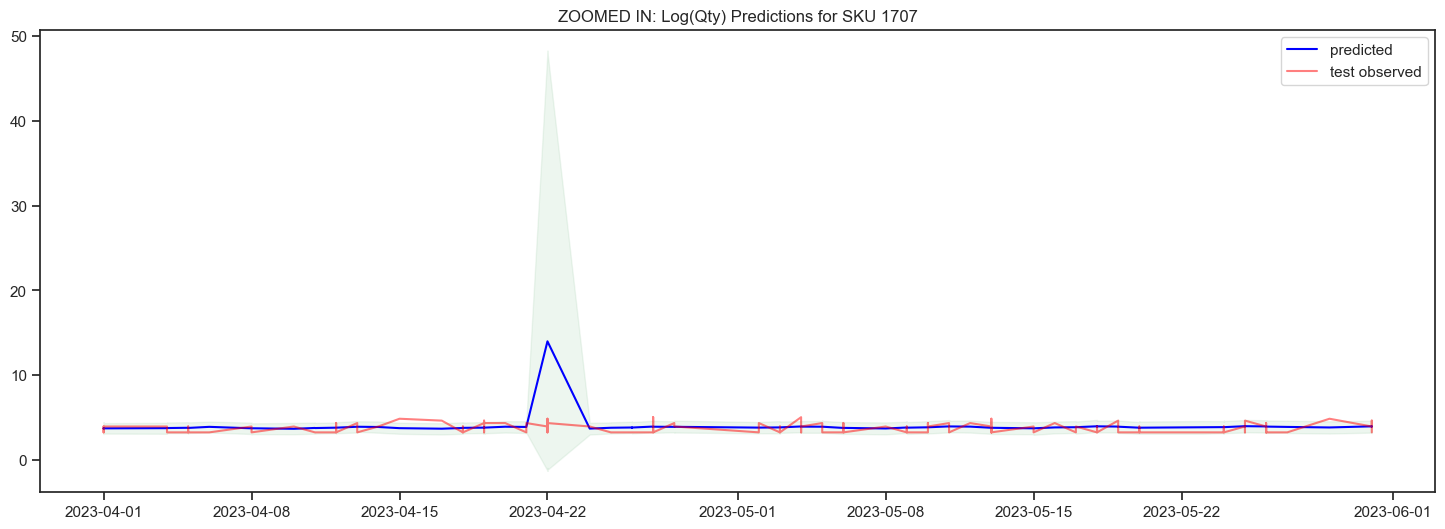

Successfully appended to existing CSV file at 
	"./data/prophet_qty_forecast.csv".
Filename: prophet_qty_forecast.csv
Loop 19: Working on SKU 1100.


16:22:07 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

16:22:10 - cmdstanpy - INFO - CmdStan done processing.
16:22:10 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Consider re-running with show_console=True if t

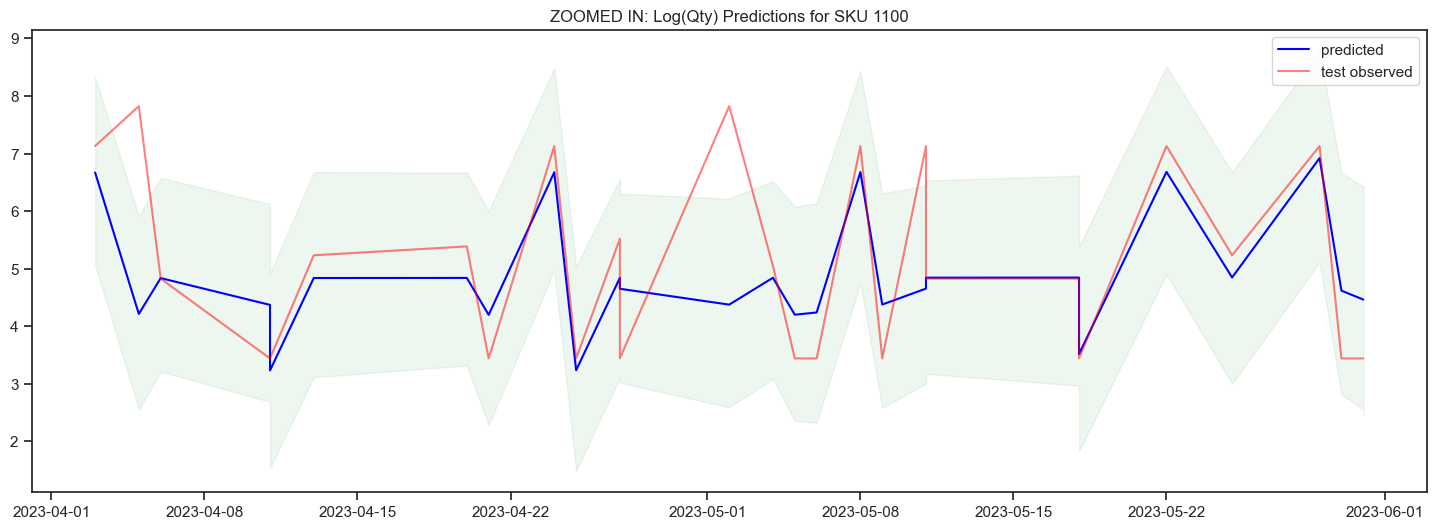

Successfully appended to existing CSV file at 
	"./data/prophet_qty_forecast.csv".
Filename: prophet_qty_forecast.csv

####################################################
### LOOP ENDED ###############################
####################################################


In [ ]:
# Create a list to hold all your DataFrames
sku_dataframes = [eval(f'df_sku{i}') for i in range(2, 21)]

# Loop through the list to perform operations
for i, df_sku in enumerate(sku_dataframes):
    df_prophet = df_sku.copy()
    sku_num = df_prophet['Inventory Code'].iloc[0]
    df_prophet.sort_values(by='Transaction Date', inplace=True)
    df_prophet.reset_index(drop=True, inplace=True)
    print(f"Loop {i+1}: Working on SKU {sku_num}.")
    
    # ------------------------

    df_train = df_prophet[df_prophet['Transaction Date'] <= train_end_date].copy()
    df_test = df_prophet[df_prophet['Transaction Date'] >= test_start_date].copy()

    # ------------------------

    df_train = handle_all_outliers(df_train, 'Qty', iqr_val)

    # ------------------------

    df_train['Qty_log'] = np.log(df_train['Qty'])
    df_test['Qty_log'] = np.log(df_test['Qty'])

    # ------------------------

    model = Prophet(
        yearly_seasonality=False,
        weekly_seasonality=False,
        daily_seasonality=False,
        holidays=df_holidays,
        mcmc_samples=best_params['mcmc_samples'],
        growth='linear',
        interval_width=best_params['interval_width'],
        changepoint_prior_scale=best_params['changepoint_prior_scale']
    )
    model.add_seasonality(name='custom_weekly', period=7, fourier_order=best_params['fourier_order'])
    model.add_regressor('Unit Price')
    model.add_regressor('Is_School_Holiday')
    model.fit(df_train.rename(columns={'Transaction Date': 'ds', 'Qty_log': 'y'}))

    forecast = model.predict(df_test.rename(columns={'Transaction Date': 'ds', 'Qty_log': 'y'}))
    forecast_ci = forecast[['ds', 'yhat_lower', 'yhat_upper']].set_index('ds')
    yhat_test = forecast.yhat.values
    y_test = df_test['Qty_log'].values

    # ------------------------

    # Second Chart (With Confidence Intervals)
    fig, ax = plt.subplots(figsize=(18, 6))

    # Plot the predicted values for the test range
    ax.plot(pd.to_datetime(forecast['ds'].values), forecast['yhat'].values, color="blue", label="predicted")

        # Fill the area between yhat_lower and yhat_upper to visualize the confidence interval
    ax.fill_between(
        pd.to_datetime(forecast['ds'].values),
        forecast['yhat_lower'].values,
        forecast['yhat_upper'].values,
        color='g',
        alpha=0.1)
    
    # Plot the actual observed values for the test range
    ax.plot(pd.to_datetime(df_test['Transaction Date'].values), df_test['Qty_log'].values, label="test observed", color="red", alpha=0.5)

    plt.legend(loc='best')
    plt.title(f'ZOOMED IN: Log(Qty) Predictions for SKU {sku_num}')
    plt.show()

    # ------------------------

    df_future = model.make_future_dataframe(periods=180, freq='d', include_history=False)
    columns_to_initialize = [
        'Inventory Code',
        'Product Category',
        'Unit Price',
        'Is_School_Holiday'    
        ]
    for col in columns_to_initialize:
        df_future[col] = 0

    df_future['Inventory Code'] = df_prophet['Inventory Code'].iloc[0]
    df_future['Product Category'] = df_prophet['Product Category'].iloc[0]

    df_future['Unit Price'] = df_test['Unit Price'].iloc[-1]

    for start_date, end_date in all_school_holidays:
        mask = (df_future['ds'] >= pd.Timestamp(start_date)) & (df_future['ds'] <= pd.Timestamp(end_date))
        df_future.loc[mask, 'Is_School_Holiday'] = 1

    # ------------------------
    
    
    df_forecast = model.predict(df_future)
    df_forecast['Inventory Code'] = sku_num
    df_forecast['Product Category'] = df_future['Product Category'].iloc[0]
    df_forecast.loc[df_forecast['yhat'] < 0, 'yhat'] = 0
    mode_yhat = df_forecast['yhat'].mode()[0]
    df_forecast.loc[df_forecast['yhat'] > 9, 'yhat'] = mode_yhat
    """
    plt.figure(figsize=(18, 6))
    plt.plot(df_test['Transaction Date'], df_test['Qty'], label='Test Data', color='red', alpha=0.5)
    plt.plot(df_forecast['ds'], np.exp(df_forecast['yhat']), label='Forecasted Data', color='blue')
    plt.xlabel('Transaction Date')
    plt.ylabel('Quantity')
    plt.title(f'Quantity Forecast for SKU {sku_num}')
    plt.legend()
    plt.show()
    """

    # ------------------------

    df_forecast['yhat'] = df_forecast['yhat'].apply(np.exp)
    df_export = df_forecast[['ds', 'Inventory Code', 'Product Category', 'yhat']].rename(columns={'ds': 'Transaction Date', 'yhat': 'Predicted_Qty'})
    df_predicted = pd.concat([df_predicted, df_export], ignore_index=True)

    filename1 = r'prophet_qty_forecast.csv'
    output_path1 = r'./data/'
    full_path = output_path1 + filename1
    # Open the file in append mode ('a'). Don't write headers.
    df_export.to_csv(full_path, mode='a', header=False, index=False)
    print(f'Successfully appended to existing CSV file at \n\t"{full_path}".')
    print(f'Filename: {filename1}')

    """
    filename1 = r'prophet_qty_forecast.csv'
    output_path1 = r's3://bcg-rise-prod-sagemaker-input-data/output-data/wave-5-group-6/'
    full_path = output_path1 + filename1
    # Open the file in append mode ('a'). Don't write headers.
    df_export.to_csv(full_path, mode='a', header=False, index=False)
    print(f'Successfully appended to existing CSV file at \n\t"{full_path}".')
    print(f'Filename: {filename1}')
    """
    
print("\n####################################################")
print("### LOOP ENDED ###############################")
print("####################################################")

In [ ]:
df_predicted['Inventory Code'].value_counts()

1332    180
1331    180
1707    180
1090    180
1034    180
1031    180
1158    180
1092    180
1347    180
1348    180
1037    180
1036    180
1162    180
1033    180
1333    180
1345    180
1032    180
1030    180
1330    180
1100    180
Name: Inventory Code, dtype: int64

## Predicted_Qty Chart

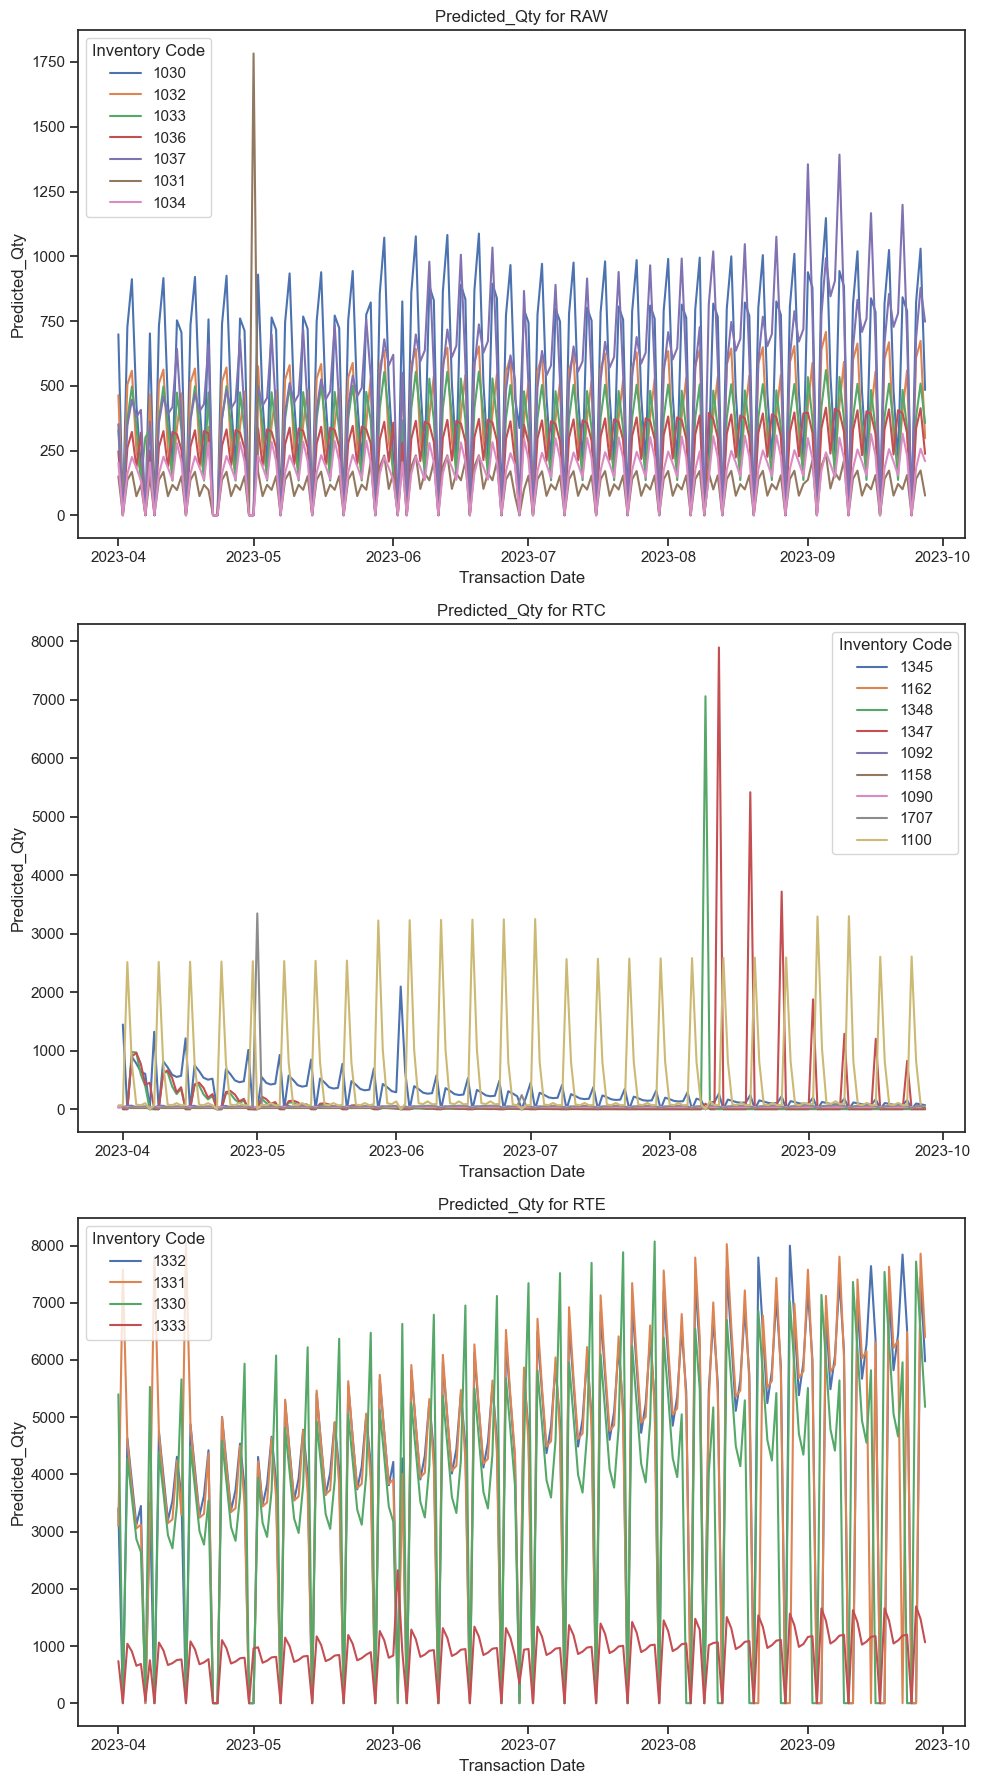

In [ ]:
# Filter DataFrames based on 'Product Category'
df_raw = df_predicted[df_predicted['Product Category'] == 'RAW']
df_rtc = df_predicted[df_predicted['Product Category'] == 'RTC']
df_rte = df_predicted[df_predicted['Product Category'] == 'RTE']

fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Plot RAW category
for inventory_code in df_raw['Inventory Code'].unique():
    temp_df = df_raw[df_raw['Inventory Code'] == inventory_code]
    axes[0].plot(temp_df['Transaction Date'], temp_df['Predicted_Qty'], label=str(inventory_code))
axes[0].set_title('Predicted_Qty for RAW')
axes[0].set_xlabel('Transaction Date')
axes[0].set_ylabel('Predicted_Qty')
axes[0].legend(title='Inventory Code')

# Plot RTC category
for inventory_code in df_rtc['Inventory Code'].unique():
    temp_df = df_rtc[df_rtc['Inventory Code'] == inventory_code]
    axes[1].plot(temp_df['Transaction Date'], temp_df['Predicted_Qty'], label=str(inventory_code))
axes[1].set_title('Predicted_Qty for RTC')
axes[1].set_xlabel('Transaction Date')
axes[1].set_ylabel('Predicted_Qty')
axes[1].legend(title='Inventory Code')

# Plot RTE category
for inventory_code in df_rte['Inventory Code'].unique():
    temp_df = df_rte[df_rte['Inventory Code'] == inventory_code]
    axes[2].plot(temp_df['Transaction Date'], temp_df['Predicted_Qty'], label=str(inventory_code))
axes[2].set_title('Predicted_Qty for RTE')
axes[2].set_xlabel('Transaction Date')
axes[2].set_ylabel('Predicted_Qty')
axes[2].legend(title='Inventory Code')

plt.tight_layout()
plt.show()


# END OF DOCUMENT